<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap06/6_2_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 6.2 Gradient descent**

This notebook recreates the gradient descent algorithm as shown in figure 6.1.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [56]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [57]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [58]:
# Let's define our model -- just a straight line with intercept phi[0] and slope phi[1]
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [59]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

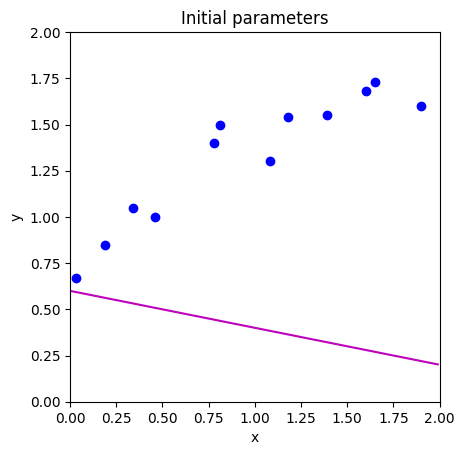

In [60]:
# Initialize the parameters to some arbitrary values and draw the model
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")



Now let's compute the sum of squares loss for the training data

In [61]:
def compute_loss(data_x, data_y, model, phi):
  # TODO -- Write this function -- replace the line below
  # First make model predictions from data x
  # Then compute the squared difference between the predictions and true y values
  # Then sum them all and return
 
  pred_y = model(phi,data_x)
  loss = np.sum((pred_y-data_y)**2)

  return loss

Let's just test that we got that right

In [62]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

In [63]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept $\phi_{0}$'); ax.set_ylabel('Slope, $\phi_{1}$')
  plt.show()

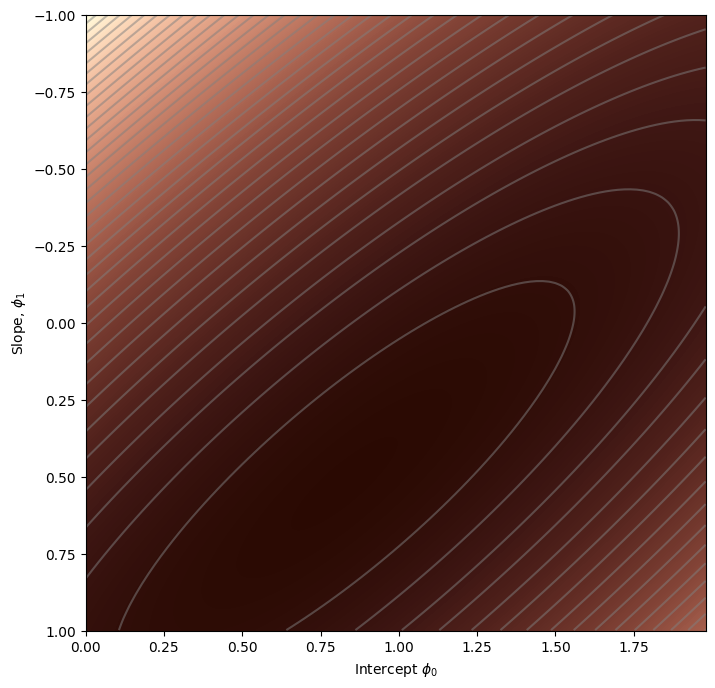

In [64]:
draw_loss_function(compute_loss, data, model)

Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

In [65]:
# These are in the lecture slides and notes, but worth trying to calculate them yourself to
# check that you get them right.  Write out the expression for the sum of squares loss and take the
# derivative with respect to phi0 and phi1
def compute_gradient(data_x, data_y, phi):
    # TODO -- write this function, replacing the lines below
    dl_dphi0 = np.sum(2*(phi[0]+phi[1]*data_x-data_y))

    dl_dphi1 = np.sum(2*data_x*(phi[0]+phi[1]*data_x -data_y))
   

    # Return the gradient
    return np.array([[dl_dphi0],[dl_dphi1]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function two million times, and usually computing the gradients directly is much more efficient.

In [66]:
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation


Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\3146724913.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


Now we are ready to perform gradient descent.  We'll need to use our line search routine from notebook 6.1, which I've reproduced here plus the helper function loss_function_1D that maps the search along the negative gradient direction in 2D space to a 1D problem (distance along this direction)

In [67]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 10, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then halve points B,C, and D
        # if np.argmin((lossa,lossb,lossc,lossd))==0:
        #   b = b/2
        #   c = c/2
        #   d = d/2
        #   continue;
        if (lossa<lossb and lossa<lossc and lossa<lossd):
          b/=2
          c/=2
          d/=2
        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

In [68]:
def gradient_descent_step(phi, data,  model,gradient):
  # TODO -- update Phi with the gradient descent step (equation 6.3)
  # 1. Compute the gradient (you wrote this function above)
  derivative=compute_gradient(data[0],data[1],phi)
  
  # 2. Find the best step size alpha using line search function (above) -- use negative gradient as going downhill
  alfa=line_search(data,model,phi,-gradient,-1,verbose=True)
  print('alfa %f'%(alfa))
  # 3. Update the parameters phi based on the gradient and the step size alpha.
  print('before slope phi0:%f, phi1: %f'%(phi[0],phi[1]))
  phi=phi-alfa*derivative
  print('after slope phi0:%f, phi1: %f'%(phi[0],phi[1]))

  return phi

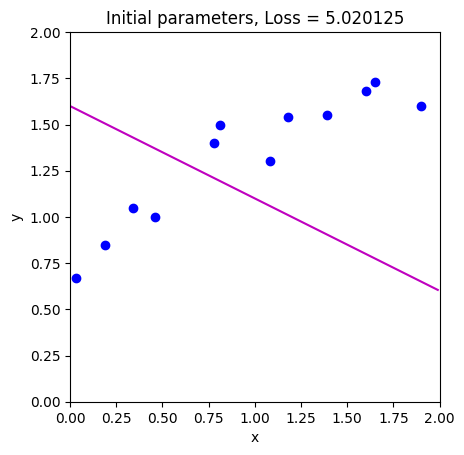

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 5.020125, b22.705014, c105.704753, d259.533329
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 5.020125, b3.657883, c9.552846, d22.705014
Iter 3, a=0.000, b=0.007, c=0.015, d=0.022
a 5.020125, b3.305607, c4.816514, d9.552846
Iter 4, a=0.000, b=0.005, c=0.010, d=0.015
a 5.020125, b3.518733, c3.450862, d4.816514
Iter 5, a=0.005, b=0.008, c=0.011, d=0.015
a 3.518733, b3.314206, c3.746799, d4.816514
Iter 6, a=0.005, b=0.007, c=0.009, d=0.011
a 3.518733, b3.311590, c3.387612, d3.746799
Iter 7, a=0.005, b=0.006, c=0.008, d=0.009
a 3.518733, b3.349175, c3.305468, d3.387612
Iter 8, a=0.006, b=0.007, c=0.008, d=0.009
a 3.349175, b3.306053, c3.318866, d3.387612
Iter 9, a=0.006, b=0.007, c=0.008, d=0.008
a 3.349175, b3.314212, c3.304109, d3.318866
Iter 10, a=0.007, b=0.007, c=0.008, d=0.008
a 3.314212, b3.304715, c3.306266, d3.318866
alfa 0.007410
before slope phi0:1.600000, phi1: -0.500000
after slope phi0:1.635200, phi1: -0.403459


C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\2027958805.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('before slope phi0:%f, phi1: %f'%(phi[0],phi[1]))
C:\Users\Jakub Machura\AppData\Local\Temp\ipykernel_17348\2027958805.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('after slope phi0:%f, phi1: %f'%(phi[0],phi[1]))


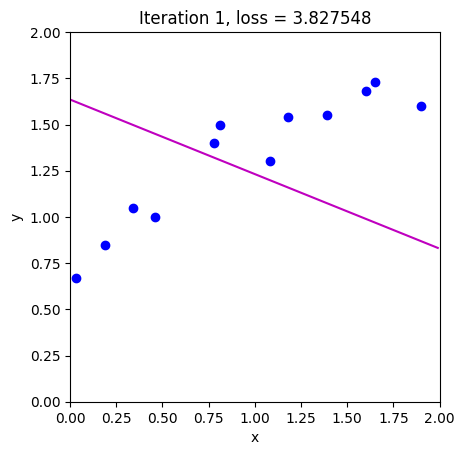

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.827548, b26.994367, c115.476035, d274.952660
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.827548, b4.292616, c12.014888, d26.994367
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.827548, b3.176214, c3.331237, d4.292616
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.827548, b3.303731, c3.138294, d3.331237
Iter 5, a=0.002, b=0.004, c=0.006, d=0.007
a 3.303731, b3.153619, c3.162788, d3.331237
Iter 6, a=0.002, b=0.004, c=0.005, d=0.006
a 3.303731, b3.185959, c3.138978, d3.162788
Iter 7, a=0.004, b=0.004, c=0.005, d=0.006
a 3.185959, b3.146772, c3.139049, d3.162788
Iter 8, a=0.004, b=0.005, c=0.005, d=0.006
a 3.146772, b3.138127, c3.143466, d3.162788
Iter 9, a=0.004, b=0.005, c=0.005, d=0.005
a 3.146772, b3.139455, c3.138353, d3.143466
Iter 10, a=0.005, b=0.005, c=0.005, d=0.005
a 3.139455, b3.138030, c3.139367, d3.143466
alfa 0.004792
before slope phi0:1.635200, phi1: -0.403459
after slope phi0:1.643356, phi1: -0.358773


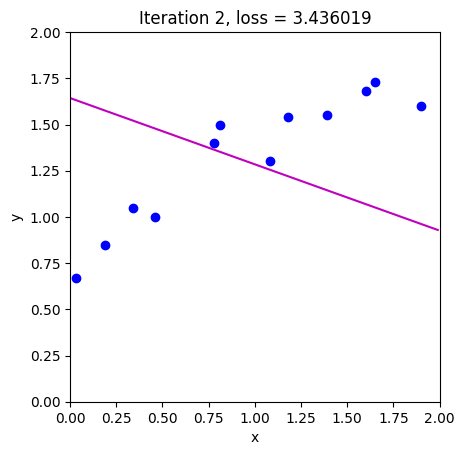

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.436019, b28.834648, c119.548125, d281.324191
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.436019, b4.645023, c13.111233, d28.834648
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.436019, b3.032664, c3.435666, d4.645023
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.436019, b3.077521, c3.077403, d3.435666
Iter 5, a=0.002, b=0.004, c=0.006, d=0.007
a 3.077521, b3.037622, c3.157004, d3.435666
Iter 6, a=0.002, b=0.004, c=0.005, d=0.006
a 3.077521, b3.033224, c3.059718, d3.157004
Iter 7, a=0.002, b=0.003, c=0.004, d=0.005
a 3.077521, b3.040124, c3.034190, d3.059718
Iter 8, a=0.003, b=0.004, c=0.004, d=0.005
a 3.040124, b3.032672, c3.039203, d3.059718
Iter 9, a=0.003, b=0.003, c=0.004, d=0.004
a 3.040124, b3.033602, c3.033295, d3.039203
Iter 10, a=0.003, b=0.004, c=0.004, d=0.004
a 3.033602, b3.032707, c3.034574, d3.039203
alfa 0.003705
before slope phi0:1.643356, phi1: -0.358773
after slope phi0:1.645159, phi1: -0.329879


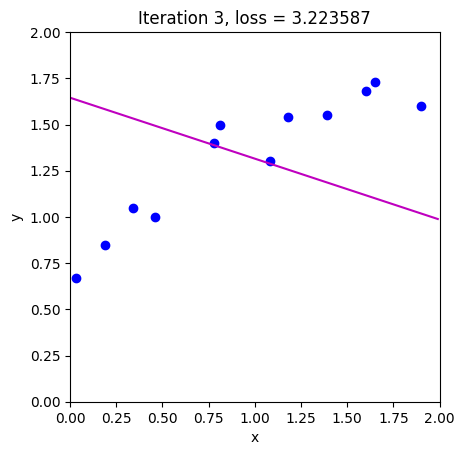

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.223587, b29.934927, c121.961117, d285.089674
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.223587, b4.870162, c13.773942, d29.934927
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.223587, b2.966089, c3.514948, d4.870162
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.223587, b2.962327, c3.059447, d3.514948
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 3.223587, b3.009594, c2.954880, d3.059447
Iter 6, a=0.002, b=0.003, c=0.004, d=0.005
a 3.009594, b2.955420, c2.972038, d3.059447
Iter 7, a=0.002, b=0.002, c=0.003, d=0.004
a 3.009594, b2.965612, c2.953094, d2.972038
Iter 8, a=0.002, b=0.003, c=0.003, d=0.004
a 2.965612, b2.953771, c2.955913, d2.972038
Iter 9, a=0.002, b=0.003, c=0.003, d=0.003
a 2.965612, b2.956164, c2.952931, d2.955913
Iter 10, a=0.003, b=0.003, c=0.003, d=0.003
a 2.956164, b2.953318, c2.953234, d2.955913
alfa 0.003105
before slope phi0:1.645159, phi1: -0.329879
after slope phi0:1.644488, phi1: -0.308487


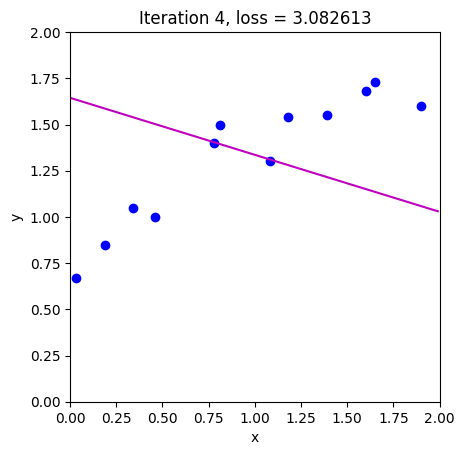

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 3.082613, b30.690504, c123.613243, d287.665518
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 3.082613, b5.028038, c14.230668, d30.690504
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 3.082613, b2.924732, c3.573207, d5.028038
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 3.082613, b2.887764, c3.051295, d3.573207
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 3.082613, b2.912894, c2.902454, d3.051295
Iter 6, a=0.002, b=0.003, c=0.004, d=0.005
a 2.912894, b2.888236, c2.934370, d3.051295
Iter 7, a=0.002, b=0.002, c=0.003, d=0.004
a 2.912894, b2.888590, c2.895749, d2.934370
Iter 8, a=0.002, b=0.002, c=0.003, d=0.003
a 2.912894, b2.893195, c2.887480, d2.895749
Iter 9, a=0.002, b=0.002, c=0.003, d=0.003
a 2.893195, b2.887831, c2.888683, d2.895749
Iter 10, a=0.002, b=0.002, c=0.003, d=0.003
a 2.893195, b2.888929, c2.887425, d2.888683
alfa 0.002542
before slope phi0:1.644488, phi1: -0.308487
after slope phi0:1.642739, phi1: -0.292570


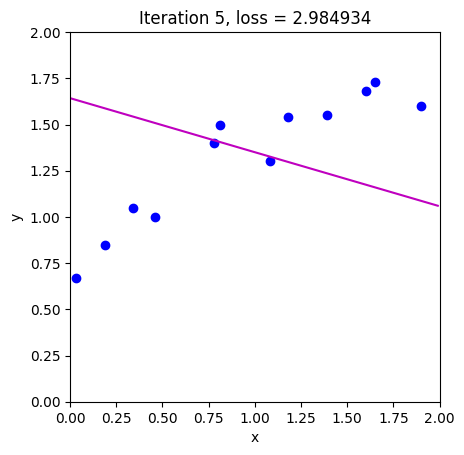

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.984934, b31.212987, c124.755890, d289.447120
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.984934, b5.137080, c14.546431, d31.212987
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.984934, b2.895960, c3.613342, d5.137080
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 2.984934, b2.836023, c3.045492, d3.613342
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 2.984934, b2.845840, c2.866026, d3.045492
Iter 6, a=0.000, b=0.001, c=0.002, d=0.003
a 2.984934, b2.874507, c2.834871, d2.866026
Iter 7, a=0.001, b=0.002, c=0.003, d=0.003
a 2.874507, b2.840217, c2.837390, d2.866026
Iter 8, a=0.002, b=0.002, c=0.003, d=0.003
a 2.840217, b2.834837, c2.843440, d2.866026
Iter 9, a=0.002, b=0.002, c=0.002, d=0.003
a 2.840217, b2.835076, c2.836151, d2.843440
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.840217, b2.836099, c2.834744, d2.836151
alfa 0.002240
before slope phi0:1.642739, phi1: -0.292570
after slope phi0:1.640479, phi1: -0.279524


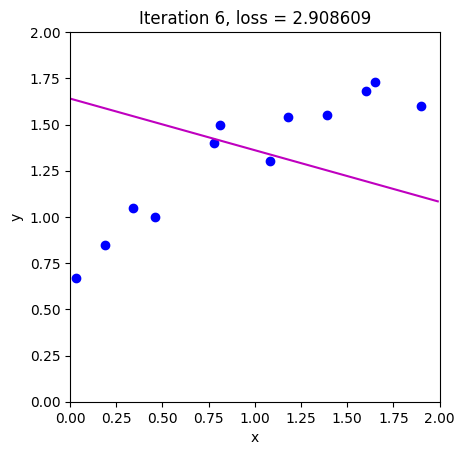

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.908609, b31.613890, c125.634020, d290.816940
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.908609, b5.219830, c14.788257, d31.613890
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.908609, b2.872660, c3.643067, d5.219830
Iter 4, a=0.000, b=0.002, c=0.005, d=0.007
a 2.908609, b2.795048, c3.039867, d3.643067
Iter 5, a=0.000, b=0.002, c=0.003, d=0.005
a 2.908609, b2.793081, c2.836834, d3.039867
Iter 6, a=0.000, b=0.001, c=0.002, d=0.003
a 2.908609, b2.813893, c2.789968, d2.836834
Iter 7, a=0.001, b=0.002, c=0.003, d=0.003
a 2.813893, b2.790077, c2.797724, d2.836834
Iter 8, a=0.001, b=0.002, c=0.002, d=0.003
a 2.813893, b2.794520, c2.789130, d2.797724
Iter 9, a=0.002, b=0.002, c=0.002, d=0.003
a 2.794520, b2.789373, c2.790441, d2.797724
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.794520, b2.790398, c2.789038, d2.790441
alfa 0.001998
before slope phi0:1.640479, phi1: -0.279524
after slope phi0:1.637975, phi1: -0.268563


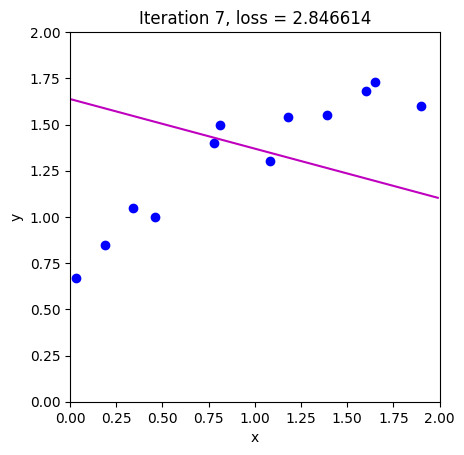

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.846614, b31.930123, c126.328482, d291.901091
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.846614, b5.283912, c14.978415, d31.930123
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.846614, b2.852691, c3.665123, d5.283912
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.846614, b2.759045, c2.761070, d2.852691
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.846614, b2.778279, c2.749765, d2.761070
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.778279, b2.754845, c2.749109, d2.761070
Iter 7, a=0.001, b=0.002, c=0.002, d=0.002
a 2.754845, b2.749054, c2.751129, d2.761070
Iter 8, a=0.001, b=0.002, c=0.002, d=0.002
a 2.754845, b2.750111, c2.748872, d2.751129
Iter 9, a=0.002, b=0.002, c=0.002, d=0.002
a 2.750111, b2.748897, c2.749236, d2.751129
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.750111, b2.749129, c2.748837, d2.749236
alfa 0.001814
before slope phi0:1.637975, phi1: -0.268563
after slope phi0:1.635358, phi1: -0.259108


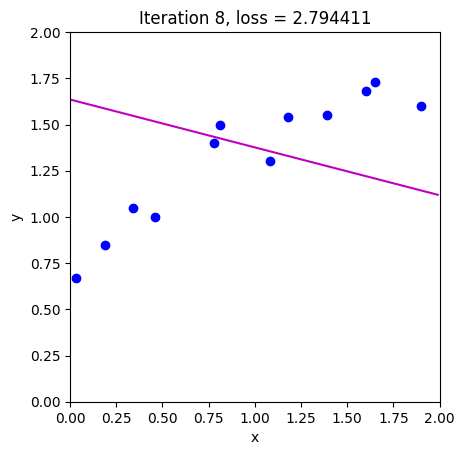

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.794411, b32.187041, c126.894519, d292.785616
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.794411, b5.334749, c15.132292, d32.187041
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.794411, b2.834834, c3.681614, d5.334749
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.794411, b2.718291, c2.731765, d2.834834
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.794411, b2.733709, c2.712827, d2.731765
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.733709, b2.715363, c2.714715, d2.731765
Iter 7, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.712965, c2.718432, d2.731765
Iter 8, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.712890, c2.713913, d2.718432
Iter 9, a=0.001, b=0.002, c=0.002, d=0.002
a 2.715363, b2.713326, c2.712843, d2.713913
Iter 10, a=0.002, b=0.002, c=0.002, d=0.002
a 2.713326, b2.712831, c2.713027, d2.713913
alfa 0.001626
before slope phi0:1.635358, phi1: -0.259108
after slope phi0:1.632763, phi1: -0.250995


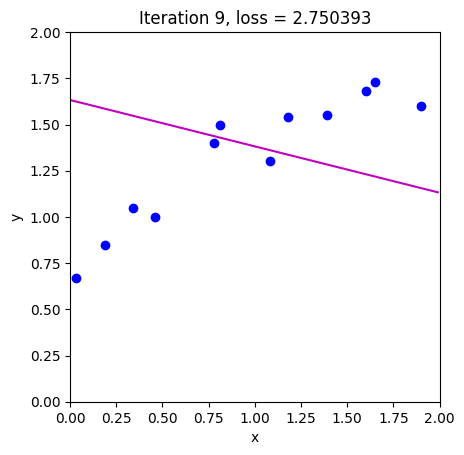

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.750393, b32.395093, c127.354642, d293.505448
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.750393, b5.374754, c15.256320, d32.395093
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.750393, b2.818824, c3.693611, d5.374754
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.750393, b2.683608, c2.706418, d2.818824
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.750393, b2.695914, c2.681256, d2.706418
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.695914, b2.681718, c2.685219, d2.706418
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.695914, b2.684484, c2.680919, d2.685219
Iter 8, a=0.001, b=0.001, c=0.002, d=0.002
a 2.684484, b2.681233, c2.681478, d2.685219
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.684484, b2.681928, c2.680926, d2.681478
Iter 10, a=0.001, b=0.001, c=0.002, d=0.002
a 2.681928, b2.681088, c2.680938, d2.681478
alfa 0.001553
before slope phi0:1.632763, phi1: -0.250995
after slope phi0:1.630095, phi1: -0.243537


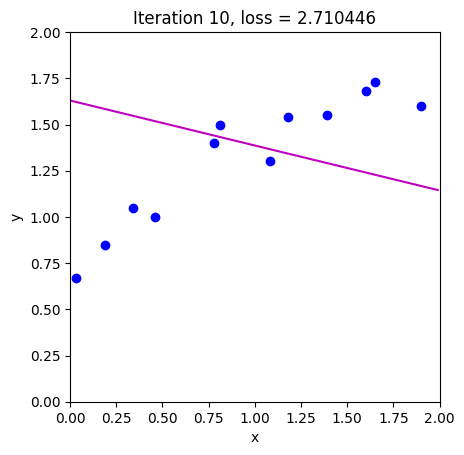

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.710446, b32.576287, c127.756978, d294.135628
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.710446, b5.408521, c15.363801, d32.576287
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.710446, b2.803448, c3.702806, d5.408521
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.710446, b2.651851, c2.682852, d2.803448
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.710446, b2.661428, c2.652230, d2.682852
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.661428, b2.650872, c2.658013, d2.682852
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.661428, b2.652424, c2.651286, d2.658013
Iter 8, a=0.001, b=0.001, c=0.002, d=0.002
a 2.652424, b2.650791, c2.652654, d2.658013
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.652424, b2.650947, c2.651024, d2.652654
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.652424, b2.651267, c2.650800, d2.651024
alfa 0.001392
before slope phi0:1.630095, phi1: -0.243537
after slope phi0:1.627555, phi1: -0.237079


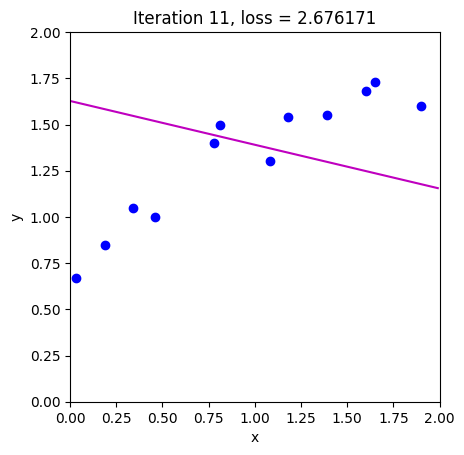

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.676171, b32.724904, c128.088486, d294.655569
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.676171, b5.435210, c15.451454, d32.724904
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.676171, b2.789494, c3.709174, d5.435210
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.676171, b2.624350, c2.662125, d2.789494
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.676171, b2.631669, c2.626987, d2.662125
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.631669, b2.624123, c2.634275, d2.662125
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.631669, b2.624672, c2.625541, d2.634275
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.631669, b2.626130, c2.624087, d2.625541
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.626130, b2.624380, c2.624183, d2.625541
Iter 10, a=0.001, b=0.001, c=0.001, d=0.002
a 2.624380, b2.624076, c2.624463, d2.625541
alfa 0.001324
before slope phi0:1.627555, phi1: -0.237079
after slope phi0:1.625024, phi1: -0.231113


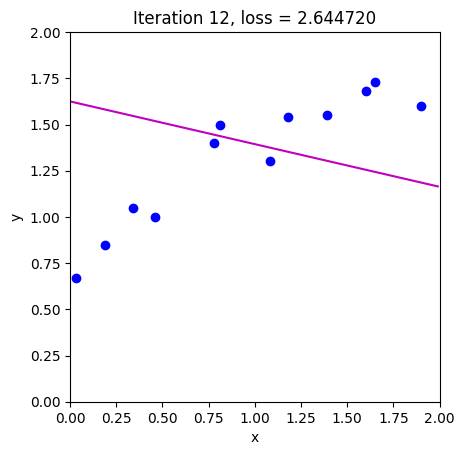

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.644720, b32.855472, c128.381073, d295.115084
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.644720, b5.457765, c15.528016, d32.855472
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.644720, b2.776046, c3.713727, d5.457765
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.644720, b2.598900, c2.642675, d2.776046
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.644720, b2.604219, c2.603537, d2.642675
Iter 6, a=0.001, b=0.001, c=0.002, d=0.002
a 2.604219, b2.599340, c2.612159, d2.642675
Iter 7, a=0.001, b=0.001, c=0.002, d=0.002
a 2.604219, b2.599000, c2.601646, d2.612159
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.604219, b2.599865, c2.599008, d2.601646
Iter 9, a=0.001, b=0.001, c=0.001, d=0.002
a 2.599865, b2.598905, c2.599499, d2.601646
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.599865, b2.599053, c2.598931, d2.599499
alfa 0.001271
before slope phi0:1.625024, phi1: -0.231113
after slope phi0:1.622499, phi1: -0.225542


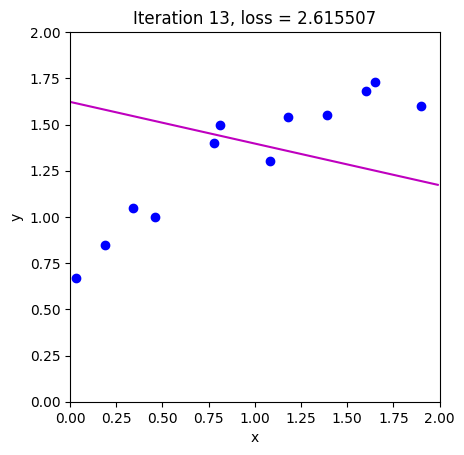

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.615507, b32.971468, c128.642279, d295.525900
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.615507, b5.476955, c15.595609, d32.971468
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.615507, b2.762967, c3.716783, d5.476955
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.615507, b2.575065, c2.624218, d2.762967
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.615507, b2.578590, c2.581494, d2.624218
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.615507, b2.586471, c2.575134, d2.581494
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.586471, b2.576947, c2.575288, d2.581494
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.576947, b2.574967, c2.576483, d2.581494
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.576947, b2.575238, c2.575084, d2.576483
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.575238, b2.574962, c2.575377, d2.576483
alfa 0.001174
before slope phi0:1.622499, phi1: -0.225542
after slope phi0:1.620090, phi1: -0.220526


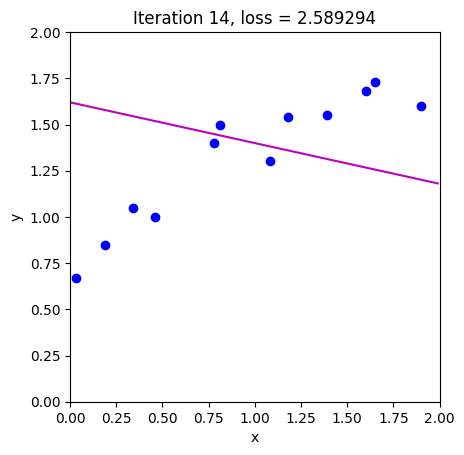

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.589294, b33.070877, c128.867309, d295.880357
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.589294, b5.492616, c15.653144, d33.070877
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.589294, b2.750712, c3.718486, d5.492616
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.589294, b2.553505, c2.607311, d2.750712
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.589294, b2.555480, c2.561485, d2.607311
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.589294, b2.562327, c2.553057, d2.561485
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.562327, b2.554180, c2.553900, d2.561485
Iter 8, a=0.001, b=0.001, c=0.001, d=0.002
a 2.554180, b2.553119, c2.555554, d2.561485
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.554180, b2.553085, c2.553543, d2.555554
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.554180, b2.553277, c2.553065, d2.553543
alfa 0.001120
before slope phi0:1.620090, phi1: -0.220526
after slope phi0:1.617727, phi1: -0.215847


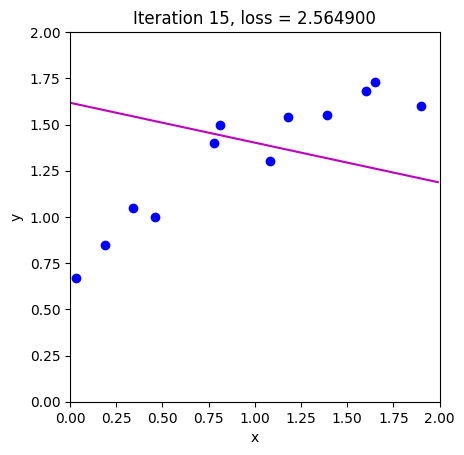

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.564900, b33.159365, c129.068680, d296.198032
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.564900, b5.505850, c15.704005, d33.159365
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.564900, b2.738861, c3.719177, d5.505850
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.564900, b2.533292, c2.591279, d2.738861
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.564900, b2.533873, c2.542666, d2.591279
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.564900, b2.539791, c2.532380, d2.542666
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.539791, b2.532884, c2.533842, d2.542666
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.539791, b2.534312, c2.532329, d2.533842
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.534312, b2.532602, c2.532445, d2.533842
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.532602, b2.532325, c2.532738, d2.533842
alfa 0.001053
before slope phi0:1.617727, phi1: -0.215847
after slope phi0:1.615453, phi1: -0.211539


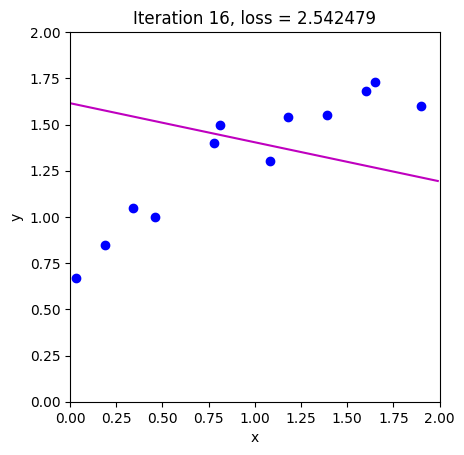

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.542479, b33.237158, c129.246687, d296.479291
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.542479, b5.516833, c15.748393, d33.237158
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.542479, b2.727574, c3.719025, d5.516833
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.542479, b2.514582, c2.576280, d2.727574
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.542479, b2.513926, c2.525193, d2.576280
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.542479, b2.519019, c2.513257, d2.525193
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.519019, b2.513211, c2.515269, d2.525193
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.519019, b2.514273, c2.513023, d2.515269
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.514273, b2.513052, c2.513384, d2.515269
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.514273, b2.513286, c2.512990, d2.513384
alfa 0.000999
before slope phi0:1.615453, phi1: -0.211539
after slope phi0:1.613251, phi1: -0.207527


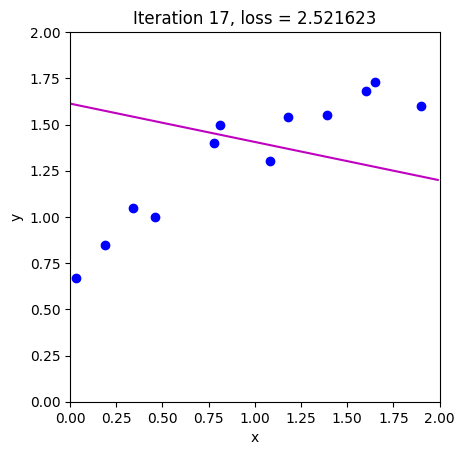

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.521623, b33.306435, c129.406096, d296.731563
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.521623, b5.526021, c15.787625, d33.306435
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.521623, b2.716733, c3.718199, d5.526021
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.521623, b2.497064, c2.562101, d2.716733
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.521623, b2.495296, c2.508788, d2.562101
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.521623, b2.499647, c2.495369, d2.508788
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.499647, b2.494828, c2.497876, d2.508788
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.499647, b2.495561, c2.494970, d2.497876
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.495561, b2.494779, c2.495550, d2.497876
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.495561, b2.494867, c2.494863, d2.495550
alfa 0.000999
before slope phi0:1.613251, phi1: -0.207527
after slope phi0:1.611011, phi1: -0.203586


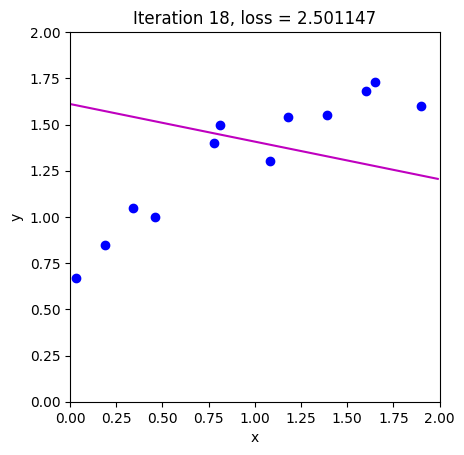

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.501147, b33.371617, c129.556936, d296.970657
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.501147, b5.534098, c15.824255, d33.371617
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.501147, b2.705775, c3.716759, d5.534098
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.501147, b2.479761, c2.547971, d2.705775
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.501147, b2.476935, c2.492543, d2.547971
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.501147, b2.480581, c2.477713, d2.492543
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.480581, b2.476703, c2.480690, d2.492543
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.480581, b2.477122, c2.477158, d2.480690
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.480581, b2.477886, c2.476745, d2.477158
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.477886, b2.476953, c2.476710, d2.477158
alfa 0.000919
before slope phi0:1.611011, phi1: -0.203586
after slope phi0:1.608917, phi1: -0.200024


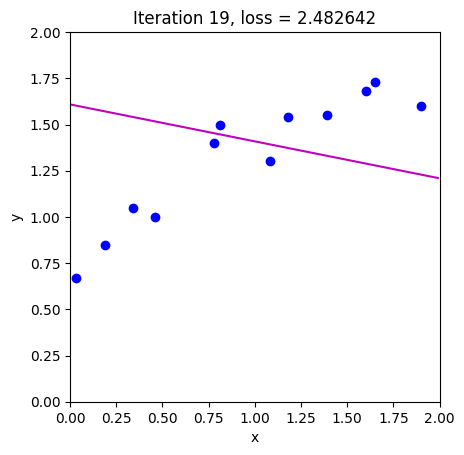

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.482642, b33.427963, c129.688133, d297.178973
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.482642, b5.540543, c15.855650, d33.427963
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.482642, b2.695586, c3.714887, d5.540543
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.482642, b2.464028, c2.535010, d2.695586
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.482642, b2.460278, c2.477734, d2.535010
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.482642, b2.463308, c2.461672, d2.477734
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.463308, b2.460251, c2.465059, d2.477734
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.463308, b2.460396, c2.460980, d2.465059
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.463308, b2.460978, c2.460202, d2.460980
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.460978, b2.460288, c2.460289, d2.460980
alfa 0.000811
before slope phi0:1.608917, phi1: -0.200024
after slope phi0:1.607043, phi1: -0.196926


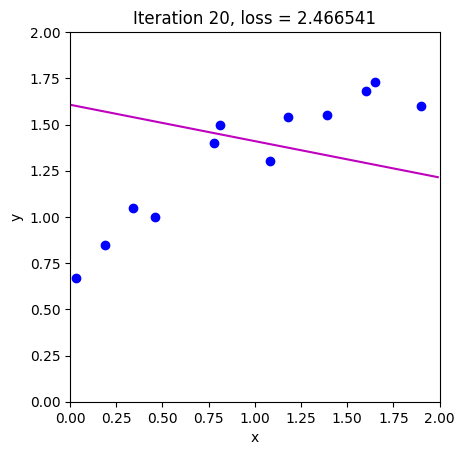

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.466541, b33.474956, c129.798221, d297.354067
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.466541, b5.545474, c15.881612, d33.474956
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.466541, b2.686495, c3.712806, d5.545474
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.466541, b2.450264, c2.523582, d2.686495
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.466541, b2.445734, c2.464748, d2.523582
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.466541, b2.448245, c2.447648, d2.464748
Iter 7, a=0.001, b=0.001, c=0.001, d=0.002
a 2.448245, b2.445881, c2.451382, d2.464748
Iter 8, a=0.001, b=0.001, c=0.001, d=0.001
a 2.448245, b2.445795, c2.446840, d2.451382
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.448245, b2.446223, c2.445755, d2.446840
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.446223, b2.445738, c2.445944, d2.446840
alfa 0.000811
before slope phi0:1.607043, phi1: -0.196926
after slope phi0:1.605148, phi1: -0.193869


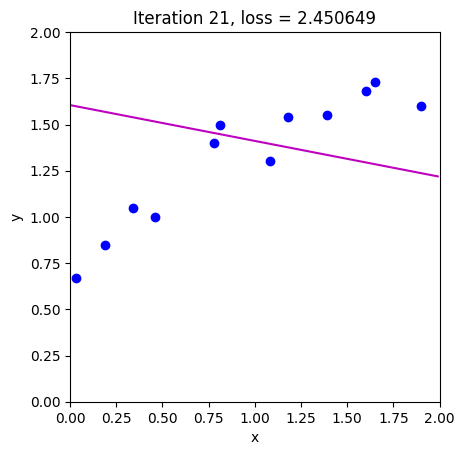

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.450649, b33.519619, c129.903437, d297.521672
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.450649, b5.549767, c15.906090, d33.519619
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.450649, b2.677332, c3.710372, d5.549767
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.450649, b2.436615, c2.512176, d2.677332
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.450649, b2.431338, c2.451847, d2.512176
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.450649, b2.433351, c2.433750, d2.451847
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.450649, b2.437151, c2.431518, d2.433750
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.437151, b2.432521, c2.431388, d2.433750
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.432521, b2.431377, c2.431787, d2.433750
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.432521, b2.431586, c2.431341, d2.431787
alfa 0.000818
before slope phi0:1.605148, phi1: -0.193869
after slope phi0:1.603218, phi1: -0.190827


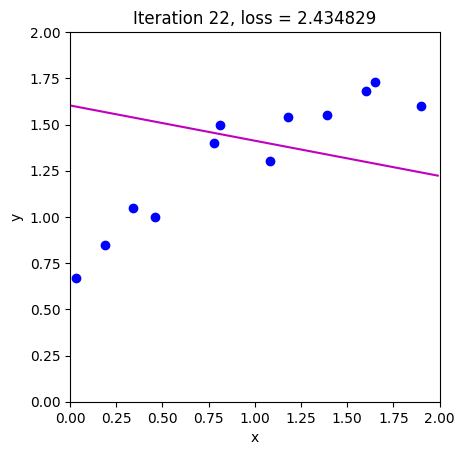

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.434829, b33.562394, c130.004809, d297.683416
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.434829, b5.553479, c15.929334, d33.562394
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.434829, b2.668023, c3.707573, d5.553479
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.434829, b2.422965, c2.500696, d2.668023
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.434829, b2.416965, c2.438920, d2.500696
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.434829, b2.418495, c2.419859, d2.438920
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.434829, b2.421973, c2.416983, d2.419859
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.421973, b2.417773, c2.417068, d2.419859
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.417773, b2.416914, c2.417610, d2.419859
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.417773, b2.417028, c2.416973, d2.417610
alfa 0.000818
before slope phi0:1.603218, phi1: -0.190827
after slope phi0:1.601268, phi1: -0.187823


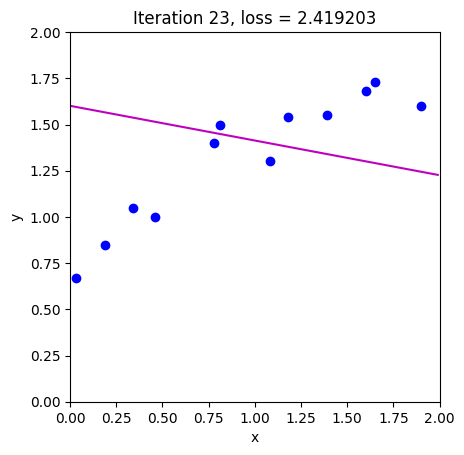

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.419203, b33.602987, c130.101621, d297.838150
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.419203, b5.556592, c15.951187, d33.602987
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.419203, b2.658643, c3.704439, d5.556592
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.419203, b2.409421, c2.489234, d2.658643
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.419203, b2.402726, c2.426070, d2.489234
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.419203, b2.403794, c2.406083, d2.426070
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.419203, b2.406964, c2.402591, d2.406083
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.406964, b2.403174, c2.402881, d2.406083
Iter 9, a=0.001, b=0.001, c=0.001, d=0.001
a 2.403174, b2.402590, c2.403560, d2.406083
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.403174, b2.402612, c2.402741, d2.403560
alfa 0.000711
before slope phi0:1.601268, phi1: -0.187823
after slope phi0:1.599559, phi1: -0.185245


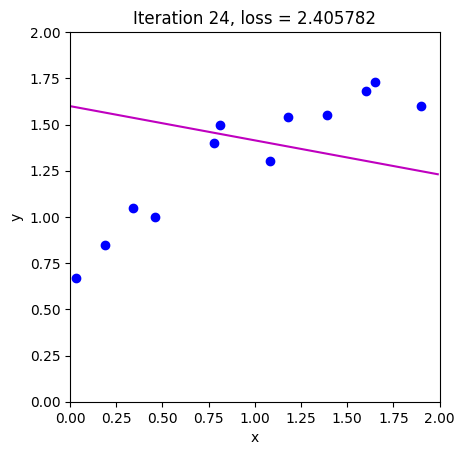

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.405782, b33.636431, c130.181929, d297.966744
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.405782, b5.558793, c15.969009, d33.636431
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.405782, b2.650429, c3.701433, d5.558793
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.405782, b2.397736, c2.479285, d2.650429
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.405782, b2.390463, c2.414964, d2.479285
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.405782, b2.391145, c2.394205, d2.414964
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.405782, b2.394057, c2.390198, d2.394205
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.394057, b2.390611, c2.390660, d2.394205
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.394057, b2.391371, c2.390239, d2.390660
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.391371, b2.390444, c2.390206, d2.390660
alfa 0.000738
before slope phi0:1.599559, phi1: -0.185245
after slope phi0:1.597773, phi1: -0.182599


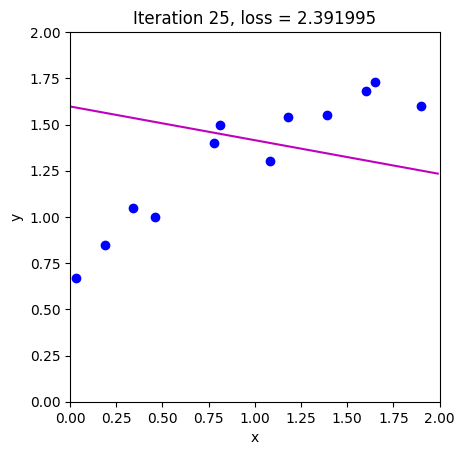

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.391995, b33.669564, c130.261982, d298.095138
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.391995, b5.560646, c15.986502, d33.669564
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.391995, b2.641856, c3.698073, d5.560646
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.391995, b2.385687, c2.468974, d2.641856
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.391995, b2.377835, c2.403494, d2.468974
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.391995, b2.378130, c2.381963, d2.403494
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.391995, b2.380786, c2.377442, d2.381963
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.380786, b2.377682, c2.378075, d2.381963
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.380786, b2.378328, c2.377425, d2.378075
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.378328, b2.377553, c2.377469, d2.378075
alfa 0.000738
before slope phi0:1.597773, phi1: -0.182599
after slope phi0:1.595973, phi1: -0.179981


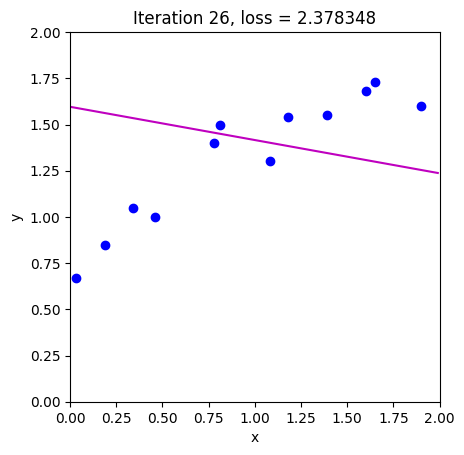

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.378348, b33.701122, c130.338746, d298.218477
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.378348, b5.562067, c16.002992, d33.701122
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.378348, b2.633232, c3.694472, d5.562067
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.378348, b2.373714, c2.458676, d2.633232
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.378348, b2.365304, c2.392080, d2.458676
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.378348, b2.365228, c2.369805, d2.392080
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.378348, b2.367635, c2.364787, d2.369805
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.367635, b2.364862, c2.365586, d2.369805
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.367635, b2.365398, c2.364715, d2.365586
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.365398, b2.364770, c2.364832, d2.365586
alfa 0.000630
before slope phi0:1.595973, phi1: -0.179981
after slope phi0:1.594424, phi1: -0.177767


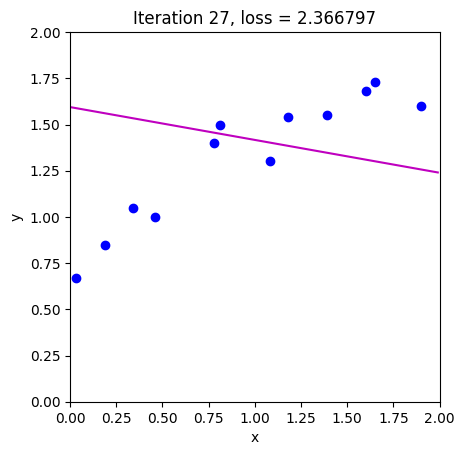

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.366797, b33.726790, c130.401632, d298.319709
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.366797, b5.562923, c16.016253, d33.726790
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.366797, b2.625816, c3.691191, d5.562923
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.366797, b2.363542, c2.449881, d2.625816
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.366797, b2.354672, c2.382367, d2.449881
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.366797, b2.354289, c2.359479, d2.382367
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.366797, b2.356492, c2.354053, d2.359479
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.356492, b2.353992, c2.354987, d2.359479
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.356492, b2.354437, c2.353935, d2.354987
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.354437, b2.353930, c2.354113, d2.354987
alfa 0.000630
before slope phi0:1.594424, phi1: -0.177767
after slope phi0:1.592868, phi1: -0.175573


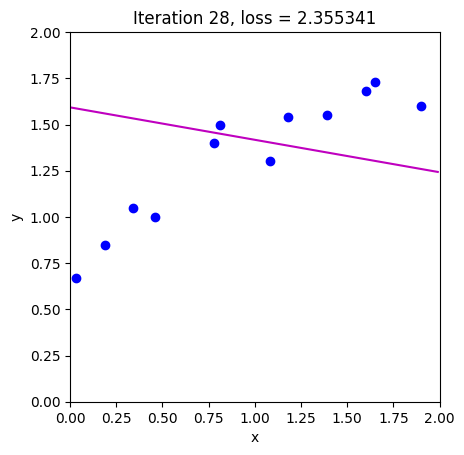

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.355341, b33.751391, c130.462290, d298.417516
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.355341, b5.563485, c16.028835, d33.751391
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.355341, b2.618366, c3.687748, d5.563485
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.355341, b2.353421, c2.441096, d2.618366
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.355341, b2.344106, c2.372691, d2.441096
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.355341, b2.343427, c2.349210, d2.372691
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.355341, b2.345432, c2.343388, d2.349210
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.345432, b2.343195, c2.344455, d2.349210
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.345432, b2.343552, c2.343227, d2.344455
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.343552, b2.343163, c2.343463, d2.344455
alfa 0.000630
before slope phi0:1.592868, phi1: -0.175573
after slope phi0:1.591303, phi1: -0.173399


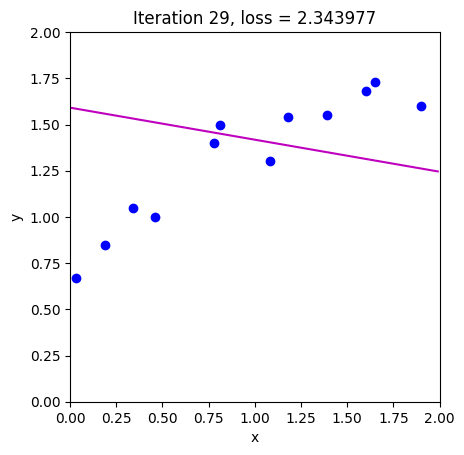

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.343977, b33.774959, c130.520790, d298.512007
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.343977, b5.563766, c16.040759, d33.774959
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.343977, b2.610884, c3.684147, d5.563766
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.343977, b2.343351, c2.432320, d2.610884
Iter 5, a=0.000, b=0.001, c=0.002, d=0.002
a 2.343977, b2.333605, c2.363052, d2.432320
Iter 6, a=0.000, b=0.001, c=0.001, d=0.002
a 2.343977, b2.332638, c2.338996, d2.363052
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.343977, b2.334451, c2.332791, d2.338996
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.334451, b2.332470, c2.333985, d2.338996
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.334451, b2.332742, c2.332587, d2.333985
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.332742, b2.332466, c2.332880, d2.333985
alfa 0.000630
before slope phi0:1.591303, phi1: -0.173399
after slope phi0:1.589731, phi1: -0.171243


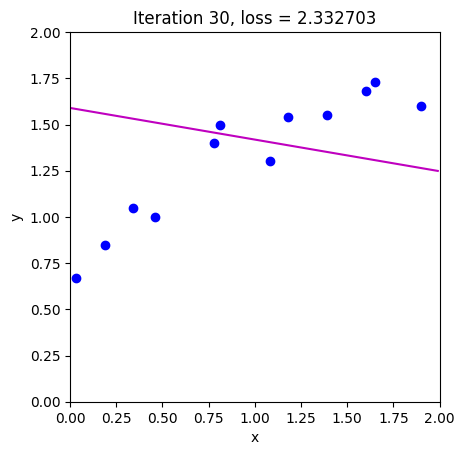

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.332703, b33.797527, c130.577201, d298.603286
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.332703, b5.563772, c16.052047, d33.797527
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.332703, b2.603370, c3.680393, d5.563772
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.332703, b2.333330, c2.423552, d2.603370
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.332703, b2.322957, c2.323166, d2.333330
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.332703, b2.325100, c2.321921, d2.323166
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.325100, b2.322489, c2.321844, d2.323166
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.322489, b2.321841, c2.322066, d2.323166
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.322489, b2.321959, c2.321819, d2.322066
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.321959, b2.321822, c2.321858, d2.322066
alfa 0.000587
before slope phi0:1.589731, phi1: -0.171243
after slope phi0:1.588260, phi1: -0.169253


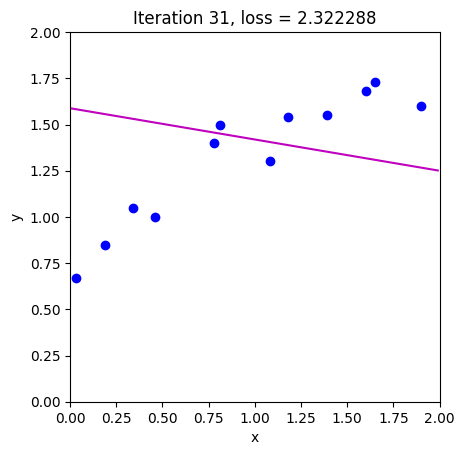

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.322288, b33.817632, c130.627826, d298.685357
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.322288, b5.563531, c16.061979, d33.817632
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.322288, b2.596346, c3.676760, d5.563531
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.322288, b2.324046, c2.415398, d2.596346
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.322288, b2.312919, c2.313505, d2.324046
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.322288, b2.314936, c2.312008, d2.313505
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.314936, b2.312492, c2.312015, d2.313505
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.312492, b2.311956, c2.312293, d2.313505
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.312492, b2.312038, c2.311971, d2.312293
Iter 10, a=0.001, b=0.001, c=0.001, d=0.001
a 2.312038, b2.311950, c2.312035, d2.312293
alfa 0.000587
before slope phi0:1.588260, phi1: -0.169253
after slope phi0:1.586784, phi1: -0.167278


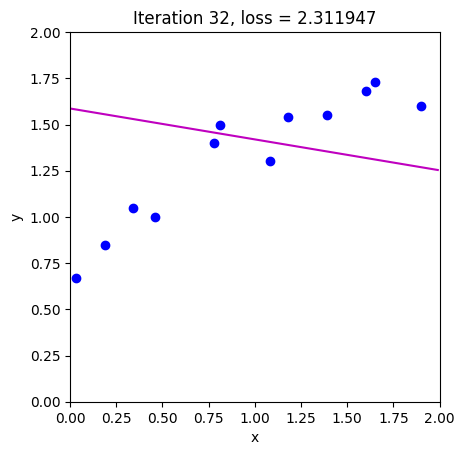

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.311947, b33.836926, c130.676754, d298.764817
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.311947, b5.563068, c16.071394, d33.836926
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.311947, b2.589298, c3.673005, d5.563068
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.311947, b2.314802, c2.407252, d2.589298
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.311947, b2.302943, c2.303895, d2.314802
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.311947, b2.304838, c2.302155, d2.303895
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.304838, b2.302558, c2.302243, d2.303895
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.302558, b2.302130, c2.302575, d2.303895
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.302558, b2.302175, c2.302181, d2.302575
Iter 10, a=0.000, b=0.001, c=0.001, d=0.001
a 2.302558, b2.302259, c2.302134, d2.302181
alfa 0.000560
before slope phi0:1.586784, phi1: -0.167278
after slope phi0:1.585370, phi1: -0.165408


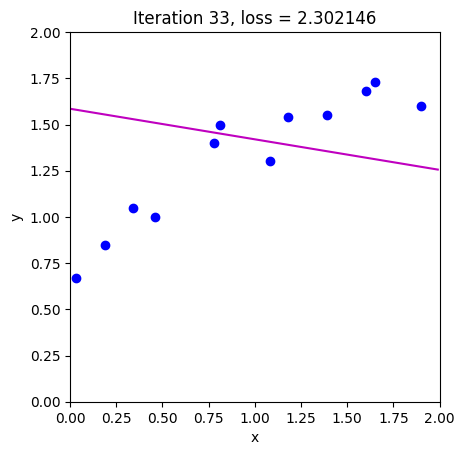

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.302146, b33.854585, c130.721873, d298.838228
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.302146, b5.562420, c16.079900, d33.854585
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.302146, b2.582548, c3.669306, d5.562420
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.302146, b2.306018, c2.399485, d2.582548
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.302146, b2.293482, c2.294772, d2.306018
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.302146, b2.295264, c2.292806, d2.294772
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.295264, b2.293133, c2.292970, d2.294772
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.293133, b2.292806, c2.293352, d2.294772
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.293133, b2.292818, c2.292891, d2.293352
Iter 10, a=0.000, b=0.001, c=0.001, d=0.001
a 2.293133, b2.292880, c2.292799, d2.292891
alfa 0.000560
before slope phi0:1.585370, phi1: -0.165408
after slope phi0:1.583950, phi1: -0.163551


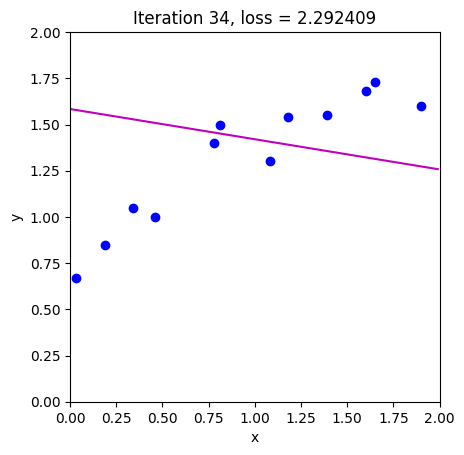

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.292409, b33.871548, c130.765536, d298.909400
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.292409, b5.561583, c16.087963, d33.871548
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.292409, b2.575778, c3.665502, d5.561583
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.292409, b2.297270, c2.391726, d2.575778
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.292409, b2.284074, c2.285695, d2.297270
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.292409, b2.285746, c2.283508, d2.285695
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.285746, b2.283763, c2.283746, d2.285695
Iter 8, a=0.000, b=0.001, c=0.001, d=0.001
a 2.283763, b2.283533, c2.284177, d2.285695
Iter 9, a=0.000, b=0.001, c=0.001, d=0.001
a 2.283763, b2.283512, c2.283650, d2.284177
Iter 10, a=0.000, b=0.001, c=0.001, d=0.001
a 2.283763, b2.283553, c2.283515, d2.283650
alfa 0.000560
before slope phi0:1.583950, phi1: -0.163551
after slope phi0:1.582527, phi1: -0.161707


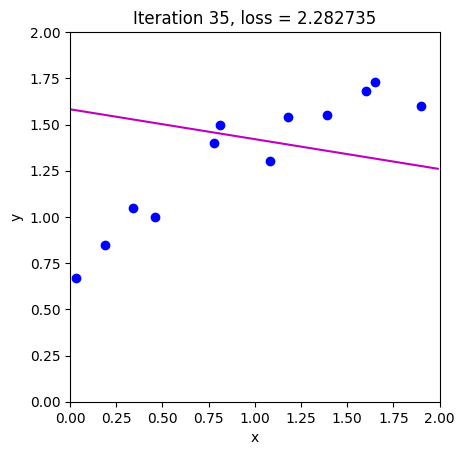

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.282735, b33.887835, c130.807784, d298.978397
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.282735, b5.560562, c16.095596, d33.887835
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.282735, b2.568988, c3.661597, d5.560562
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.282735, b2.288557, c2.383975, d2.568988
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.282735, b2.274720, c2.276661, d2.288557
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.282735, b2.276286, c2.274261, d2.276661
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.276286, b2.274444, c2.274570, d2.276661
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.276286, b2.274840, c2.274268, d2.274570
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.274840, b2.274361, c2.274271, d2.274570
Iter 10, a=0.000, b=0.001, c=0.001, d=0.001
a 2.274361, b2.274258, c2.274328, d2.274570
alfa 0.000526
before slope phi0:1.582527, phi1: -0.161707
after slope phi0:1.581184, phi1: -0.159986


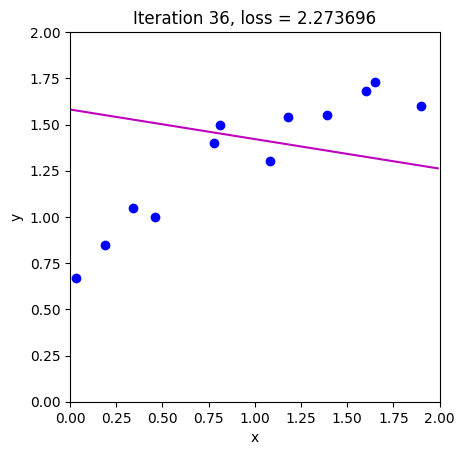

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.273696, b33.902528, c130.846210, d299.041274
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.273696, b5.559435, c16.102379, d33.902528
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.273696, b2.562586, c3.657832, d5.559435
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.273696, b2.280398, c2.376694, d2.562586
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.273696, b2.265975, c2.268209, d2.280398
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.273696, b2.267442, c2.265613, d2.268209
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.267442, b2.265731, c2.265987, d2.268209
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.267442, b2.266083, c2.265598, d2.265987
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.266083, b2.265663, c2.265631, d2.265987
Iter 10, a=0.000, b=0.001, c=0.001, d=0.001
a 2.265663, b2.265598, c2.265706, d2.265987
alfa 0.000526
before slope phi0:1.581184, phi1: -0.159986
after slope phi0:1.579838, phi1: -0.158276


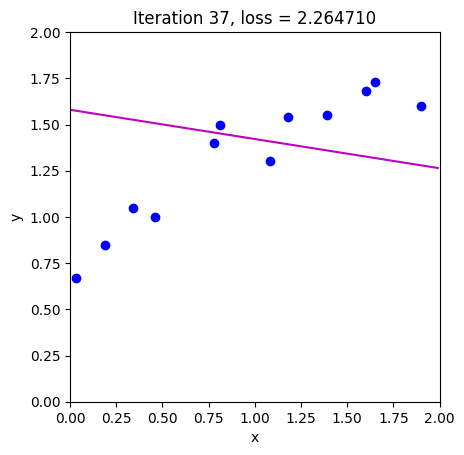

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.264710, b33.916658, c130.883455, d299.102335
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.264710, b5.558154, c16.108803, d33.916658
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.264710, b2.556169, c3.653983, d5.558154
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.264710, b2.272268, c2.369421, d2.556169
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.264710, b2.257275, c2.259794, d2.272268
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.264710, b2.258647, c2.257008, d2.259794
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.258647, b2.257063, c2.257445, d2.259794
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.258647, b2.257373, c2.256972, d2.257445
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.257373, b2.257008, c2.257033, d2.257445
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.257373, b2.257087, c2.256973, d2.257033
alfa 0.000500
before slope phi0:1.579838, phi1: -0.158276
after slope phi0:1.578556, phi1: -0.156663


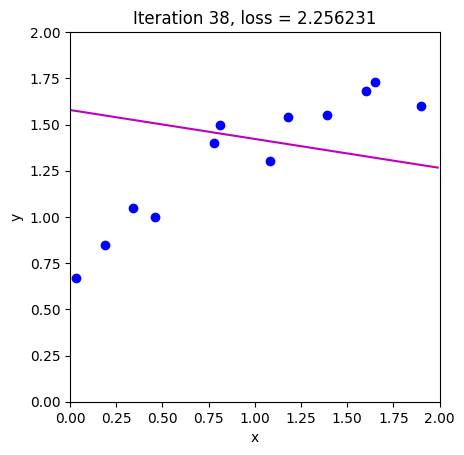

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.256231, b33.929547, c130.917712, d299.158606
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.256231, b5.556798, c16.114570, d33.929547
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.256231, b2.550064, c3.650253, d5.556798
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.256231, b2.264580, c2.362525, d2.550064
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.256231, b2.249059, c2.251842, d2.264580
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.256231, b2.250344, c2.248881, d2.251842
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.250344, b2.248877, c2.249377, d2.251842
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.250344, b2.249148, c2.248825, d2.249377
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.249148, b2.248835, c2.248912, d2.249377
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.249148, b2.248896, c2.248818, d2.248912
alfa 0.000500
before slope phi0:1.578556, phi1: -0.156663
after slope phi0:1.577272, phi1: -0.155060


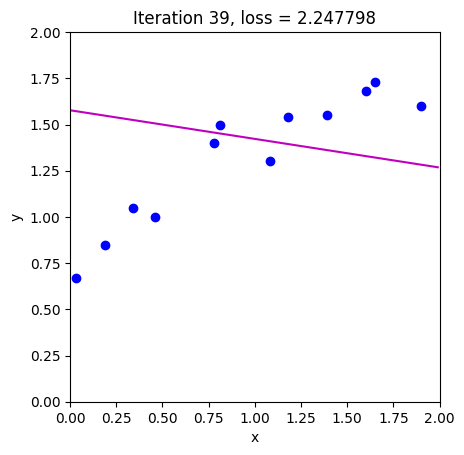

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.247798, b33.941955, c130.950961, d299.213328
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.247798, b5.555312, c16.120031, d33.941955
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.247798, b2.543947, c3.646451, d5.555312
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.247798, b2.256919, c2.355635, d2.543947
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.247798, b2.240884, c2.243924, d2.256919
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.247798, b2.242082, c2.240791, d2.243924
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.242082, b2.240730, c2.241344, d2.243924
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.242082, b2.240962, c2.240716, d2.241344
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.240962, b2.240701, c2.240828, d2.241344
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.240962, b2.240745, c2.240700, d2.240828
alfa 0.000500
before slope phi0:1.577272, phi1: -0.155060
after slope phi0:1.575985, phi1: -0.153467


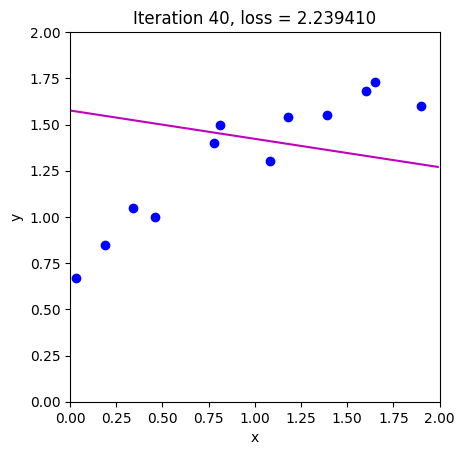

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.239410, b33.953895, c130.983228, d299.266539
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.239410, b5.553700, c16.125194, d33.953895
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.239410, b2.537817, c3.642580, d5.553700
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.239410, b2.249284, c2.348753, d2.537817
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.239410, b2.232747, c2.236038, d2.249284
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.239410, b2.233862, c2.232738, d2.236038
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.233862, b2.232621, c2.233346, d2.236038
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.233862, b2.232816, c2.232644, d2.233346
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.232816, b2.232604, c2.232781, d2.233346
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.232816, b2.232632, c2.232620, d2.232781
alfa 0.000500
before slope phi0:1.575985, phi1: -0.153467
after slope phi0:1.574695, phi1: -0.151882


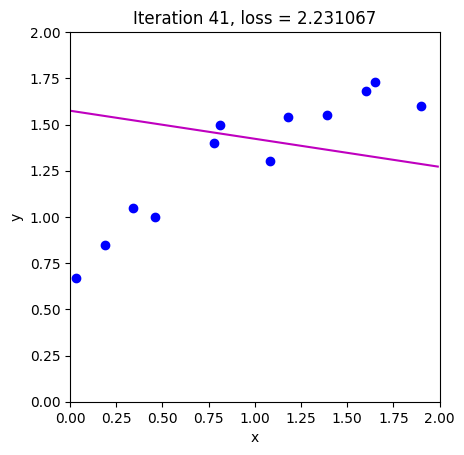

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.231067, b33.965378, c131.014539, d299.318278
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.231067, b5.551965, c16.130069, d33.965378
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.231067, b2.531677, c3.638643, d5.551965
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.231067, b2.241675, c2.341879, d2.531677
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.231067, b2.224648, c2.228184, d2.241675
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.231067, b2.225682, c2.224721, d2.228184
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.225682, b2.224549, c2.225384, d2.228184
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.225682, b2.224708, c2.224609, d2.225384
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.224708, b2.224545, c2.224770, d2.225384
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.224708, b2.224556, c2.224577, d2.224770
alfa 0.000446
before slope phi0:1.574695, phi1: -0.151882
after slope phi0:1.573542, phi1: -0.150476


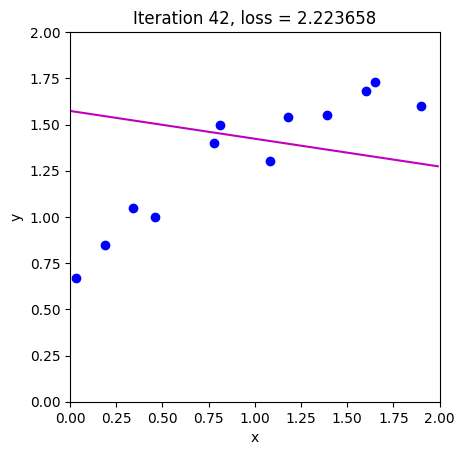

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.223658, b33.975231, c131.041654, d299.363178
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.223658, b5.550310, c16.134168, d33.975231
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.223658, b2.526185, c3.635070, d5.550310
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.223658, b2.234905, c2.335748, d2.526185
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.223658, b2.217452, c2.221201, d2.234905
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.223658, b2.218414, c2.217595, d2.221201
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.218414, b2.217377, c2.218306, d2.221201
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.218414, b2.217504, c2.217468, d2.218306
Iter 9, a=0.000, b=0.000, c=0.001, d=0.001
a 2.217504, b2.217383, c2.217650, d2.218306
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.217504, b2.217380, c2.217429, d2.217650
alfa 0.000446
before slope phi0:1.573542, phi1: -0.150476
after slope phi0:1.572386, phi1: -0.149077


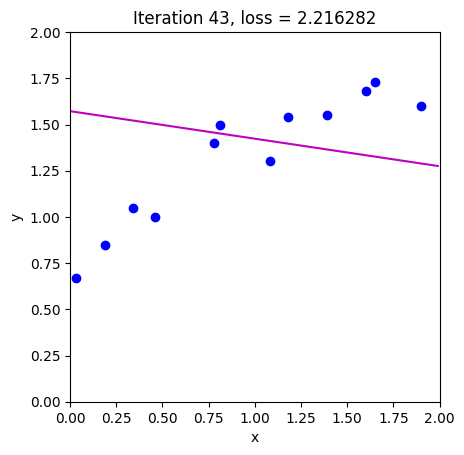

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.216282, b33.984739, c131.068044, d299.406963
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.216282, b5.548562, c16.138048, d33.984739
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.216282, b2.520686, c3.631446, d5.548562
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.216282, b2.228155, c2.329623, d2.520686
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.216282, b2.210285, c2.214242, d2.228155
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.216282, b2.211178, c2.210498, d2.214242
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.211178, b2.210233, c2.211255, d2.214242
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.211178, b2.210329, c2.210355, d2.211255
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.211178, b2.210515, c2.210241, d2.210355
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.210515, b2.210289, c2.210236, d2.210355
alfa 0.000459
before slope phi0:1.572386, phi1: -0.149077
after slope phi0:1.571194, phi1: -0.147643


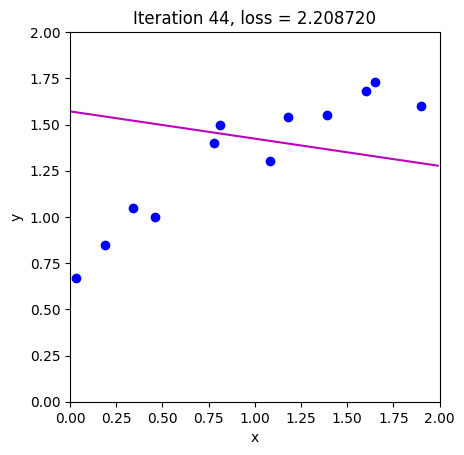

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.208720, b33.994186, c131.094500, d299.450943
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.208720, b5.546670, c16.141825, d33.994186
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.208720, b2.515014, c3.627664, d5.546670
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.208720, b2.221223, c2.323321, d2.515014
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.208720, b2.202933, c2.207101, d2.221223
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.208720, b2.203756, c2.203216, d2.207101
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.203756, b2.202904, c2.204019, d2.207101
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.203756, b2.202970, c2.203058, d2.204019
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.203756, b2.203135, c2.202902, d2.203058
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.203135, b2.202936, c2.202911, d2.203058
alfa 0.000459
before slope phi0:1.571194, phi1: -0.147643
after slope phi0:1.570000, phi1: -0.146216


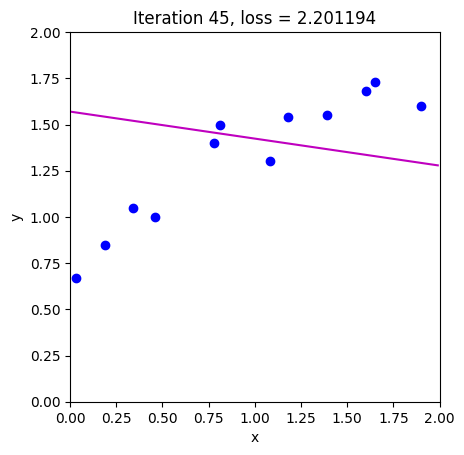

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.201194, b34.003283, c131.120222, d299.493793
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.201194, b5.544685, c16.145381, d34.003283
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.201194, b2.509335, c3.623832, d5.544685
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.201194, b2.214312, c2.317026, d2.509335
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.201194, b2.195612, c2.199984, d2.214312
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.201194, b2.196366, c2.195963, d2.199984
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.196366, b2.195606, c2.196812, d2.199984
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.196366, b2.195641, c2.195789, d2.196812
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.196366, b2.195786, c2.195593, d2.195789
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.195786, b2.195614, c2.195616, d2.195789
alfa 0.000406
before slope phi0:1.570000, phi1: -0.146216
after slope phi0:1.568944, phi1: -0.144962


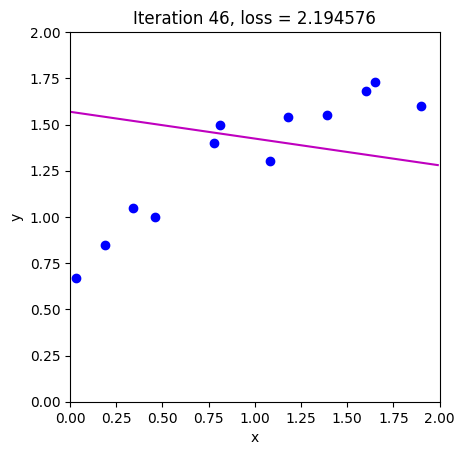

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.194576, b34.011017, c131.142306, d299.530663
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.194576, b5.542851, c16.148331, d34.011017
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.194576, b2.504312, c3.620403, d5.542851
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.194576, b2.208226, c2.311471, d2.504312
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.194576, b2.189171, c2.193721, d2.208226
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.194576, b2.189867, c2.189582, d2.193721
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.189867, b2.189185, c2.190470, d2.193721
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.189867, b2.189194, c2.189395, d2.190470
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.189867, b2.189321, c2.189164, d2.189395
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.189321, b2.189173, c2.189198, d2.189395
alfa 0.000406
before slope phi0:1.568944, phi1: -0.144962
after slope phi0:1.567886, phi1: -0.143714


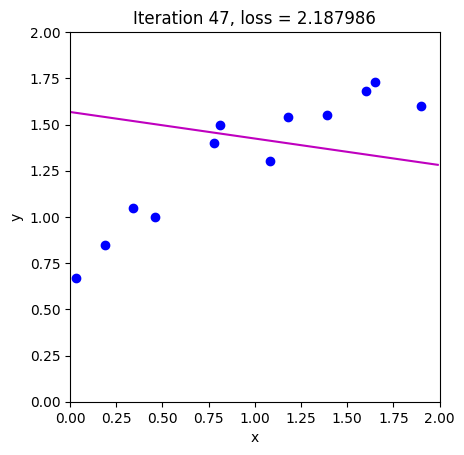

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.187986, b34.018490, c131.163844, d299.566692
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.187986, b5.540948, c16.151117, d34.018490
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.187986, b2.499284, c3.616938, d5.540948
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.187986, b2.202157, c2.305923, d2.499284
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.187986, b2.182754, c2.187478, d2.202157
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.187986, b2.183392, c2.183223, d2.187478
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.183392, b2.182787, c2.184149, d2.187478
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.183392, b2.182770, c2.183023, d2.184149
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.183392, b2.182881, c2.182758, d2.183023
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.182881, b2.182755, c2.182803, d2.183023
alfa 0.000406
before slope phi0:1.567886, phi1: -0.143714
after slope phi0:1.566827, phi1: -0.142471


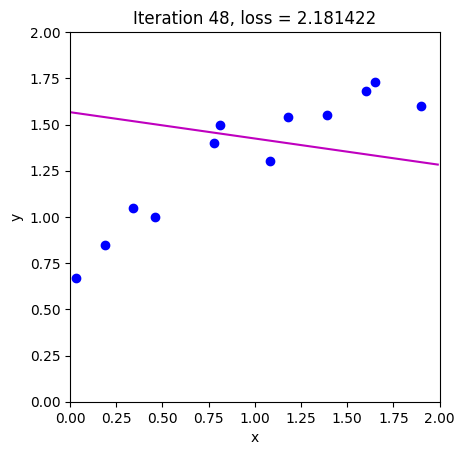

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.181422, b34.025710, c131.184848, d299.601897
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.181422, b5.538979, c16.153742, d34.025710
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.181422, b2.494251, c3.613437, d5.538979
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.181422, b2.196103, c2.300380, d2.494251
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.181422, b2.176360, c2.181254, d2.196103
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.181422, b2.176941, c2.176886, d2.181254
Iter 7, a=0.000, b=0.000, c=0.001, d=0.001
a 2.176941, b2.176413, c2.177850, d2.181254
Iter 8, a=0.000, b=0.000, c=0.001, d=0.001
a 2.176941, b2.176370, c2.176673, d2.177850
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.176941, b2.176464, c2.176374, d2.176673
Iter 10, a=0.000, b=0.000, c=0.000, d=0.001
a 2.176464, b2.176361, c2.176431, d2.176673
alfa 0.000406
before slope phi0:1.566827, phi1: -0.142471
after slope phi0:1.565767, phi1: -0.141234


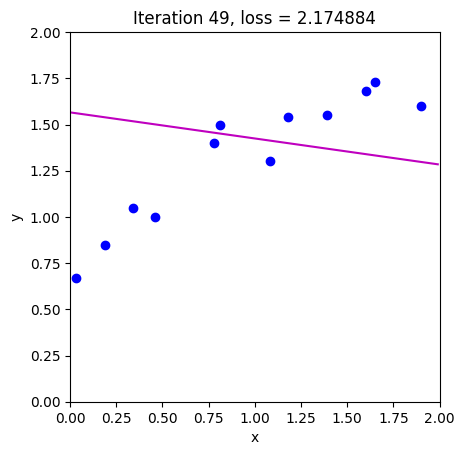

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.174884, b34.032681, c131.205328, d299.636295
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.174884, b5.536944, c16.156210, d34.032681
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.174884, b2.489214, c3.609901, d5.536944
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.174884, b2.190066, c2.294842, d2.489214
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.174884, b2.169989, c2.175050, d2.190066
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.174884, b2.170515, c2.170570, d2.175050
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.174884, b2.171480, c2.170042, d2.170570
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.171480, b2.170302, c2.169999, d2.170570
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.170302, b2.170003, c2.170092, d2.170570
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.170302, b2.170060, c2.169990, d2.170092
alfa 0.000409
before slope phi0:1.565767, phi1: -0.141234
after slope phi0:1.564697, phi1: -0.139991


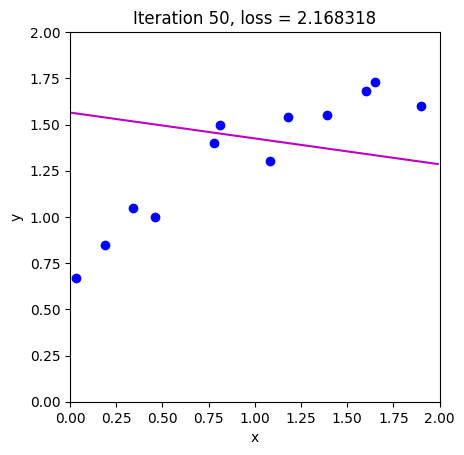

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.168318, b34.039465, c131.225460, d299.670181
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.168318, b5.534828, c16.158544, d34.039465
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.168318, b2.484132, c3.606302, d5.534828
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.168318, b2.183994, c2.289266, d2.484132
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.168318, b2.163589, c2.168814, d2.183994
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.168318, b2.164059, c2.164224, d2.168814
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.168318, b2.164987, c2.163623, d2.164224
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.164987, b2.163859, c2.163605, d2.164224
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.163859, b2.163592, c2.163714, d2.164224
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.163859, b2.163638, c2.163590, d2.163714
alfa 0.000409
before slope phi0:1.564697, phi1: -0.139991
after slope phi0:1.563626, phi1: -0.138754


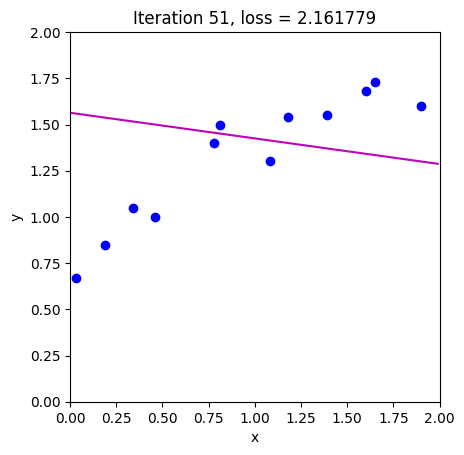

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.161779, b34.046006, c131.245082, d299.703279
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.161779, b5.532649, c16.160725, d34.046006
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.161779, b2.479046, c3.602670, d5.532649
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.161779, b2.177940, c2.283695, d2.479046
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.161779, b2.157211, c2.162598, d2.177940
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.161779, b2.157627, c2.157900, d2.162598
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.161779, b2.158520, c2.157227, d2.157900
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.158520, b2.157439, c2.157233, d2.157900
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.157439, b2.157205, c2.157358, d2.157900
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.157439, b2.157240, c2.157213, d2.157358
alfa 0.000409
before slope phi0:1.563626, phi1: -0.138754
after slope phi0:1.562554, phi1: -0.137522


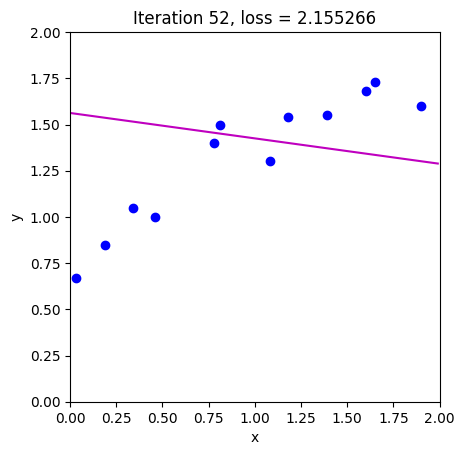

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.155266, b34.052310, c131.264204, d299.735608
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.155266, b5.530408, c16.162756, d34.052310
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.155266, b2.473957, c3.599005, d5.530408
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.155266, b2.171901, c2.278131, d2.473957
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.155266, b2.150856, c2.156401, d2.171901
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.155266, b2.151220, c2.151598, d2.156401
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.155266, b2.152077, c2.150854, d2.151598
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.152077, b2.151043, c2.150884, d2.151598
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.151043, b2.150840, c2.151025, d2.151598
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.151043, b2.150864, c2.150858, d2.151025
alfa 0.000409
before slope phi0:1.562554, phi1: -0.137522
after slope phi0:1.561481, phi1: -0.136295


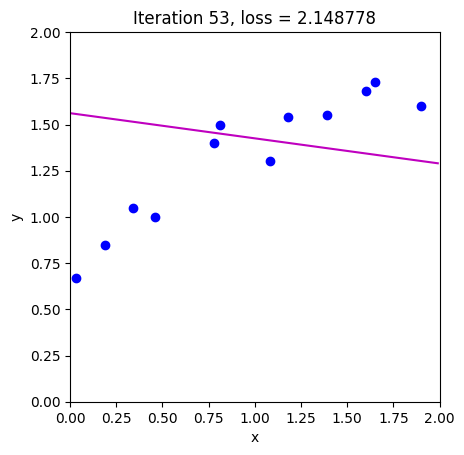

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.148778, b34.058383, c131.282837, d299.767182
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.148778, b5.528107, c16.164642, d34.058383
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.148778, b2.468865, c3.595308, d5.528107
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.148778, b2.165878, c2.272574, d2.468865
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.148778, b2.144523, c2.150223, d2.165878
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.148778, b2.144835, c2.145317, d2.150223
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.148778, b2.145658, c2.144504, d2.145317
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.145658, b2.144670, c2.144556, d2.145317
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.144670, b2.144497, c2.144713, d2.145317
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.144670, b2.144512, c2.144526, d2.144713
alfa 0.000355
before slope phi0:1.561481, phi1: -0.136295
after slope phi0:1.560548, phi1: -0.135233


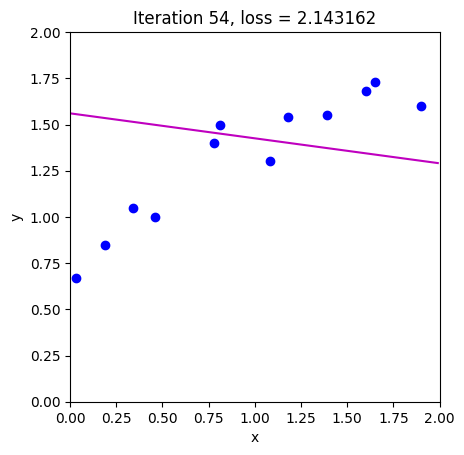

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.143162, b34.063461, c131.298610, d299.793972
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.143162, b5.526056, c16.166156, d34.063461
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.143162, b2.464437, c3.592069, d5.526056
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.143162, b2.160659, c2.267750, d2.464437
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.143162, b2.139039, c2.144871, d2.160659
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.143162, b2.139307, c2.139877, d2.144871
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.143162, b2.140101, c2.139006, d2.139877
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.140101, b2.139152, c2.139078, d2.139877
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.139152, b2.139005, c2.139247, d2.139877
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.139152, b2.139011, c2.139043, d2.139247
alfa 0.000355
before slope phi0:1.560548, phi1: -0.135233
after slope phi0:1.559614, phi1: -0.134176


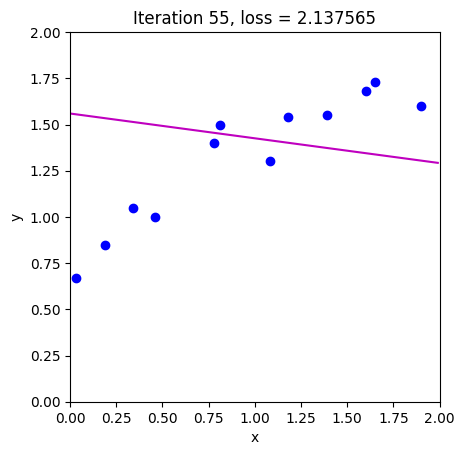

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.137565, b34.068372, c131.314028, d299.820217
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.137565, b5.523962, c16.167564, d34.068372
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.137565, b2.460008, c3.588807, d5.523962
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.137565, b2.155451, c2.262932, d2.460008
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.137565, b2.133572, c2.139534, d2.155451
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.137565, b2.133797, c2.134453, d2.139534
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.137565, b2.134562, c2.133524, d2.134453
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.134562, b2.133652, c2.133616, d2.134453
Iter 9, a=0.000, b=0.000, c=0.000, d=0.001
a 2.133652, b2.133530, c2.133798, d2.134453
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.133652, b2.133528, c2.133576, d2.133798
alfa 0.000355
before slope phi0:1.559614, phi1: -0.134176
after slope phi0:1.558680, phi1: -0.133121


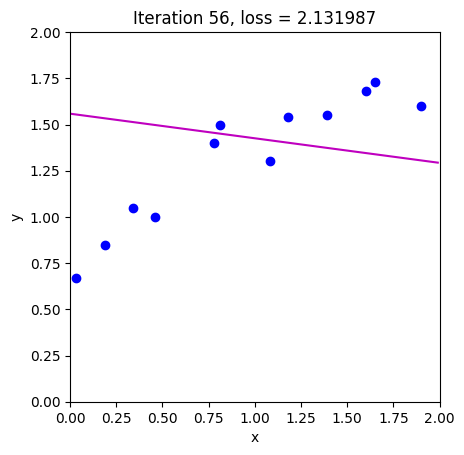

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.131987, b34.073119, c131.329099, d299.845925
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.131987, b5.521826, c16.168869, d34.073119
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.131987, b2.455577, c3.585523, d5.521826
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.131987, b2.150256, c2.258119, d2.455577
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.131987, b2.128122, c2.134211, d2.150256
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.131987, b2.128304, c2.129046, d2.134211
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.131987, b2.129040, c2.128060, d2.129046
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.129040, b2.128168, c2.128170, d2.129046
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.129040, b2.128362, c2.128072, d2.128170
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.128362, b2.128125, c2.128061, d2.128170
alfa 0.000369
before slope phi0:1.558680, phi1: -0.133121
after slope phi0:1.557710, phi1: -0.132031


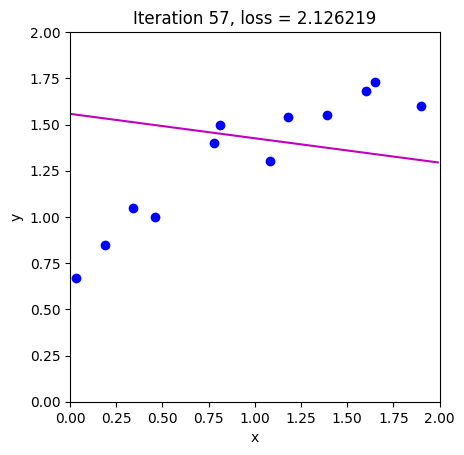

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.126219, b34.077877, c131.344385, d299.872057
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.126219, b5.519566, c16.170119, d34.077877
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.126219, b2.450978, c3.582094, d5.519566
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.126219, b2.144877, c2.253130, d2.450978
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.126219, b2.122483, c2.128702, d2.144877
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.126219, b2.122622, c2.123450, d2.128702
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.126219, b2.123329, c2.122406, d2.123450
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.123329, b2.122496, c2.122536, d2.123450
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.123329, b2.122676, c2.122412, d2.122536
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.122676, b2.122457, c2.122410, d2.122536
alfa 0.000369
before slope phi0:1.557710, phi1: -0.132031
after slope phi0:1.556739, phi1: -0.130945


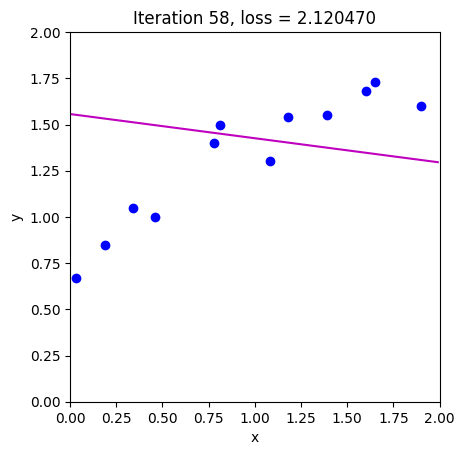

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.120470, b34.082465, c131.359310, d299.897633
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.120470, b5.517263, c16.171261, d34.082465
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.120470, b2.446378, c3.578642, d5.517263
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.120470, b2.139511, c2.248147, d2.446378
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.120470, b2.116862, c2.123209, d2.139511
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.120470, b2.116958, c2.117871, d2.123209
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.120470, b2.117637, c2.116771, d2.117871
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.117637, b2.116841, c2.116919, d2.117871
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.117637, b2.117009, c2.116770, d2.116919
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.117009, b2.116807, c2.116777, d2.116919
alfa 0.000369
before slope phi0:1.556739, phi1: -0.130945
after slope phi0:1.555767, phi1: -0.129863


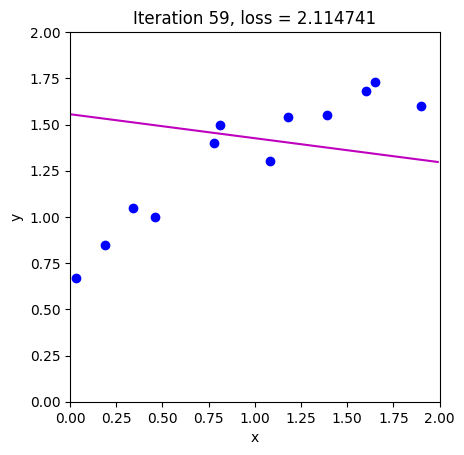

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.114741, b34.086886, c131.373881, d299.922662
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.114741, b5.514917, c16.172299, d34.086886
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.114741, b2.441777, c3.575169, d5.514917
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.114741, b2.134157, c2.243169, d2.441777
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.114741, b2.111258, c2.117730, d2.134157
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.114741, b2.111313, c2.112309, d2.117730
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.114741, b2.111964, c2.111153, d2.112309
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.111964, b2.111205, c2.111320, d2.112309
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.111964, b2.111361, c2.111146, d2.111320
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.111361, b2.111174, c2.111161, d2.111320
alfa 0.000369
before slope phi0:1.555767, phi1: -0.129863
after slope phi0:1.554795, phi1: -0.128784


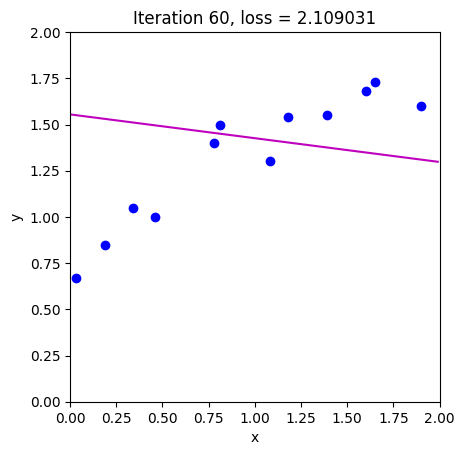

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.109031, b34.091144, c131.388105, d299.947155
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.109031, b5.512530, c16.173234, d34.091144
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.109031, b2.437174, c3.571674, d5.512530
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.109031, b2.128817, c2.238198, d2.437174
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.109031, b2.105671, c2.112267, d2.128817
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.109031, b2.105685, c2.106764, d2.112267
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.109031, b2.106309, c2.105553, d2.106764
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.106309, b2.105586, c2.105738, d2.106764
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.106309, b2.105730, c2.105540, d2.105738
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.105730, b2.105560, c2.105563, d2.105738
alfa 0.000315
before slope phi0:1.554795, phi1: -0.128784
after slope phi0:1.553965, phi1: -0.127866


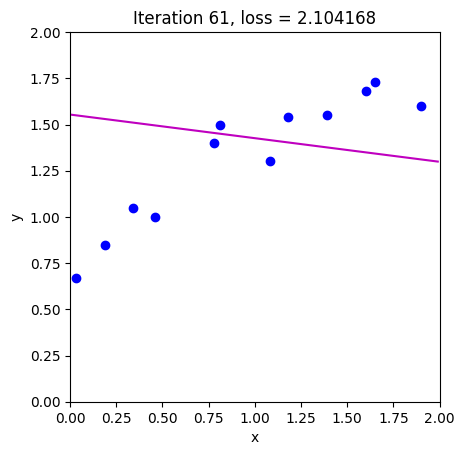

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.104168, b34.094644, c131.399969, d299.967635
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.104168, b5.510454, c16.173946, d34.094644
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.104168, b2.433241, c3.568669, d5.510454
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.104168, b2.124264, c2.233955, d2.433241
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.104168, b2.100911, c2.107610, d2.124264
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.104168, b2.100891, c2.102038, d2.107610
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.104168, b2.101492, c2.100782, d2.102038
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.101492, b2.100800, c2.100982, d2.102038
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.101492, b2.100933, c2.100763, d2.100982
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.100933, b2.100777, c2.100793, d2.100982
alfa 0.000315
before slope phi0:1.553965, phi1: -0.127866
after slope phi0:1.553133, phi1: -0.126950


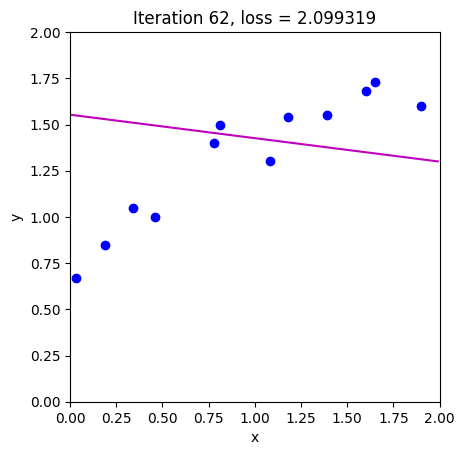

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.099319, b34.098029, c131.411589, d299.987739
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.099319, b5.508350, c16.174587, d34.098029
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.099319, b2.429306, c3.565650, d5.508350
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.099319, b2.119720, c2.229715, d2.429306
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.099319, b2.096164, c2.102964, d2.119720
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.099319, b2.096110, c2.097325, d2.102964
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.099319, b2.096688, c2.096023, d2.097325
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.096688, b2.096026, c2.096238, d2.097325
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.096688, b2.096150, c2.096000, d2.096238
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.096150, b2.096007, c2.096036, d2.096238
alfa 0.000315
before slope phi0:1.553133, phi1: -0.126950
after slope phi0:1.552302, phi1: -0.126037


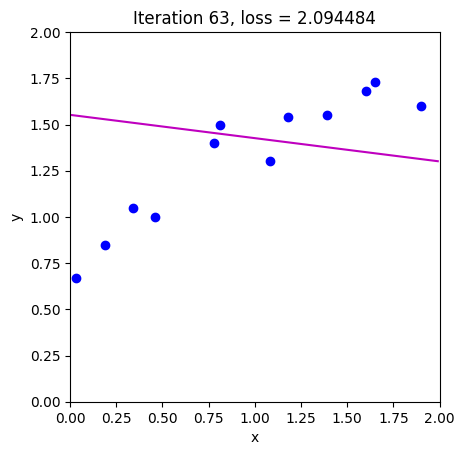

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.094484, b34.101301, c131.422968, d300.007472
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.094484, b5.506218, c16.175157, d34.101301
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.094484, b2.425372, c3.562617, d5.506218
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.094484, b2.115185, c2.225481, d2.425372
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.094484, b2.091429, c2.098329, d2.115185
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.094484, b2.091341, c2.092623, d2.098329
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.094484, b2.091897, c2.091277, d2.092623
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.091897, b2.091265, c2.091507, d2.092623
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.091897, b2.091379, c2.091249, d2.091507
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.091379, b2.091249, c2.091292, d2.091507
alfa 0.000315
before slope phi0:1.552302, phi1: -0.126037
after slope phi0:1.551470, phi1: -0.125127


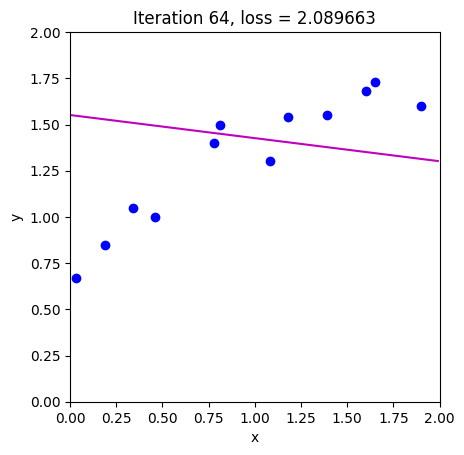

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.089663, b34.104463, c131.434112, d300.026840
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.089663, b5.504057, c16.175657, d34.104463
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.089663, b2.421438, c3.559570, d5.504057
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.089663, b2.110659, c2.221251, d2.421438
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.089663, b2.086707, c2.093705, d2.110659
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.089663, b2.086586, c2.087933, d2.093705
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.089663, b2.087120, c2.086543, d2.087933
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.087120, b2.086517, c2.086788, d2.087933
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.087120, b2.086621, c2.086510, d2.086788
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.086621, b2.086504, c2.086560, d2.086788
alfa 0.000315
before slope phi0:1.551470, phi1: -0.125127
after slope phi0:1.550638, phi1: -0.124219


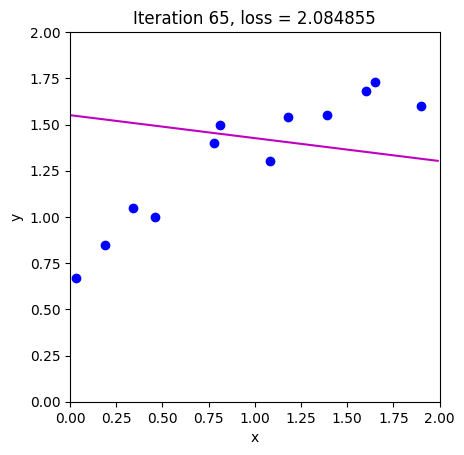

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.084855, b34.107515, c131.445024, d300.045849
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.084855, b5.501870, c16.176089, d34.107515
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.084855, b2.417504, c3.556509, d5.501870
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.084855, b2.106143, c2.217026, d2.417504
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.084855, b2.081996, c2.089092, d2.106143
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.084855, b2.081843, c2.083255, d2.089092
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.084855, b2.082356, c2.081822, d2.083255
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.082356, b2.081782, c2.082082, d2.083255
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.082356, b2.081876, c2.081784, d2.082082
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.081876, b2.081772, c2.081840, d2.082082
alfa 0.000315
before slope phi0:1.550638, phi1: -0.124219
after slope phi0:1.549806, phi1: -0.123314


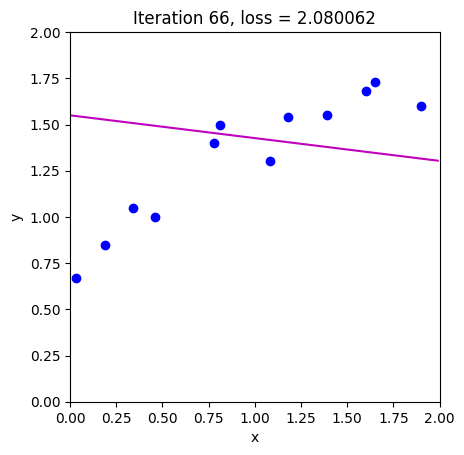

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.080062, b34.110459, c131.455707, d300.064504
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.080062, b5.499656, c16.176455, d34.110459
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.080062, b2.413570, c3.553435, d5.499656
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.080062, b2.101636, c2.212806, d2.413570
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.080062, b2.077298, c2.084490, d2.101636
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.080062, b2.077113, c2.078589, d2.084490
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.080062, b2.077605, c2.077114, d2.078589
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.077605, b2.077059, c2.077387, d2.078589
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.077605, b2.077144, c2.077071, d2.077387
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.077144, b2.077052, c2.077133, d2.077387
alfa 0.000315
before slope phi0:1.549806, phi1: -0.123314
after slope phi0:1.548973, phi1: -0.122411


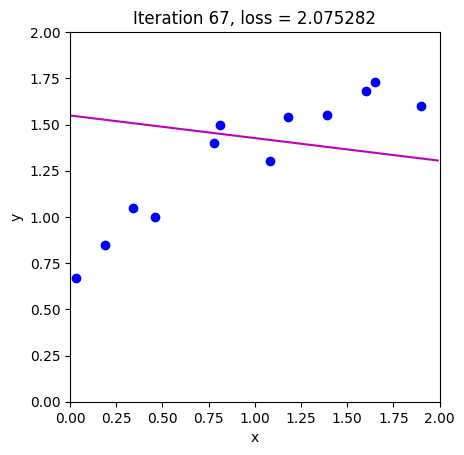

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.075282, b34.113299, c131.466165, d300.082813
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.075282, b5.497415, c16.176754, d34.113299
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.075282, b2.409637, c3.550348, d5.497415
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.075282, b2.097138, c2.208590, d2.409637
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.075282, b2.072612, c2.079898, d2.097138
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.075282, b2.072396, c2.073935, d2.079898
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.075282, b2.072866, c2.072417, d2.073935
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.072866, b2.072349, c2.072705, d2.073935
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.072866, b2.072424, c2.072370, d2.072705
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.072424, b2.072345, c2.072438, d2.072705
alfa 0.000315
before slope phi0:1.548973, phi1: -0.122411
after slope phi0:1.548140, phi1: -0.121511


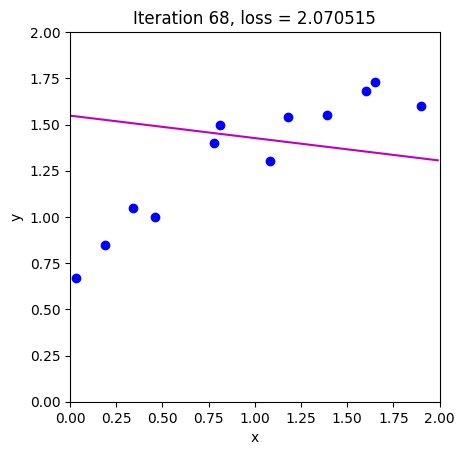

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.070515, b34.116034, c131.476402, d300.100779
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.070515, b5.495150, c16.176989, d34.116034
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.070515, b2.405704, c3.547249, d5.495150
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.070515, b2.092650, c2.204379, d2.405704
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.070515, b2.067939, c2.075317, d2.092650
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.070515, b2.067691, c2.069292, d2.075317
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.070515, b2.068141, c2.067733, d2.069292
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.068141, b2.067651, c2.068034, d2.069292
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.068141, b2.067717, c2.067681, d2.068034
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.067717, b2.067650, c2.067756, d2.068034
alfa 0.000315
before slope phi0:1.548140, phi1: -0.121511
after slope phi0:1.547307, phi1: -0.120614


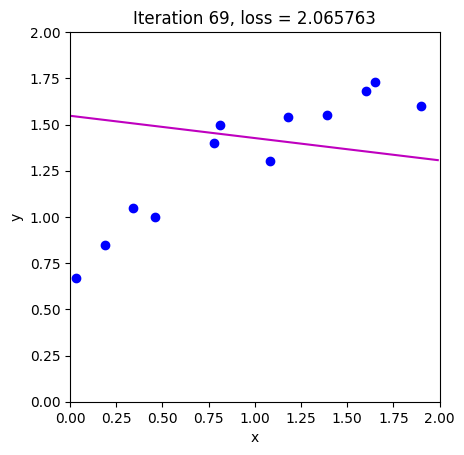

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.065763, b34.118668, c131.486422, d300.118409
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.065763, b5.492859, c16.177160, d34.118668
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.065763, b2.401772, c3.544137, d5.492859
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.065763, b2.088170, c2.200174, d2.401772
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.065763, b2.063277, c2.070746, d2.088170
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.065763, b2.062999, c2.064660, d2.070746
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.065763, b2.063429, c2.063061, d2.064660
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.063429, b2.062965, c2.063376, d2.064660
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.063429, b2.063023, c2.063005, d2.063376
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.063023, b2.062968, c2.063086, d2.063376
alfa 0.000315
before slope phi0:1.547307, phi1: -0.120614
after slope phi0:1.546474, phi1: -0.119719


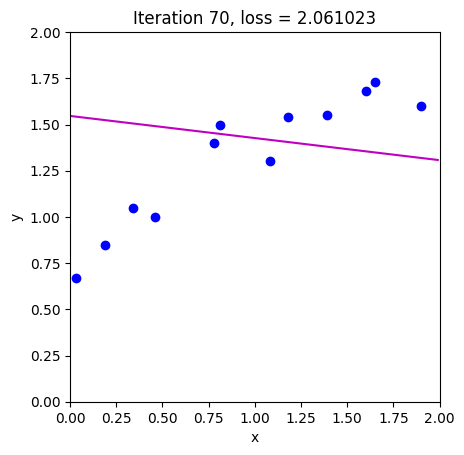

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.061023, b34.121201, c131.496228, d300.135709
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.061023, b5.490543, c16.177269, d34.121201
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.061023, b2.397840, c3.541014, d5.490543
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.061023, b2.083700, c2.195973, d2.397840
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.061023, b2.058627, c2.066186, d2.083700
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.061023, b2.058320, c2.060041, d2.066186
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.061023, b2.058729, c2.058402, d2.060041
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.058729, b2.058292, c2.058730, d2.060041
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.058729, b2.058341, c2.058341, d2.058730
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.058729, b2.058427, c2.058298, d2.058341
alfa 0.000288
before slope phi0:1.546474, phi1: -0.119719
after slope phi0:1.545712, phi1: -0.118902


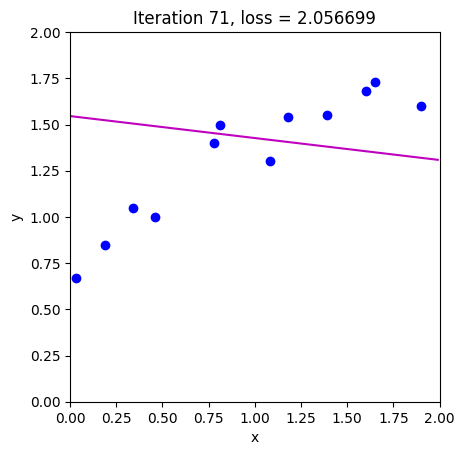

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.056699, b34.123428, c131.505007, d300.151237
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.056699, b5.488403, c16.177313, d34.123428
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.056699, b2.394244, c3.538145, d5.488403
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.056699, b2.079619, c2.192134, d2.394244
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.056699, b2.054384, c2.062024, d2.079619
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.056699, b2.054049, c2.055824, d2.062024
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.056699, b2.054441, c2.054149, d2.055824
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.054441, b2.054028, c2.054489, d2.055824
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.054441, b2.054069, c2.054085, d2.054489
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.054441, b2.054149, c2.054031, d2.054085
alfa 0.000288
before slope phi0:1.545712, phi1: -0.118902
after slope phi0:1.544950, phi1: -0.118088


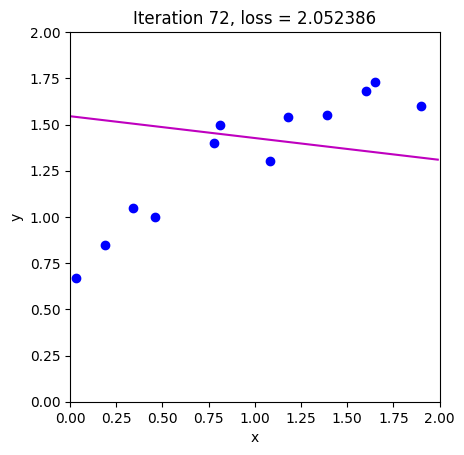

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.052386, b34.125574, c131.513612, d300.166498
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.052386, b5.486243, c16.177306, d34.125574
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.052386, b2.390649, c3.535268, d5.486243
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.052386, b2.075545, c2.188299, d2.390649
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.052386, b2.050150, c2.057870, d2.075545
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.052386, b2.049789, c2.051617, d2.057870
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.052386, b2.050163, c2.049907, d2.051617
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.050163, b2.049774, c2.050259, d2.051617
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.050163, b2.049807, c2.049838, d2.050259
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.050163, b2.049882, c2.049774, d2.049838
alfa 0.000288
before slope phi0:1.544950, phi1: -0.118088
after slope phi0:1.544187, phi1: -0.117276


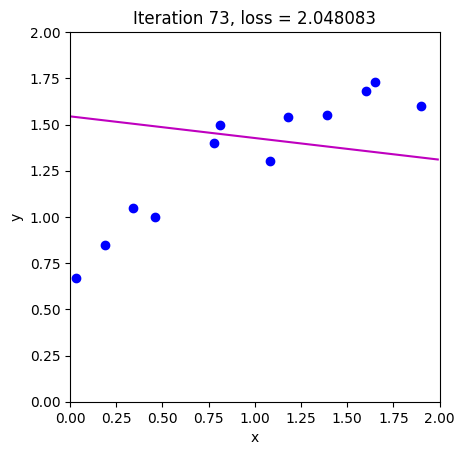

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.048083, b34.127641, c131.522047, d300.181494
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.048083, b5.484064, c16.177249, d34.127641
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.048083, b2.387054, c3.532381, d5.484064
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.048083, b2.071479, c2.184469, d2.387054
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.048083, b2.045927, c2.053725, d2.071479
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.048083, b2.045540, c2.047420, d2.053725
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.048083, b2.045896, c2.045675, d2.047420
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.045896, b2.045530, c2.046038, d2.047420
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.045896, b2.045555, c2.045602, d2.046038
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.045896, b2.045625, c2.045528, d2.045602
alfa 0.000288
before slope phi0:1.544187, phi1: -0.117276
after slope phi0:1.543425, phi1: -0.116465


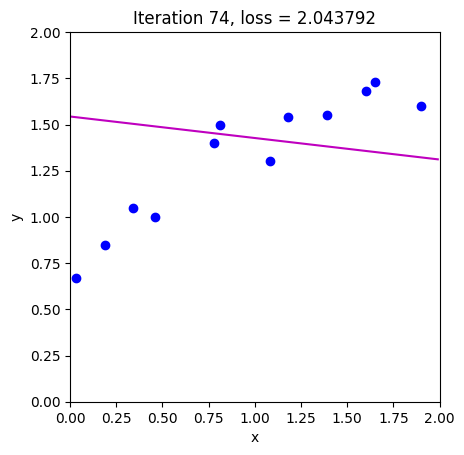

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.043792, b34.129629, c131.530314, d300.196231
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.043792, b5.481866, c16.177144, d34.129629
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.043792, b2.383461, c3.529485, d5.481866
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.043792, b2.067420, c2.180643, d2.383461
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.043792, b2.041713, c2.049589, d2.067420
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.043792, b2.041300, c2.043232, d2.049589
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.043792, b2.041639, c2.041453, d2.043232
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.041639, b2.041296, c2.041827, d2.043232
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.041639, b2.041313, c2.041376, d2.041827
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.041639, b2.041379, c2.041291, d2.041376
alfa 0.000288
before slope phi0:1.543425, phi1: -0.116465
after slope phi0:1.542662, phi1: -0.115657


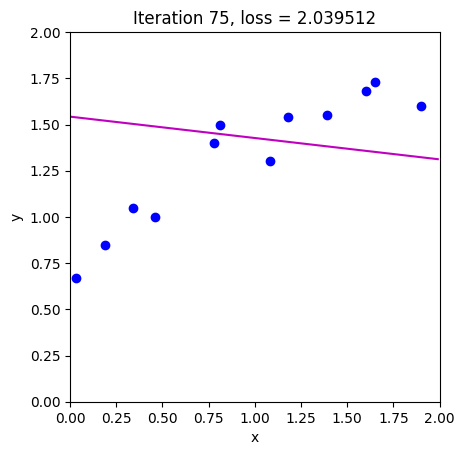

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.039512, b34.131539, c131.538416, d300.210710
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.039512, b5.479649, c16.176991, d34.131539
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.039512, b2.379868, c3.526580, d5.479649
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.039512, b2.063369, c2.176821, d2.379868
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.039512, b2.037509, c2.045462, d2.063369
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.039512, b2.037071, c2.039054, d2.045462
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.039512, b2.037393, c2.037240, d2.039054
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.037393, b2.037073, c2.037626, d2.039054
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.037393, b2.037082, c2.037160, d2.037626
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.037393, b2.037143, c2.037065, d2.037160
alfa 0.000288
before slope phi0:1.542662, phi1: -0.115657
after slope phi0:1.541899, phi1: -0.114850


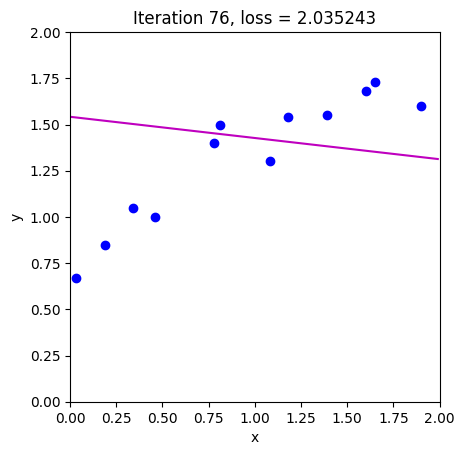

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.035243, b34.133374, c131.546354, d300.224938
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.035243, b5.477414, c16.176791, d34.133374
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.035243, b2.376277, c3.523667, d5.477414
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.035243, b2.059326, c2.173004, d2.376277
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.035243, b2.033315, c2.041343, d2.059326
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.035243, b2.032852, c2.034885, d2.041343
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.035243, b2.033157, c2.033038, d2.034885
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.033157, b2.032859, c2.033435, d2.034885
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.033157, b2.032861, c2.032954, d2.033435
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.033157, b2.032917, c2.032849, d2.032954
alfa 0.000288
before slope phi0:1.541899, phi1: -0.114850
after slope phi0:1.541137, phi1: -0.114046


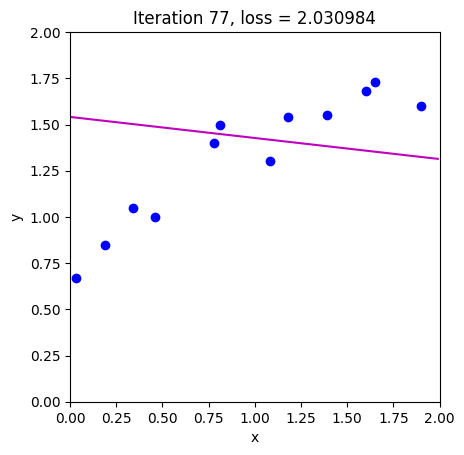

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.030984, b34.135133, c131.554132, d300.238916
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.030984, b5.475162, c16.176545, d34.135133
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.030984, b2.372687, c3.520746, d5.475162
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.030984, b2.055290, c2.169191, d2.372687
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.030984, b2.029131, c2.037233, d2.055290
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.030984, b2.028643, c2.030726, d2.037233
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.030984, b2.028931, c2.028845, d2.030726
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.028931, b2.028656, c2.029254, d2.030726
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.028931, b2.028650, c2.028758, d2.029254
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.028931, b2.028701, c2.028643, d2.028758
alfa 0.000288
before slope phi0:1.541137, phi1: -0.114046
after slope phi0:1.540374, phi1: -0.113243


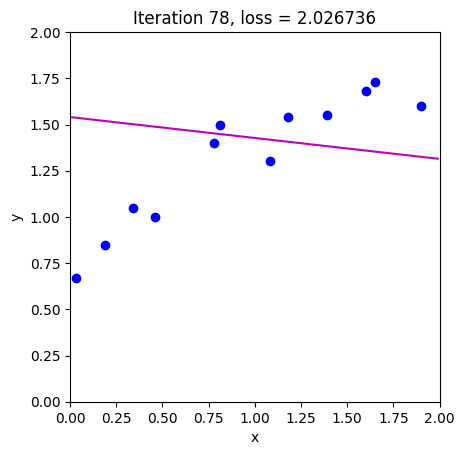

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.026736, b34.136819, c131.561751, d300.252649
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.026736, b5.472892, c16.176253, d34.136819
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.026736, b2.369099, c3.517817, d5.472892
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.026736, b2.051262, c2.165383, d2.369099
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.026736, b2.024956, c2.033132, d2.051262
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.026736, b2.024444, c2.026575, d2.033132
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.026736, b2.024716, c2.024663, d2.026575
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.024716, b2.024462, c2.025082, d2.026575
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.024716, b2.024450, c2.024571, d2.025082
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.024716, b2.024495, c2.024447, d2.024571
alfa 0.000288
before slope phi0:1.540374, phi1: -0.113243
after slope phi0:1.539611, phi1: -0.112443


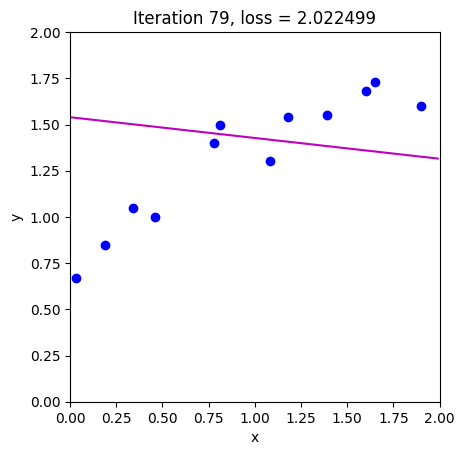

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.022499, b34.138432, c131.569215, d300.266140
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.022499, b5.470605, c16.175916, d34.138432
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.022499, b2.365511, c3.514880, d5.470605
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.022499, b2.047241, c2.161579, d2.365511
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.022499, b2.020791, c2.029039, d2.047241
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.022499, b2.020255, c2.022435, d2.029039
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.022499, b2.020511, c2.020490, d2.022435
Iter 8, a=0.000, b=0.000, c=0.000, d=0.001
a 2.020511, b2.020278, c2.020919, d2.022435
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.020511, b2.020259, c2.020395, d2.020919
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.020511, b2.020300, c2.020261, d2.020395
alfa 0.000288
before slope phi0:1.539611, phi1: -0.112443
after slope phi0:1.538849, phi1: -0.111644


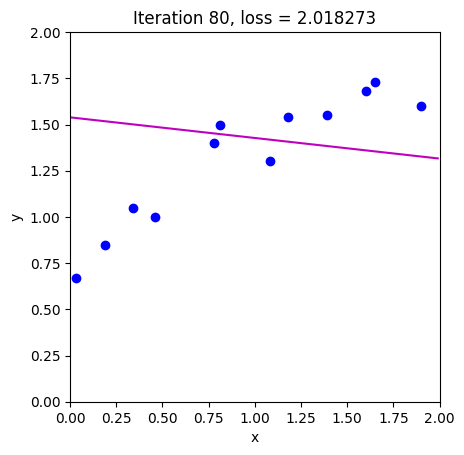

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.018273, b34.139974, c131.576525, d300.279394
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.018273, b5.468301, c16.175535, d34.139974
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.018273, b2.361926, c3.511935, d5.468301
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.018273, b2.043229, c2.157780, d2.361926
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.018273, b2.016636, c2.024955, d2.043229
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.018273, b2.016076, c2.018303, d2.024955
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.018273, b2.016316, c2.016326, d2.018303
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 2.018273, b2.016750, c2.016101, d2.016326
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.016750, b2.016220, c2.016079, d2.016326
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.016220, b2.016083, c2.016118, d2.016326
alfa 0.000255
before slope phi0:1.538849, phi1: -0.111644
after slope phi0:1.538175, phi1: -0.110940


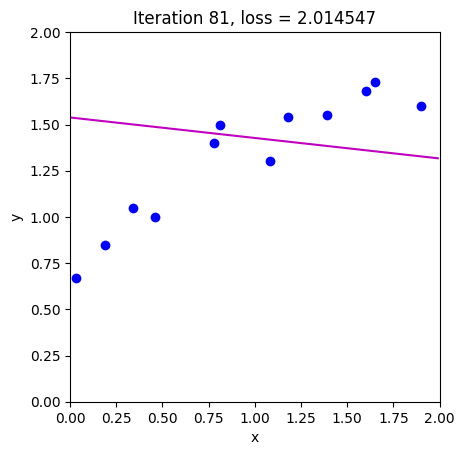

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.014547, b34.141275, c131.582852, d300.290899
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.014547, b5.466250, c16.175160, d34.141275
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.014547, b2.358758, c3.509326, d5.466250
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.014547, b2.039689, c2.154426, d2.358758
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.014547, b2.012972, c2.021353, d2.039689
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.014547, b2.012391, c2.014660, d2.021353
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.014547, b2.012618, c2.012656, d2.014660
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 2.014547, b2.013042, c2.012412, d2.012656
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.013042, b2.012525, c2.012396, d2.012656
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.012525, b2.012396, c2.012439, d2.012656
alfa 0.000255
before slope phi0:1.538175, phi1: -0.110940
after slope phi0:1.537501, phi1: -0.110237


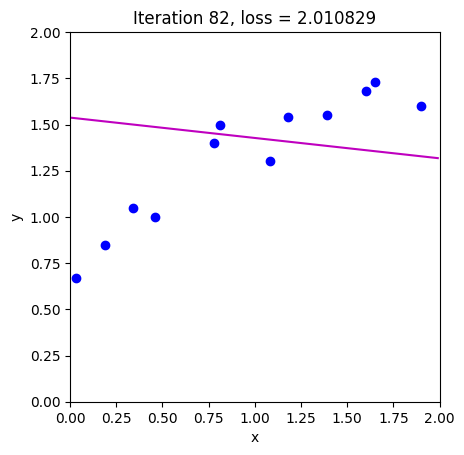

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.010829, b34.142521, c131.589062, d300.302223
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.010829, b5.464187, c16.174751, d34.142521
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.010829, b2.355592, c3.506712, d5.464187
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.010829, b2.036155, c2.151076, d2.355592
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.010829, b2.009316, c2.017758, d2.036155
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.010829, b2.008714, c2.011024, d2.017758
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.010829, b2.008927, c2.008992, d2.011024
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 2.010829, b2.009343, c2.008731, d2.008992
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.009343, b2.008838, c2.008721, d2.008992
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.008838, b2.008717, c2.008768, d2.008992
alfa 0.000255
before slope phi0:1.537501, phi1: -0.110237
after slope phi0:1.536827, phi1: -0.109536


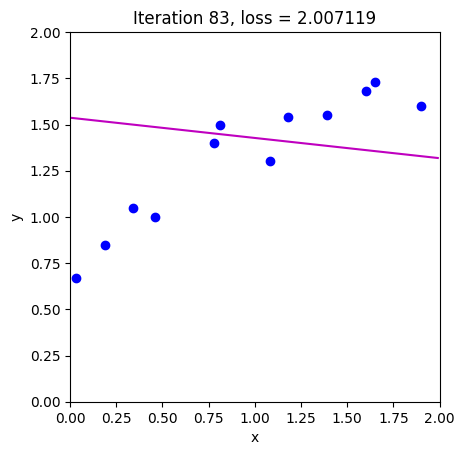

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.007119, b34.143714, c131.595158, d300.313370
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.007119, b5.462112, c16.174310, d34.143714
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.007119, b2.352427, c3.504092, d5.462112
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.007119, b2.032627, c2.147730, d2.352427
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.007119, b2.005667, c2.014169, d2.032627
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.007119, b2.005045, c2.007395, d2.014169
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.007119, b2.005245, c2.005337, d2.007395
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 2.007119, b2.005651, c2.005057, d2.005337
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.005651, b2.005158, c2.005053, d2.005337
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.005158, b2.005045, c2.005104, d2.005337
alfa 0.000255
before slope phi0:1.536827, phi1: -0.109536
after slope phi0:1.536153, phi1: -0.108836


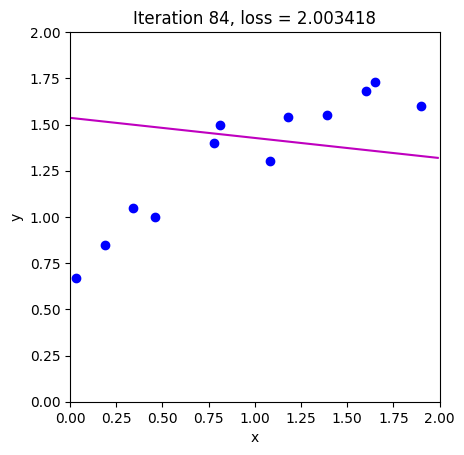

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 2.003418, b34.144854, c131.601140, d300.324341
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 2.003418, b5.460025, c16.173837, d34.144854
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 2.003418, b2.349264, c3.501466, d5.460025
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 2.003418, b2.029105, c2.144387, d2.349264
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 2.003418, b2.002025, c2.010588, d2.029105
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 2.003418, b2.001383, c2.003773, d2.010588
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 2.003418, b2.001570, c2.001689, d2.003773
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 2.003418, b2.001968, c2.001391, d2.001689
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 2.001968, b2.001486, c2.001393, d2.001689
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 2.001486, b2.001381, c2.001448, d2.001689
alfa 0.000255
before slope phi0:1.536153, phi1: -0.108836
after slope phi0:1.535479, phi1: -0.108138


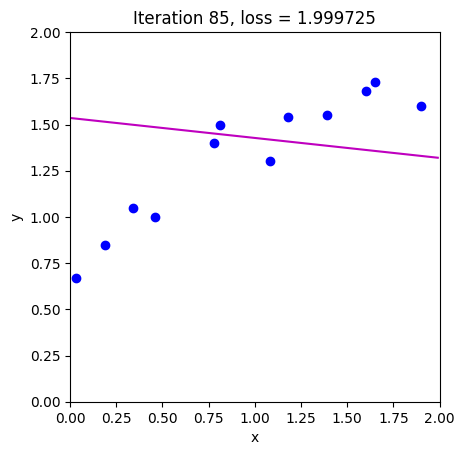

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.999725, b34.145943, c131.607011, d300.335138
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.999725, b5.457925, c16.173331, d34.145943
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.999725, b2.346102, c3.498836, d5.457925
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.999725, b2.025589, c2.141048, d2.346102
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.999725, b1.998391, c2.007013, d2.025589
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.999725, b1.997730, c2.000159, d2.007013
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.999725, b1.997903, c1.998048, d2.000159
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.999725, b1.998292, c1.997733, d1.998048
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.998292, b1.997822, c1.997741, d1.998048
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.997822, b1.997725, c1.997800, d1.998048
alfa 0.000255
before slope phi0:1.535479, phi1: -0.108138
after slope phi0:1.534806, phi1: -0.107441


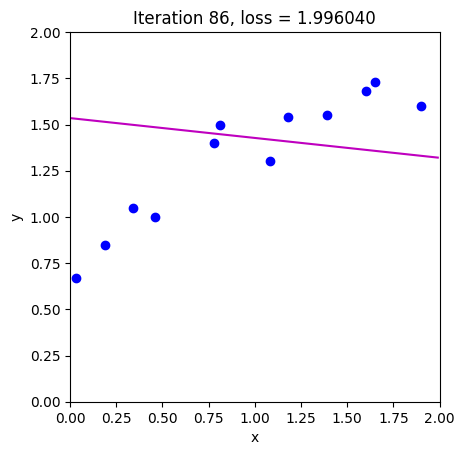

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.996040, b34.146981, c131.612771, d300.345765
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.996040, b5.455815, c16.172795, d34.146981
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.996040, b2.342942, c3.496200, d5.455815
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.996040, b2.022079, c2.137713, d2.342942
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.996040, b1.994764, c2.003444, d2.022079
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.996040, b1.994083, c1.996552, d2.003444
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.996040, b1.994244, c1.994415, d1.996552
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.996040, b1.994624, c1.994082, d1.994415
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.994624, b1.994166, c1.994096, d1.994415
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.994166, b1.994076, c1.994159, d1.994415
alfa 0.000255
before slope phi0:1.534806, phi1: -0.107441
after slope phi0:1.534132, phi1: -0.106745


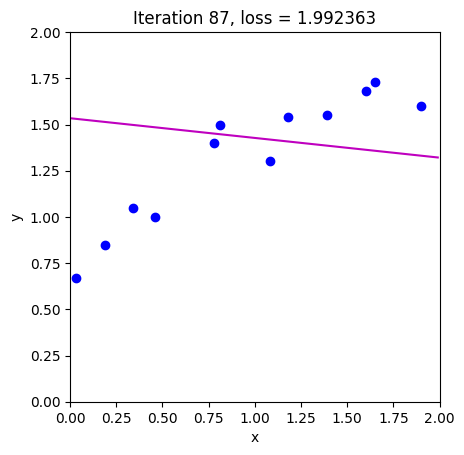

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.992363, b34.147968, c131.618423, d300.356222
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.992363, b5.453692, c16.172228, d34.147968
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.992363, b2.339783, c3.493560, d5.453692
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.992363, b2.018574, c2.134381, d2.339783
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.992363, b1.991145, c1.999882, d2.018574
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.992363, b1.990445, c1.992951, d1.999882
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.992363, b1.990593, c1.990789, d1.992951
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.992363, b1.990964, c1.990439, d1.990789
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.990964, b1.990517, c1.990459, d1.990789
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.990517, b1.990435, c1.990526, d1.990789
alfa 0.000255
before slope phi0:1.534132, phi1: -0.106745
after slope phi0:1.533458, phi1: -0.106051


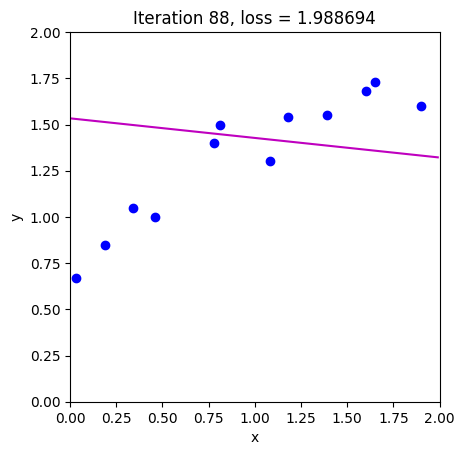

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.988694, b34.148906, c131.623967, d300.366513
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.988694, b5.451559, c16.171630, d34.148906
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.988694, b2.336626, c3.490915, d5.451559
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.988694, b2.015076, c2.131054, d2.336626
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.988694, b1.987533, c1.996327, d2.015076
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.988694, b1.986814, c1.989358, d1.996327
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.988694, b1.986949, c1.987170, d1.989358
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.988694, b1.987312, c1.986804, d1.987170
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.987312, b1.986876, c1.986829, d1.987170
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.986876, b1.986802, c1.986900, d1.987170
alfa 0.000255
before slope phi0:1.533458, phi1: -0.106051
after slope phi0:1.532785, phi1: -0.105359


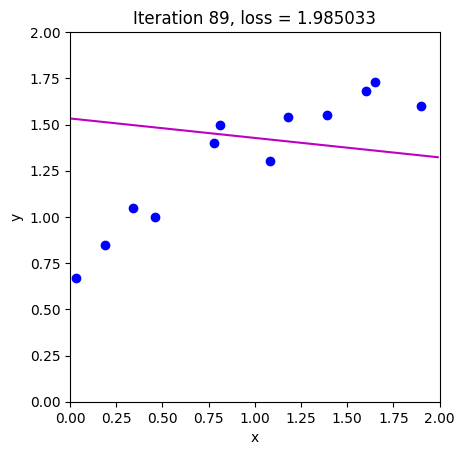

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.985033, b34.149795, c131.629406, d300.376640
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.985033, b5.449415, c16.171002, d34.149795
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.985033, b2.333471, c3.488265, d5.449415
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.985033, b2.011584, c2.127730, d2.333471
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.985033, b1.983928, c1.992778, d2.011584
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.985033, b1.983190, c1.985772, d1.992778
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.985033, b1.983313, c1.983559, d1.985772
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.985033, b1.983668, c1.983177, d1.983559
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.983668, b1.983243, c1.983207, d1.983559
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.983243, b1.983176, c1.983281, d1.983559
alfa 0.000255
before slope phi0:1.532785, phi1: -0.105359
after slope phi0:1.532111, phi1: -0.104667


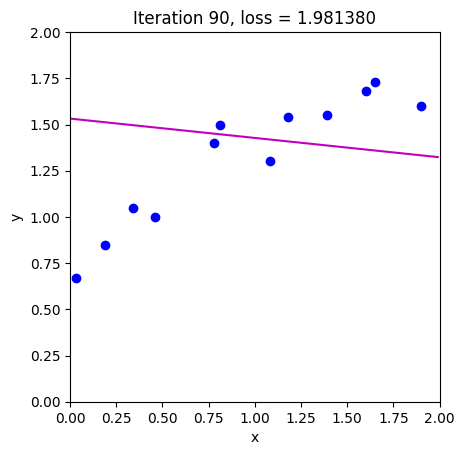

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.981380, b34.150636, c131.634741, d300.386604
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.981380, b5.447260, c16.170345, d34.150636
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.981380, b2.330317, c3.485610, d5.447260
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.981380, b2.008097, c2.124410, d2.330317
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.981380, b1.980331, c1.989236, d2.008097
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.981380, b1.979574, c1.982193, d1.989236
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.981380, b1.979685, c1.979956, d1.982193
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.981380, b1.980031, c1.979557, d1.979956
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.980031, b1.979618, c1.979592, d1.979956
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.979618, b1.979558, c1.979670, d1.979956
alfa 0.000255
before slope phi0:1.532111, phi1: -0.104667
after slope phi0:1.531438, phi1: -0.103977


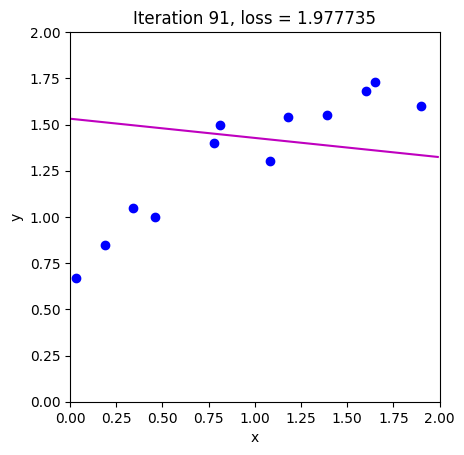

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.977735, b34.151429, c131.639972, d300.396408
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.977735, b5.445094, c16.169659, d34.151429
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.977735, b2.327165, c3.482952, d5.445094
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.977735, b2.004617, c2.121093, d2.327165
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.977735, b1.976741, c1.985701, d2.004617
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.977735, b1.975966, c1.978621, d1.985701
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.977735, b1.976064, c1.976359, d1.978621
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.977735, b1.976403, c1.975944, d1.976359
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.976403, b1.976000, c1.975985, d1.976359
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.976000, b1.975947, c1.976067, d1.976359
alfa 0.000255
before slope phi0:1.531438, phi1: -0.103977
after slope phi0:1.530765, phi1: -0.103289


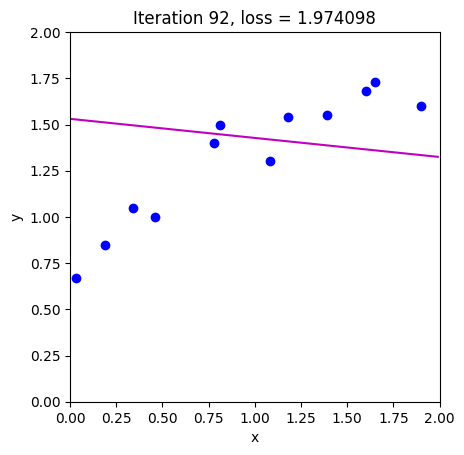

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.974098, b34.152175, c131.645102, d300.406054
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.974098, b5.442918, c16.168944, d34.152175
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.974098, b2.324015, c3.480289, d5.442918
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.974098, b2.001142, c2.117781, d2.324015
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.974098, b1.973158, c1.982172, d2.001142
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.974098, b1.972365, c1.975056, d1.982172
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.974098, b1.972451, c1.972770, d1.975056
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.974098, b1.972781, c1.972339, d1.972770
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.972781, b1.972389, c1.972386, d1.972770
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.972389, b1.972344, c1.972471, d1.972770
alfa 0.000255
before slope phi0:1.530765, phi1: -0.103289
after slope phi0:1.530092, phi1: -0.102602


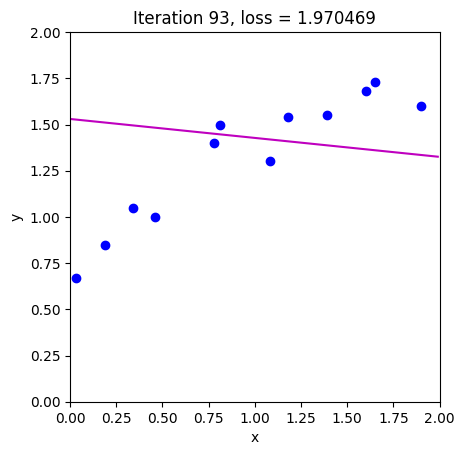

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.970469, b34.152875, c131.650131, d300.415544
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.970469, b5.440732, c16.168201, d34.152875
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.970469, b2.320867, c3.477622, d5.440732
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.970469, b1.997673, c2.114473, d2.320867
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.970469, b1.969582, c1.978650, d1.997673
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.970469, b1.968771, c1.971498, d1.978650
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.970469, b1.968846, c1.969189, d1.971498
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.970469, b1.969168, c1.968742, d1.969189
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.969168, b1.968787, c1.968793, d1.969189
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.969168, b1.968871, c1.968746, d1.968793
alfa 0.000228
before slope phi0:1.530092, phi1: -0.102602
after slope phi0:1.529490, phi1: -0.101988


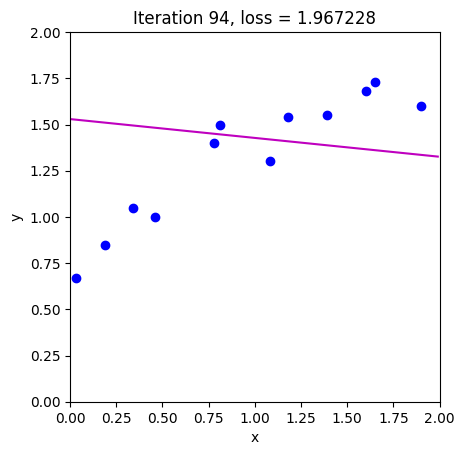

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.967228, b34.153461, c131.654543, d300.423897
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.967228, b5.438767, c16.167511, d34.153461
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.967228, b2.318052, c3.475231, d5.438767
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.967228, b1.994574, c2.111516, d2.318052
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.967228, b1.966389, c1.975504, d1.994574
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.967228, b1.965563, c1.968321, d1.975504
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.967228, b1.965626, c1.965990, d1.968321
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.967228, b1.965942, c1.965529, d1.965990
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.965942, b1.965570, c1.965586, d1.965990
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.965942, b1.965651, c1.965532, d1.965586
alfa 0.000228
before slope phi0:1.529490, phi1: -0.101988
after slope phi0:1.528888, phi1: -0.101375


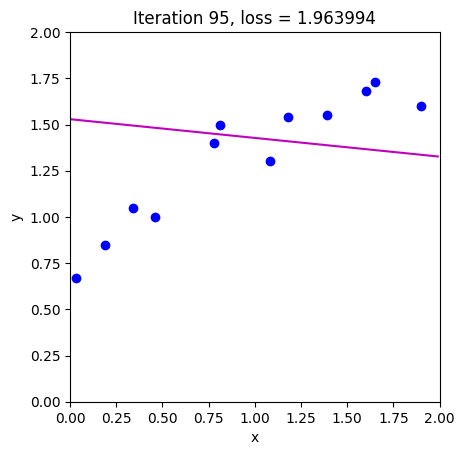

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.963994, b34.154010, c131.658876, d300.432129
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.963994, b5.436794, c16.166800, d34.154010
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.963994, b2.315238, c3.472838, d5.436794
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.963994, b1.991481, c2.108562, d2.315238
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.963994, b1.963202, c1.972364, d1.991481
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.963994, b1.962360, c1.965149, d1.972364
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.963994, b1.962413, c1.962798, d1.965149
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.963994, b1.962722, c1.962323, d1.962798
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.962722, b1.962359, c1.962384, d1.962798
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.962722, b1.962437, c1.962324, d1.962384
alfa 0.000228
before slope phi0:1.528888, phi1: -0.101375
after slope phi0:1.528286, phi1: -0.100764


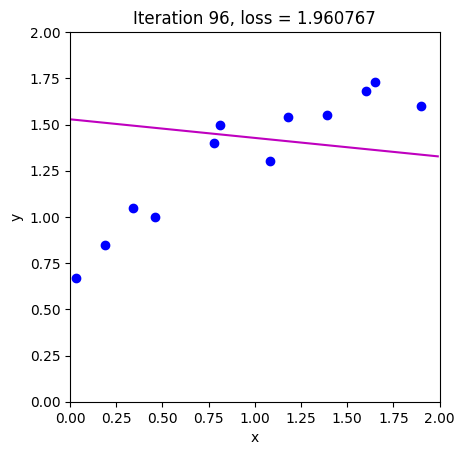

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.960767, b34.154525, c131.663132, d300.440240
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.960767, b5.434814, c16.166067, d34.154525
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.960767, b2.312426, c3.470442, d5.434814
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.960767, b1.988391, c2.105611, d2.312426
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.960767, b1.960020, c1.969228, d1.988391
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.960767, b1.959163, c1.961983, d1.969228
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.960767, b1.959206, c1.959611, d1.961983
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.960767, b1.959508, c1.959122, d1.959611
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.959508, b1.959154, c1.959188, d1.959611
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.959508, b1.959229, c1.959122, d1.959188
alfa 0.000228
before slope phi0:1.528286, phi1: -0.100764
after slope phi0:1.527684, phi1: -0.100153


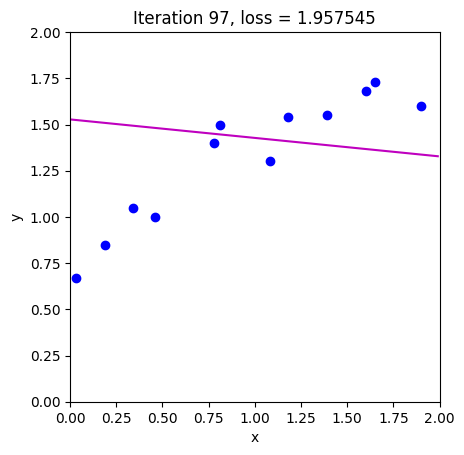

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.957545, b34.155004, c131.667312, d300.448233
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.957545, b5.432826, c16.165312, d34.155004
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.957545, b2.309616, c3.468043, d5.432826
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.957545, b1.985307, c2.102664, d2.309616
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.957545, b1.956844, c1.966098, d1.985307
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.957545, b1.955972, c1.958823, d1.966098
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.957545, b1.956005, c1.956430, d1.958823
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.957545, b1.956300, c1.955928, d1.956430
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.956300, b1.955955, c1.955998, d1.956430
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.956300, b1.956027, c1.955926, d1.955998
alfa 0.000228
before slope phi0:1.527684, phi1: -0.100153
after slope phi0:1.527082, phi1: -0.099544


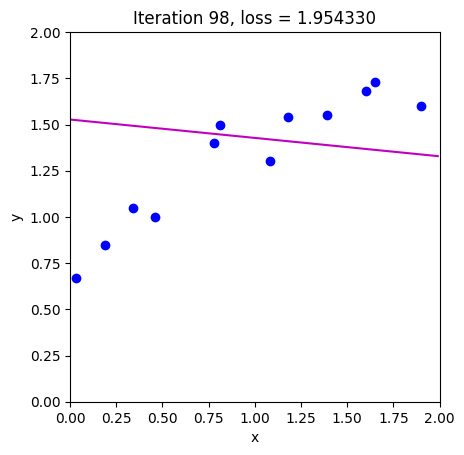

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.954330, b34.155449, c131.671417, d300.456109
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.954330, b5.430831, c16.164537, d34.155449
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.954330, b2.306807, c3.465641, d5.430831
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.954330, b1.982227, c2.099720, d2.306807
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.954330, b1.953674, c1.962973, d1.982227
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.954330, b1.952787, c1.955668, d1.962973
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.954330, b1.952809, c1.953255, d1.955668
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.954330, b1.953098, c1.952740, d1.953255
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.953098, b1.952762, c1.952814, d1.953255
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.953098, b1.952831, c1.952736, d1.952814
alfa 0.000228
before slope phi0:1.527082, phi1: -0.099544
after slope phi0:1.526480, phi1: -0.098935


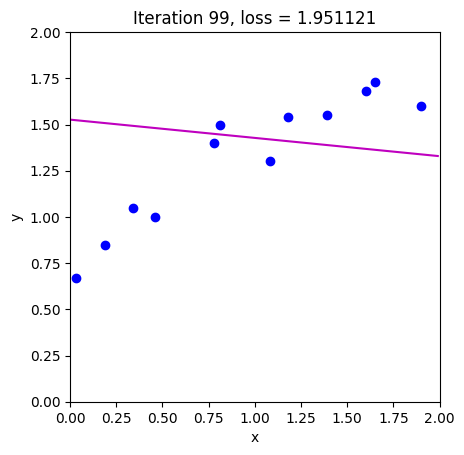

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.951121, b34.155859, c131.675447, d300.463868
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.951121, b5.428828, c16.163741, d34.155859
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.951121, b2.304000, c3.463236, d5.428828
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.951121, b1.979152, c2.096779, d2.304000
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.951121, b1.950510, c1.959853, d1.979152
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.951121, b1.949607, c1.952518, d1.959853
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.951121, b1.949620, c1.950086, d1.952518
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.951121, b1.949902, c1.949557, d1.950086
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.949902, b1.949575, c1.949636, d1.950086
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.949902, b1.949641, c1.949552, d1.949636
alfa 0.000228
before slope phi0:1.526480, phi1: -0.098935
after slope phi0:1.525879, phi1: -0.098328


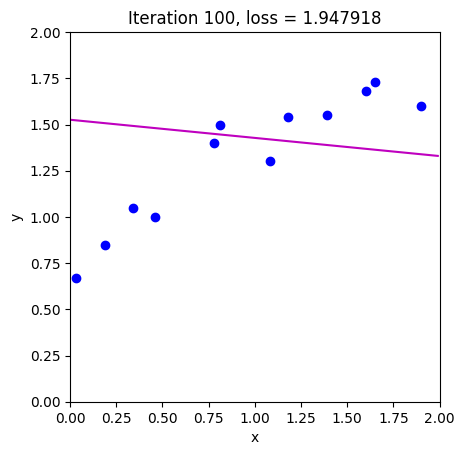

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.947918, b34.156236, c131.679403, d300.471513
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.947918, b5.426818, c16.162924, d34.156236
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.947918, b2.301195, c3.460829, d5.426818
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.947918, b1.976082, c2.093841, d2.301195
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.947918, b1.947351, c1.956739, d1.976082
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.947918, b1.946434, c1.949374, d1.956739
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.947918, b1.946437, c1.946922, d1.949374
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.947918, b1.946712, c1.946380, d1.946922
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.946712, b1.946394, c1.946464, d1.946922
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.946712, b1.946457, c1.946374, d1.946464
alfa 0.000228
before slope phi0:1.525879, phi1: -0.098328
after slope phi0:1.525278, phi1: -0.097722


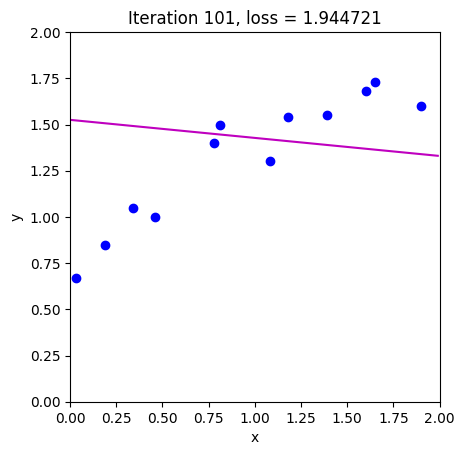

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.944721, b34.156580, c131.683287, d300.479045
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.944721, b5.424802, c16.162088, d34.156580
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.944721, b2.298392, c3.458419, d5.424802
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.944721, b1.973016, c2.090906, d2.298392
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.944721, b1.944198, c1.953630, d1.973016
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.944721, b1.943266, c1.946236, d1.953630
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.944721, b1.943260, c1.943764, d1.946236
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.944721, b1.943528, c1.943209, d1.943764
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.943528, b1.943219, c1.943297, d1.943764
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.943528, b1.943279, c1.943202, d1.943297
alfa 0.000228
before slope phi0:1.525278, phi1: -0.097722
after slope phi0:1.524676, phi1: -0.097116


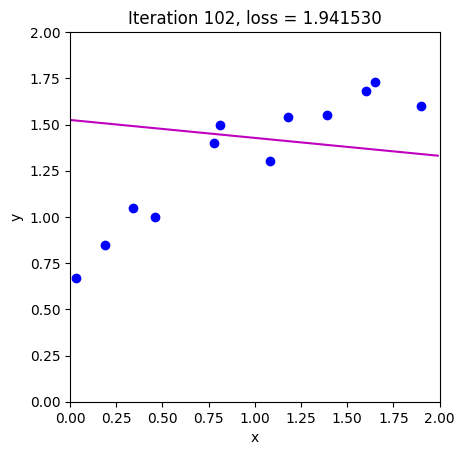

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.941530, b34.156890, c131.687100, d300.486465
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.941530, b5.422778, c16.161232, d34.156890
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.941530, b2.295590, c3.456006, d5.422778
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.941530, b1.969955, c2.087975, d2.295590
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.941530, b1.941050, c1.950525, d1.969955
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.941530, b1.940104, c1.943103, d1.950525
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.941530, b1.940088, c1.940612, d1.943103
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.941530, b1.940350, c1.940044, d1.940612
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.940350, b1.940049, c1.940136, d1.940612
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.940350, b1.940106, c1.940035, d1.940136
alfa 0.000228
before slope phi0:1.524676, phi1: -0.097116
after slope phi0:1.524075, phi1: -0.096512


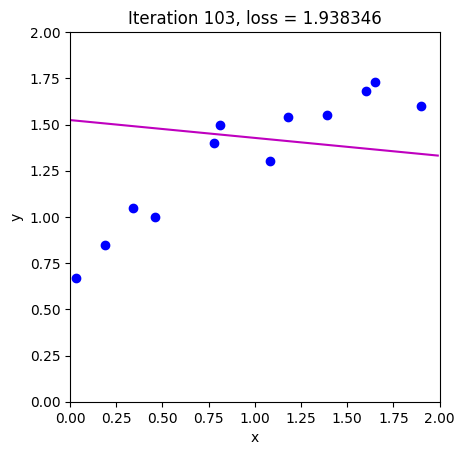

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.938346, b34.157169, c131.690841, d300.493774
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.938346, b5.420748, c16.160356, d34.157169
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.938346, b2.292791, c3.453591, d5.420748
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.938346, b1.966899, c2.085047, d2.292791
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.938346, b1.937909, c1.947426, d1.966899
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.938346, b1.936948, c1.939975, d1.947426
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.938346, b1.936923, c1.937466, d1.939975
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.938346, b1.937179, c1.936885, d1.937466
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.937179, b1.936886, c1.936982, d1.937466
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.937179, b1.936940, c1.936875, d1.936982
alfa 0.000228
before slope phi0:1.524075, phi1: -0.096512
after slope phi0:1.523475, phi1: -0.095909


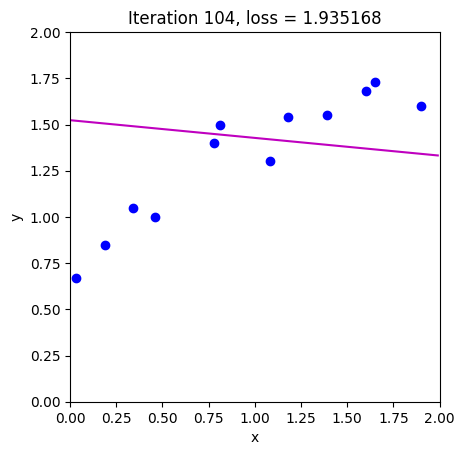

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.935168, b34.157415, c131.694513, d300.500974
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.935168, b5.418711, c16.159461, d34.157415
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.935168, b2.289993, c3.451174, d5.418711
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.935168, b1.963848, c2.082123, d2.289993
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.935168, b1.934773, c1.944333, d1.963848
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.935168, b1.933798, c1.936853, d1.944333
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.935168, b1.933763, c1.934325, d1.936853
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.935168, b1.934013, c1.933732, d1.934325
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.934013, b1.933728, c1.933832, d1.934325
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.934013, b1.933780, c1.933720, d1.933832
alfa 0.000228
before slope phi0:1.523475, phi1: -0.095909
after slope phi0:1.522874, phi1: -0.095306


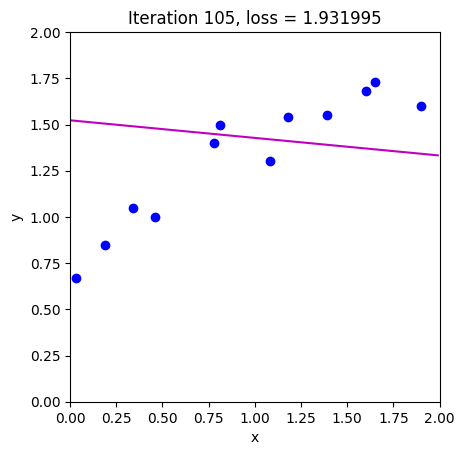

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.931995, b34.157630, c131.698115, d300.508066
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.931995, b5.416668, c16.158547, d34.157630
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.931995, b2.287197, c3.448754, d5.416668
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.931995, b1.960801, c2.079201, d2.287197
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.931995, b1.931642, c1.941244, d1.960801
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.931995, b1.930654, c1.933737, d1.941244
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.931995, b1.930609, c1.931190, d1.933737
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.931995, b1.930853, c1.930584, d1.931190
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.930853, b1.930577, c1.930689, d1.931190
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.930853, b1.930626, c1.930571, d1.930689
alfa 0.000228
before slope phi0:1.522874, phi1: -0.095306
after slope phi0:1.522273, phi1: -0.094705


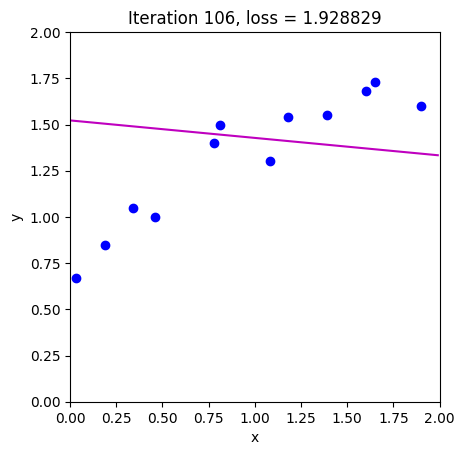

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.928829, b34.157814, c131.701649, d300.515052
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.928829, b5.414619, c16.157614, d34.157814
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.928829, b2.284403, c3.446333, d5.414619
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.928829, b1.957759, c2.076283, d2.284403
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.928829, b1.928517, c1.938160, d1.957759
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.928829, b1.927515, c1.930625, d1.938160
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.928829, b1.927461, c1.928060, d1.930625
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.928829, b1.927699, c1.927443, d1.928060
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.927699, b1.927431, c1.927551, d1.928060
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.927699, b1.927477, c1.927428, d1.927551
alfa 0.000228
before slope phi0:1.522273, phi1: -0.094705
after slope phi0:1.521673, phi1: -0.094105


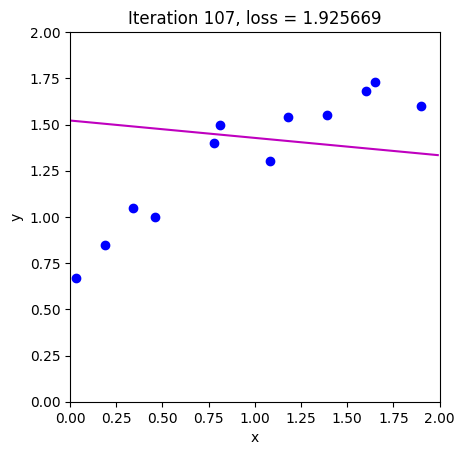

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.925669, b34.157967, c131.705115, d300.521932
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.925669, b5.412563, c16.156662, d34.157967
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.925669, b2.281611, c3.443909, d5.412563
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.925669, b1.954721, c2.073368, d2.281611
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.925669, b1.925398, c1.935082, d1.954721
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.925669, b1.924382, c1.927520, d1.935082
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.925669, b1.924319, c1.924936, d1.927520
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.925669, b1.924551, c1.924307, d1.924936
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.924551, b1.924291, c1.924419, d1.924936
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.924551, b1.924334, c1.924291, d1.924419
alfa 0.000228
before slope phi0:1.521673, phi1: -0.094105
after slope phi0:1.521072, phi1: -0.093505


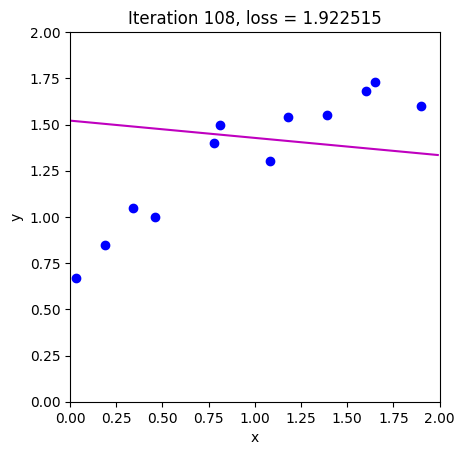

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.922515, b34.158090, c131.708515, d300.528707
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.922515, b5.410501, c16.155693, d34.158090
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.922515, b2.278821, c3.441483, d5.410501
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.922515, b1.951688, c2.070457, d2.278821
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.922515, b1.922284, c1.932009, d1.951688
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.922515, b1.921255, c1.924420, d1.932009
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.922515, b1.921183, c1.921818, d1.924420
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.922515, b1.921409, c1.921176, d1.921818
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.921409, b1.921157, c1.921293, d1.921818
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.921409, b1.921198, c1.921159, d1.921293
alfa 0.000228
before slope phi0:1.521072, phi1: -0.093505
after slope phi0:1.520472, phi1: -0.092907


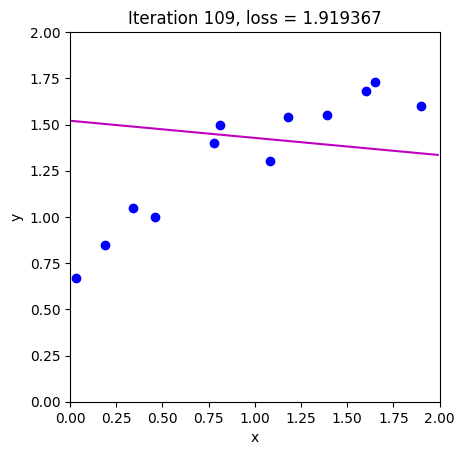

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.919367, b34.158183, c131.711848, d300.535380
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.919367, b5.408433, c16.154705, d34.158183
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.919367, b2.276033, c3.439055, d5.408433
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.919367, b1.948660, c2.067549, d2.276033
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.919367, b1.919176, c1.928941, d1.948660
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.919367, b1.918134, c1.921325, d1.928941
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.919367, b1.918053, c1.918706, d1.921325
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.919367, b1.918272, c1.918052, d1.918706
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.918272, b1.918028, c1.918173, d1.918706
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.918272, b1.918067, c1.918033, d1.918173
alfa 0.000228
before slope phi0:1.520472, phi1: -0.092907
after slope phi0:1.519872, phi1: -0.092310


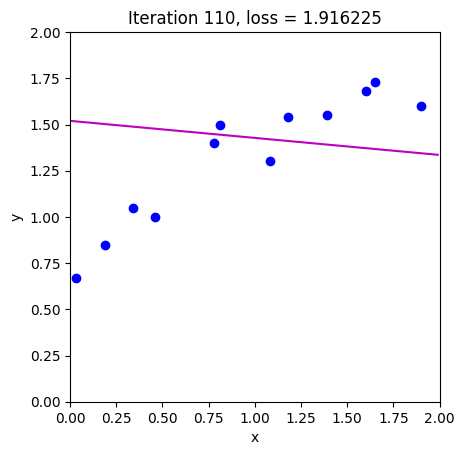

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.916225, b34.158246, c131.715117, d300.541952
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.916225, b5.406360, c16.153700, d34.158246
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.916225, b2.273247, c3.436625, d5.406360
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.916225, b1.945637, c2.064644, d2.273247
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.916225, b1.916074, c1.925878, d1.945637
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.916225, b1.915018, c1.918236, d1.925878
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.916225, b1.914928, c1.915599, d1.918236
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.916225, b1.915142, c1.914933, d1.915599
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.915142, b1.914906, c1.915058, d1.915599
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.915142, b1.914941, c1.914913, d1.915058
alfa 0.000228
before slope phi0:1.519872, phi1: -0.092310
after slope phi0:1.519273, phi1: -0.091713


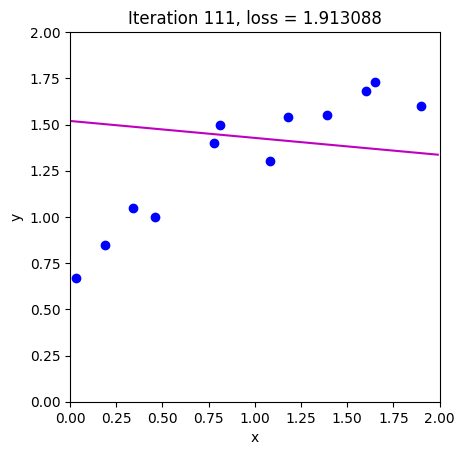

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.913088, b34.158280, c131.718322, d300.548422
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.913088, b5.404280, c16.152677, d34.158280
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.913088, b2.270463, c3.434193, d5.404280
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.913088, b1.942618, c2.061743, d2.270463
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.913088, b1.912977, c1.922820, d1.942618
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.913088, b1.911908, c1.915152, d1.922820
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.913088, b1.911810, c1.912497, d1.915152
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.913088, b1.912017, c1.911820, d1.912497
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.912017, b1.911789, c1.911949, d1.912497
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.912017, b1.911822, c1.911799, d1.911949
alfa 0.000228
before slope phi0:1.519273, phi1: -0.091713
after slope phi0:1.518673, phi1: -0.091118


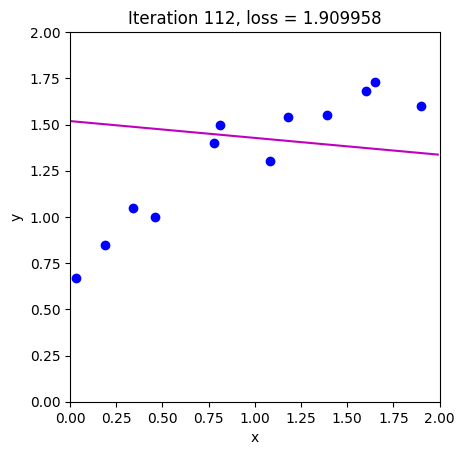

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.909958, b34.158286, c131.721463, d300.554794
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.909958, b5.402195, c16.151638, d34.158286
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.909958, b2.267681, c3.431760, d5.402195
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.909958, b1.939604, c2.058845, d2.267681
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.909958, b1.909885, c1.919767, d1.939604
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.909958, b1.908803, c1.912073, d1.919767
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.909958, b1.908697, c1.909402, d1.912073
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.909958, b1.908899, c1.908713, d1.909402
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.908899, b1.908678, c1.908846, d1.909402
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.908899, b1.908708, c1.908691, d1.908846
alfa 0.000228
before slope phi0:1.518673, phi1: -0.091118
after slope phi0:1.518074, phi1: -0.090523


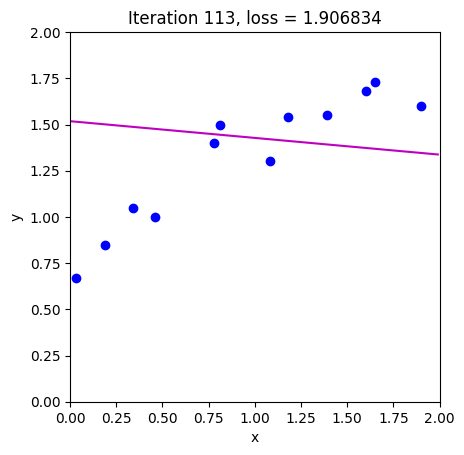

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.906834, b34.158263, c131.724541, d300.561067
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.906834, b5.400105, c16.150581, d34.158263
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.906834, b2.264901, c3.429325, d5.400105
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.906834, b1.936595, c2.055950, d2.264901
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.906834, b1.906799, c1.916719, d1.936595
Iter 6, a=0.000, b=0.000, c=0.001, d=0.001
a 1.906834, b1.905705, c1.909000, d1.916719
Iter 7, a=0.000, b=0.000, c=0.000, d=0.001
a 1.906834, b1.905589, c1.906311, d1.909000
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.906834, b1.905786, c1.905612, d1.906311
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.905786, b1.905573, c1.905748, d1.906311
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.905786, b1.905601, c1.905588, d1.905748
alfa 0.000228
before slope phi0:1.518074, phi1: -0.090523
after slope phi0:1.517474, phi1: -0.089930


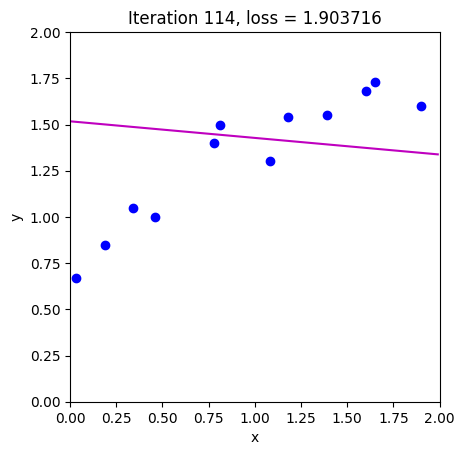

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.903716, b34.158212, c131.727557, d300.567244
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.903716, b5.398009, c16.149507, d34.158212
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.903716, b2.262124, c3.426888, d5.398009
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.903716, b1.933590, c2.053059, d2.262124
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.903716, b1.903719, c1.913677, d1.933590
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.903716, b1.902611, c1.902612, d1.903719
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.903716, b1.902856, c1.902488, d1.902612
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.902856, b1.902556, c1.902475, d1.902612
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.902556, b1.902477, c1.902496, d1.902612
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.902556, b1.902493, c1.902473, d1.902496
alfa 0.000205
before slope phi0:1.517474, phi1: -0.089930
after slope phi0:1.516937, phi1: -0.089398


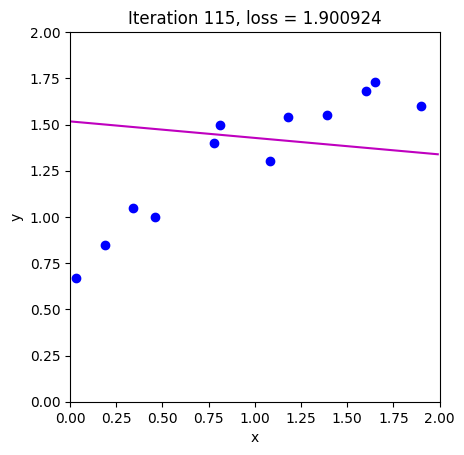

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.900924, b34.158141, c131.730208, d300.572698
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.900924, b5.396124, c16.148530, d34.158141
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.900924, b2.259634, c3.424701, d5.396124
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.900924, b1.930899, c2.050469, d2.259634
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.900924, b1.900960, c1.910952, d1.930899
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.900924, b1.899830, c1.899842, d1.900960
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.900924, b1.900071, c1.899711, d1.899842
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.900071, b1.899776, c1.899700, d1.899842
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.899776, b1.899701, c1.899723, d1.899842
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.899776, b1.899715, c1.899698, d1.899723
alfa 0.000205
before slope phi0:1.516937, phi1: -0.089398
after slope phi0:1.516400, phi1: -0.088867


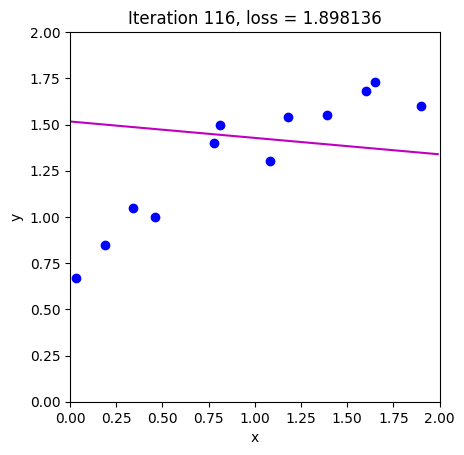

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.898136, b34.158048, c131.732810, d300.578077
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.898136, b5.394235, c16.147539, d34.158048
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.898136, b2.257146, c3.422512, d5.394235
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.898136, b1.928211, c2.047881, d2.257146
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.898136, b1.898206, c1.908231, d1.928211
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.898136, b1.897053, c1.897077, d1.898206
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.898136, b1.897291, c1.896938, d1.897077
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.897291, b1.897001, c1.896930, d1.897077
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.897001, b1.896929, c1.896954, d1.897077
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.897001, b1.896943, c1.896927, d1.896954
alfa 0.000205
before slope phi0:1.516400, phi1: -0.088867
after slope phi0:1.515863, phi1: -0.088337


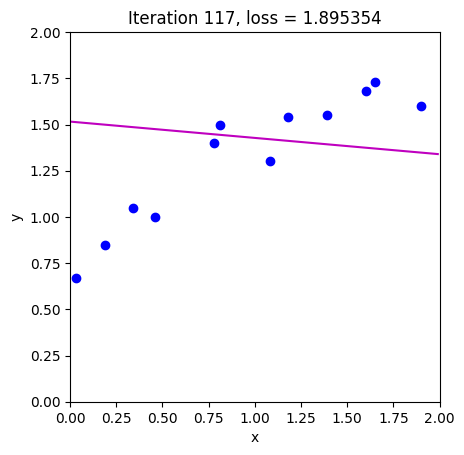

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.895354, b34.157934, c131.735363, d300.583380
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.895354, b5.392341, c16.146535, d34.157934
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.895354, b2.254660, c3.420323, d5.392341
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.895354, b1.925527, c2.045296, d2.254660
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.895354, b1.895456, c1.905514, d1.925527
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.895354, b1.894282, c1.894316, d1.895456
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.895354, b1.894516, c1.894170, d1.894316
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.894516, b1.894231, c1.894164, d1.894316
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.894231, b1.894162, c1.894191, d1.894316
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.894231, b1.894174, c1.894161, d1.894191
alfa 0.000205
before slope phi0:1.515863, phi1: -0.088337
after slope phi0:1.515326, phi1: -0.087808


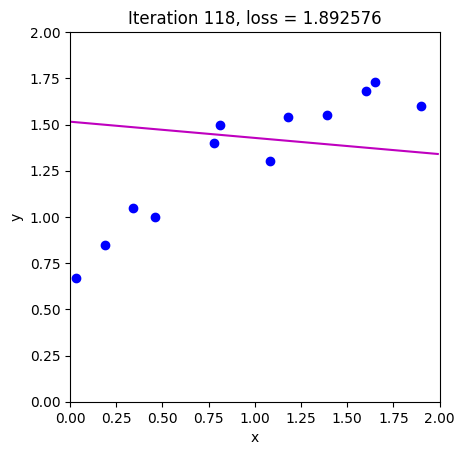

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.892576, b34.157798, c131.737870, d300.588608
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.892576, b5.390444, c16.145518, d34.157798
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.892576, b2.252176, c3.418132, d5.390444
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.892576, b1.922847, c2.042714, d2.252176
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.892576, b1.892711, c1.902802, d1.922847
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.892576, b1.891515, c1.891560, d1.892711
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.892576, b1.891745, c1.891407, d1.891560
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.891745, b1.891465, c1.891403, d1.891560
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.891465, b1.891400, c1.891431, d1.891560
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.891465, b1.891411, c1.891399, d1.891431
alfa 0.000205
before slope phi0:1.515326, phi1: -0.087808
after slope phi0:1.514789, phi1: -0.087279


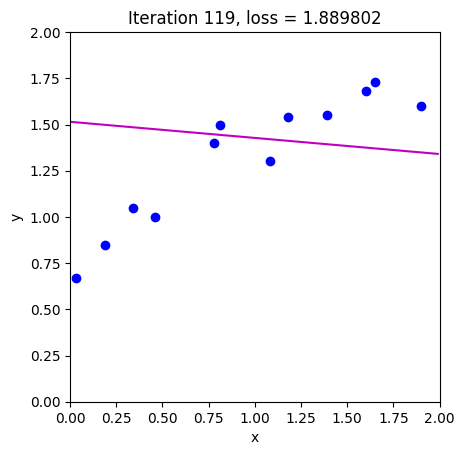

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.889802, b34.157641, c131.740329, d300.593763
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.889802, b5.388543, c16.144489, d34.157641
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.889802, b2.249693, c3.415940, d5.388543
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.889802, b1.920171, c2.040134, d2.249693
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.889802, b1.889970, c1.900093, d1.920171
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.889802, b1.888752, c1.888808, d1.889970
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.889802, b1.888979, c1.888648, d1.888808
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.888979, b1.888704, c1.888647, d1.888808
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.888704, b1.888642, c1.888676, d1.888808
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.888704, b1.888652, c1.888642, d1.888676
alfa 0.000205
before slope phi0:1.514789, phi1: -0.087279
after slope phi0:1.514253, phi1: -0.086752


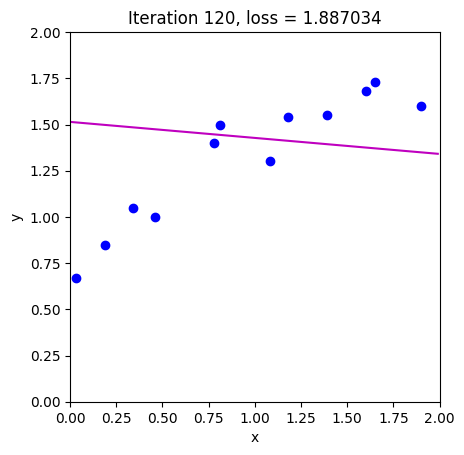

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.887034, b34.157463, c131.742742, d300.598844
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.887034, b5.386638, c16.143448, d34.157463
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.887034, b2.247213, c3.413747, d5.386638
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.887034, b1.917498, c2.037558, d2.247213
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.887034, b1.887234, c1.897389, d1.917498
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.887034, b1.885994, c1.886061, d1.887234
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.887034, b1.886218, c1.885894, d1.886061
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.886218, b1.885947, c1.885895, d1.886061
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.885947, b1.885888, c1.885926, d1.886061
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.885947, b1.885897, c1.885890, d1.885926
alfa 0.000205
before slope phi0:1.514253, phi1: -0.086752
after slope phi0:1.513716, phi1: -0.086224


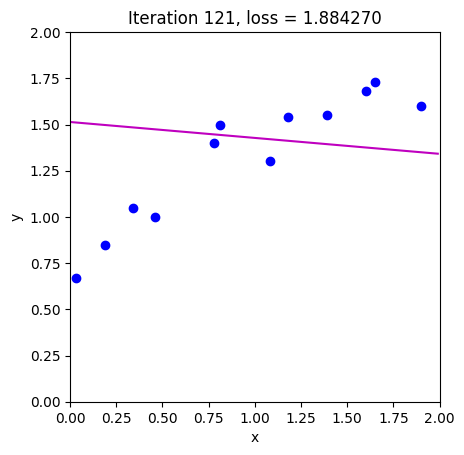

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.884270, b34.157264, c131.745108, d300.603854
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.884270, b5.384729, c16.142394, d34.157264
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.884270, b2.244734, c3.411553, d5.384729
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.884270, b1.914830, c2.034984, d2.244734
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.884270, b1.884502, c1.894688, d1.914830
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.884270, b1.883241, c1.883318, d1.884502
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.884270, b1.883461, c1.883144, d1.883318
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.883461, b1.883195, c1.883147, d1.883318
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.883195, b1.883139, c1.883180, d1.883318
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.883195, b1.883147, c1.883142, d1.883180
alfa 0.000205
before slope phi0:1.513716, phi1: -0.086224
after slope phi0:1.513180, phi1: -0.085698


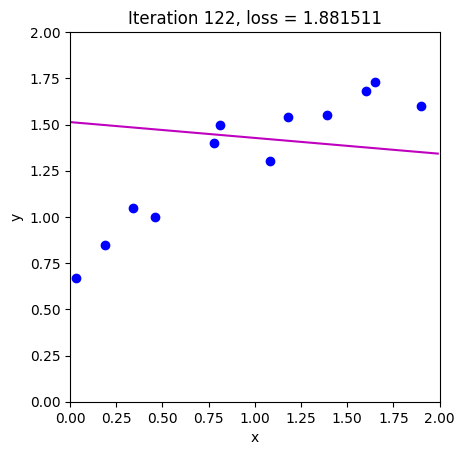

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.881511, b34.157045, c131.747429, d300.608792
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.881511, b5.382817, c16.141328, d34.157045
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.881511, b2.242257, c3.409359, d5.382817
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.881511, b1.912164, c2.032413, d2.242257
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.881511, b1.881774, c1.891992, d1.912164
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.881511, b1.880493, c1.880580, d1.881774
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.881511, b1.880709, c1.880399, d1.880580
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.880709, b1.880448, c1.880405, d1.880580
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.880448, b1.880395, c1.880439, d1.880580
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.880448, b1.880402, c1.880399, d1.880439
alfa 0.000205
before slope phi0:1.513180, phi1: -0.085698
after slope phi0:1.512644, phi1: -0.085172


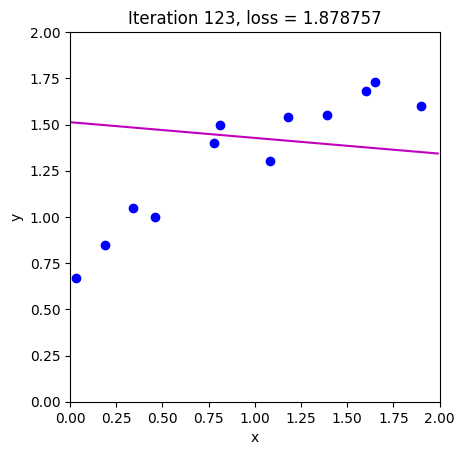

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.878757, b34.156806, c131.749705, d300.613660
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.878757, b5.380901, c16.140251, d34.156806
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.878757, b2.239782, c3.407163, d5.380901
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.878757, b1.909503, c2.029845, d2.239782
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.878757, b1.879050, c1.889299, d1.909503
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.878757, b1.877748, c1.877846, d1.879050
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.878757, b1.877962, c1.877658, d1.877846
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.877962, b1.877705, c1.877666, d1.877846
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.877705, b1.877655, c1.877702, d1.877846
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.877705, b1.877661, c1.877660, d1.877702
alfa 0.000205
before slope phi0:1.512644, phi1: -0.085172
after slope phi0:1.512108, phi1: -0.084648


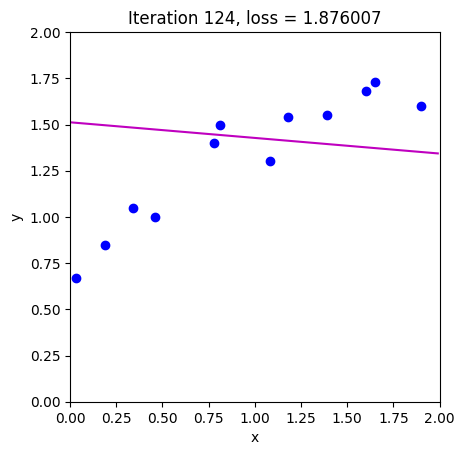

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.876007, b34.156547, c131.751937, d300.618457
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.876007, b5.378981, c16.139161, d34.156547
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.876007, b2.237309, c3.404967, d5.378981
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.876007, b1.906846, c2.027280, d2.237309
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.876007, b1.876331, c1.886611, d1.906846
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.876007, b1.875009, c1.875117, d1.876331
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.876007, b1.875219, c1.874922, d1.875117
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.875219, b1.874966, c1.874932, d1.875117
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.874966, b1.874919, c1.874970, d1.875117
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.874966, b1.874924, c1.874925, d1.874970
alfa 0.000178
before slope phi0:1.512108, phi1: -0.084648
after slope phi0:1.511643, phi1: -0.084192


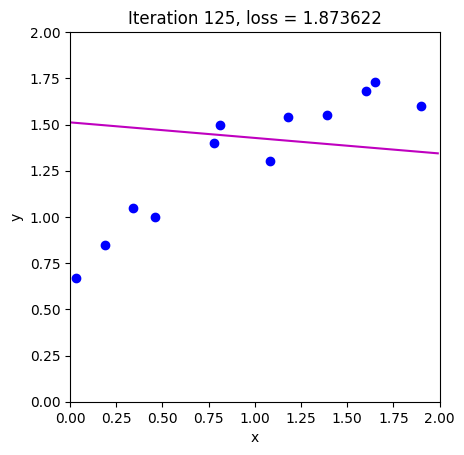

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.873622, b34.156305, c131.753837, d300.622565
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.873622, b5.377310, c16.138205, d34.156305
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.873622, b2.235162, c3.403058, d5.377310
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.873622, b1.904540, c2.025053, d2.235162
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.873622, b1.873973, c1.884279, d1.904540
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.873622, b1.872632, c1.872749, d1.873973
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.873622, b1.872839, c1.872549, d1.872749
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.872839, b1.872591, c1.872561, d1.872749
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.872591, b1.872547, c1.872599, d1.872749
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.872591, b1.872551, c1.872553, d1.872599
alfa 0.000178
before slope phi0:1.511643, phi1: -0.084192
after slope phi0:1.511177, phi1: -0.083737


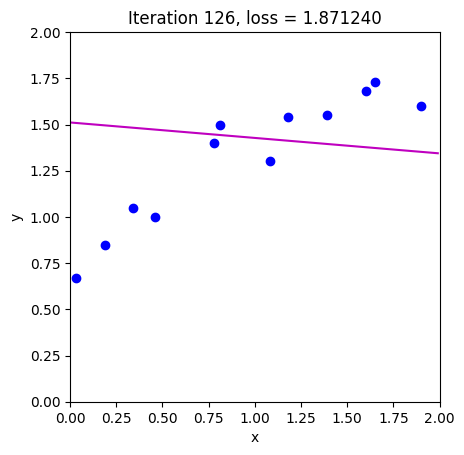

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.871240, b34.156048, c131.755705, d300.626622
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.871240, b5.375637, c16.137239, d34.156048
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.871240, b2.233016, c3.401148, d5.375637
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.871240, b1.902237, c2.022829, d2.233016
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.871240, b1.871617, c1.881949, d1.902237
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.871240, b1.870259, c1.870385, d1.871617
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.871240, b1.870463, c1.870178, d1.870385
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.870463, b1.870219, c1.870193, d1.870385
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.870219, b1.870177, c1.870233, d1.870385
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.870219, b1.870180, c1.870185, d1.870233
alfa 0.000178
before slope phi0:1.511177, phi1: -0.083737
after slope phi0:1.510712, phi1: -0.083283


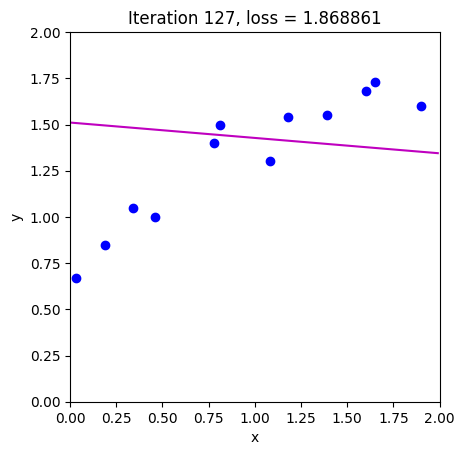

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.868861, b34.155776, c131.757540, d300.630627
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.868861, b5.373961, c16.136266, d34.155776
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.868861, b2.230872, c3.399238, d5.373961
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.868861, b1.899936, c2.020607, d2.230872
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.868861, b1.869265, c1.879623, d1.899936
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.868861, b1.867890, c1.868024, d1.869265
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.868861, b1.868091, c1.867812, d1.868024
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.868091, b1.867850, c1.867828, d1.868024
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.867850, b1.867811, c1.867869, d1.868024
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.867850, b1.867813, c1.867820, d1.867869
alfa 0.000178
before slope phi0:1.510712, phi1: -0.083283
after slope phi0:1.510247, phi1: -0.082829


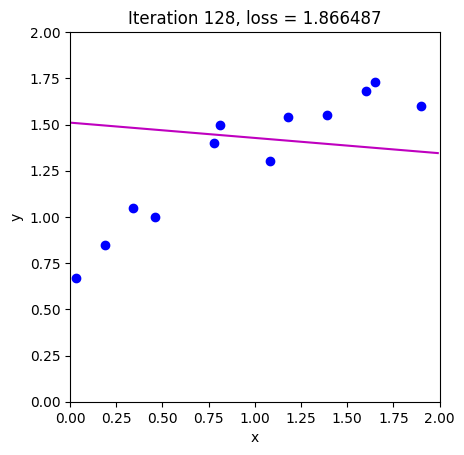

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.866487, b34.155490, c131.759342, d300.634582
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.866487, b5.372282, c16.135283, d34.155490
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.866487, b2.228729, c3.397328, d5.372282
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.866487, b1.897639, c2.018386, d2.228729
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.866487, b1.866916, c1.877300, d1.897639
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.866487, b1.865524, c1.865667, d1.866916
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.866487, b1.865722, c1.865448, d1.865667
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.865722, b1.865485, c1.865467, d1.865667
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.865485, b1.865448, c1.865509, d1.865667
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.865485, b1.865450, c1.865458, d1.865509
alfa 0.000178
before slope phi0:1.510247, phi1: -0.082829
after slope phi0:1.509782, phi1: -0.082376


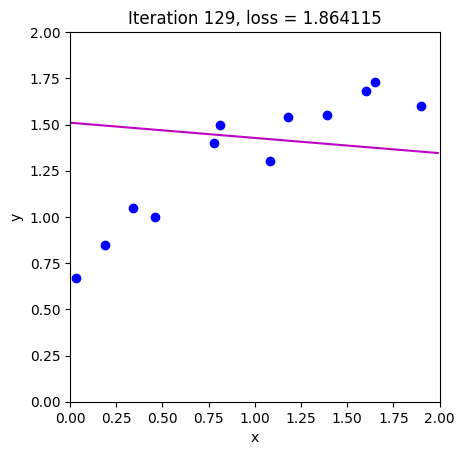

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.864115, b34.155190, c131.761113, d300.638487
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.864115, b5.370601, c16.134293, d34.155190
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.864115, b2.226588, c3.395417, d5.370601
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.864115, b1.895344, c2.016169, d2.226588
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.864115, b1.864570, c1.874980, d1.895344
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.864115, b1.863161, c1.863312, d1.864570
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.864115, b1.863356, c1.863088, d1.863312
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.863356, b1.863123, c1.863108, d1.863312
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.863123, b1.863089, c1.863152, d1.863312
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.863123, b1.863090, c1.863099, d1.863152
alfa 0.000178
before slope phi0:1.509782, phi1: -0.082376
after slope phi0:1.509318, phi1: -0.081923


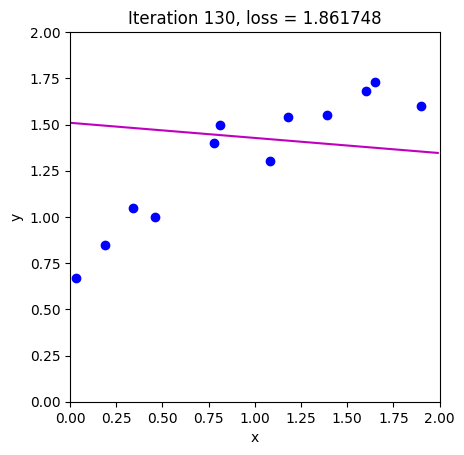

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.861748, b34.154875, c131.762852, d300.642341
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.861748, b5.368918, c16.133294, d34.154875
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.861748, b2.224448, c3.393505, d5.368918
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.861748, b1.893053, c2.013953, d2.224448
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.861748, b1.862228, c1.872663, d1.893053
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.861748, b1.860801, c1.860961, d1.862228
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.861748, b1.860994, c1.860732, d1.860961
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.860994, b1.860765, c1.860754, d1.860961
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.860765, b1.860733, c1.860799, d1.860961
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.860765, b1.860733, c1.860744, d1.860799
alfa 0.000178
before slope phi0:1.509318, phi1: -0.081923
after slope phi0:1.508853, phi1: -0.081471


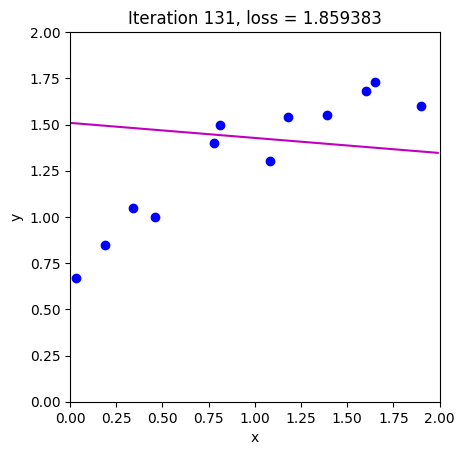

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.859383, b34.154547, c131.764560, d300.646147
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.859383, b5.367232, c16.132287, d34.154547
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.859383, b2.222310, c3.391593, d5.367232
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.859383, b1.890764, c2.011739, d2.222310
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.859383, b1.859888, c1.870349, d1.890764
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.859383, b1.858446, c1.858614, d1.859888
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.859383, b1.858635, c1.858379, d1.858614
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.858635, b1.858410, c1.858402, d1.858614
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.858410, b1.858381, c1.858449, d1.858614
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.858410, b1.858379, c1.858392, d1.858449
alfa 0.000178
before slope phi0:1.508853, phi1: -0.081471
after slope phi0:1.508389, phi1: -0.081019


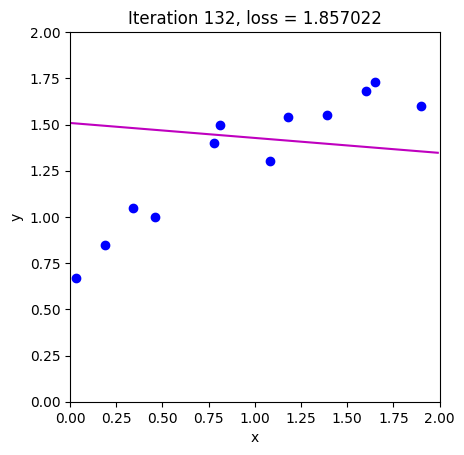

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.857022, b34.154205, c131.766237, d300.649904
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.857022, b5.365544, c16.131272, d34.154205
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.857022, b2.220174, c3.389681, d5.365544
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.857022, b1.888478, c2.009528, d2.220174
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.857022, b1.857552, c1.868038, d1.888478
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.857022, b1.856093, c1.856270, d1.857552
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.857022, b1.856280, c1.856029, d1.856270
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.856280, b1.856058, c1.856055, d1.856270
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.856058, b1.856031, c1.856102, d1.856270
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.856058, b1.856029, c1.856044, d1.856102
alfa 0.000178
before slope phi0:1.508389, phi1: -0.081019
after slope phi0:1.507924, phi1: -0.080568


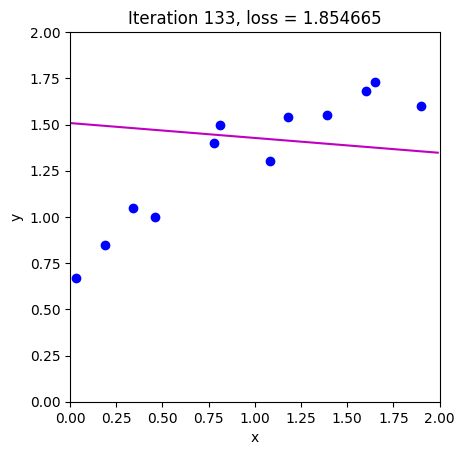

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.854665, b34.153849, c131.767883, d300.653612
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.854665, b5.363854, c16.130249, d34.153849
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.854665, b2.218038, c3.387768, d5.363854
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.854665, b1.886194, c2.007319, d2.218038
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.854665, b1.855220, c1.865729, d1.886194
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.854665, b1.853744, c1.853929, d1.855220
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.854665, b1.853928, c1.853682, d1.853929
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.853928, b1.853710, c1.853710, d1.853929
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.853928, b1.853758, c1.853685, d1.853710
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.853758, b1.853699, c1.853683, d1.853710
alfa 0.000184
before slope phi0:1.507924, phi1: -0.080568
after slope phi0:1.507443, phi1: -0.080100


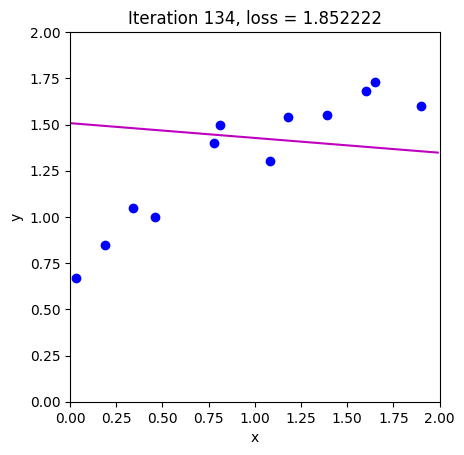

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.852222, b34.153466, c131.769559, d300.657411
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.852222, b5.362098, c16.129179, d34.153466
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.852222, b2.215825, c3.385783, d5.362098
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.852222, b1.883828, c2.005029, d2.215825
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.852222, b1.852802, c1.863338, d1.883828
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.852222, b1.851309, c1.851503, d1.852802
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.852222, b1.851491, c1.851251, d1.851503
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.851491, b1.851276, c1.851280, d1.851503
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.851491, b1.851323, c1.851253, d1.851280
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.851323, b1.851266, c1.851252, d1.851280
alfa 0.000184
before slope phi0:1.507443, phi1: -0.080100
after slope phi0:1.506961, phi1: -0.079633


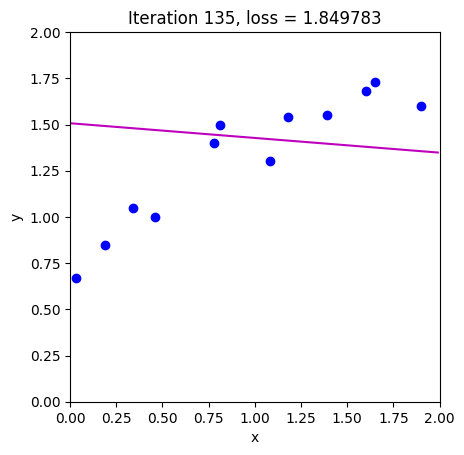

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.849783, b34.153068, c131.771203, d300.661158
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.849783, b5.360339, c16.128101, d34.153068
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.849783, b2.213612, c3.383798, d5.360339
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.849783, b1.881464, c2.002741, d2.213612
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.849783, b1.850388, c1.860949, d1.881464
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.849783, b1.848879, c1.849081, d1.850388
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.849783, b1.849057, c1.848823, d1.849081
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.849057, b1.848847, c1.848854, d1.849081
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.849057, b1.848892, c1.848825, d1.848854
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.848892, b1.848837, c1.848824, d1.848854
alfa 0.000184
before slope phi0:1.506961, phi1: -0.079633
after slope phi0:1.506480, phi1: -0.079167


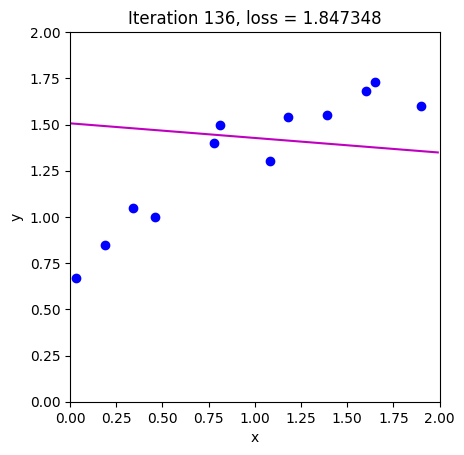

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.847348, b34.152657, c131.772815, d300.664855
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.847348, b5.358578, c16.127015, d34.152657
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.847348, b2.211402, c3.381812, d5.358578
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.847348, b1.879104, c2.000455, d2.211402
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.847348, b1.847978, c1.858563, d1.879104
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.847348, b1.846452, c1.846662, d1.847978
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.847348, b1.846627, c1.846399, d1.846662
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.846627, b1.846420, c1.846432, d1.846662
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.846627, b1.846465, c1.846400, d1.846432
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.846465, b1.846411, c1.846400, d1.846432
alfa 0.000184
before slope phi0:1.506480, phi1: -0.079167
after slope phi0:1.505999, phi1: -0.078701


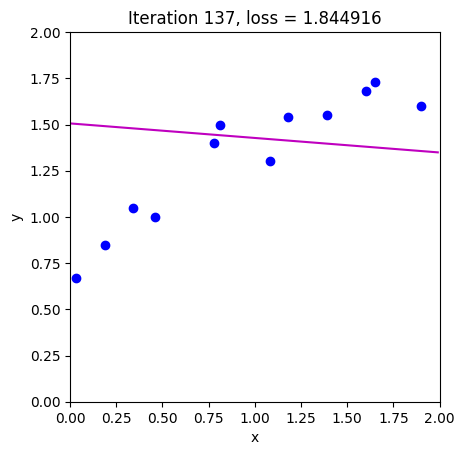

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.844916, b34.152231, c131.774395, d300.668502
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.844916, b5.356815, c16.125920, d34.152231
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.844916, b2.209193, c3.379826, d5.356815
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.844916, b1.876746, c1.998172, d2.209193
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.844916, b1.845571, c1.856181, d1.876746
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.844916, b1.844028, c1.844247, d1.845571
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.844916, b1.844201, c1.843978, d1.844247
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.844201, b1.843998, c1.844013, d1.844247
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.844201, b1.844041, c1.843979, d1.844013
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.844041, b1.843989, c1.843979, d1.844013
alfa 0.000184
before slope phi0:1.505999, phi1: -0.078701
after slope phi0:1.505518, phi1: -0.078235


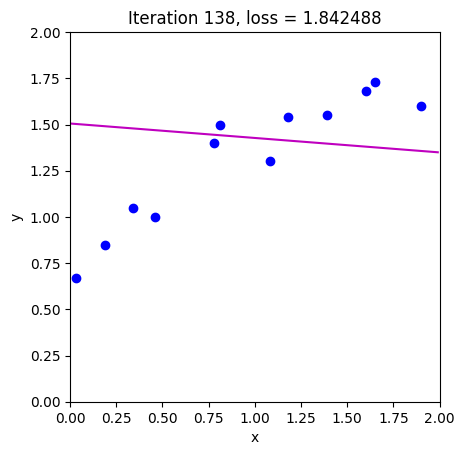

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.842488, b34.151791, c131.775944, d300.672099
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.842488, b5.355050, c16.124818, d34.151791
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.842488, b2.206986, c3.377840, d5.355050
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.842488, b1.874392, c1.995891, d2.206986
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.842488, b1.843168, c1.853802, d1.874392
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.842488, b1.841608, c1.841835, d1.843168
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.842488, b1.841779, c1.841561, d1.841835
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.841779, b1.841579, c1.841598, d1.841835
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.841779, b1.841621, c1.841561, d1.841598
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.841621, b1.841570, c1.841562, d1.841598
alfa 0.000184
before slope phi0:1.505518, phi1: -0.078235
after slope phi0:1.505037, phi1: -0.077770


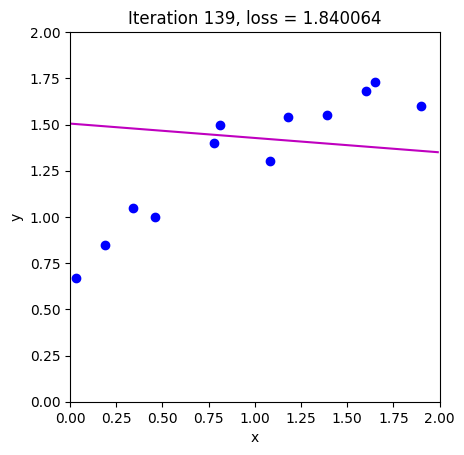

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.840064, b34.151338, c131.777461, d300.675647
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.840064, b5.353283, c16.123708, d34.151338
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.840064, b2.204780, c3.375854, d5.353283
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.840064, b1.872041, c1.993613, d2.204780
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.840064, b1.840768, c1.851427, d1.872041
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.840064, b1.839192, c1.839427, d1.840768
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.840064, b1.839360, c1.839147, d1.839427
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.839360, b1.839164, c1.839186, d1.839427
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.839360, b1.839205, c1.839147, d1.839186
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.839205, b1.839155, c1.839149, d1.839186
alfa 0.000184
before slope phi0:1.505037, phi1: -0.077770
after slope phi0:1.504556, phi1: -0.077306


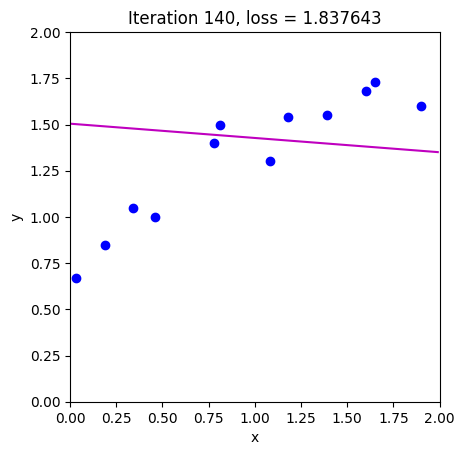

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.837643, b34.150871, c131.778948, d300.679146
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.837643, b5.351513, c16.122589, d34.150871
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.837643, b2.202577, c3.373867, d5.351513
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.837643, b1.869692, c1.991337, d2.202577
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.837643, b1.838371, c1.849054, d1.869692
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.837643, b1.836779, c1.837022, d1.838371
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.837643, b1.836944, c1.836737, d1.837022
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.836944, b1.836752, c1.836778, d1.837022
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.836944, b1.836792, c1.836736, d1.836778
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.836792, b1.836744, c1.836739, d1.836778
alfa 0.000184
before slope phi0:1.504556, phi1: -0.077306
after slope phi0:1.504076, phi1: -0.076842


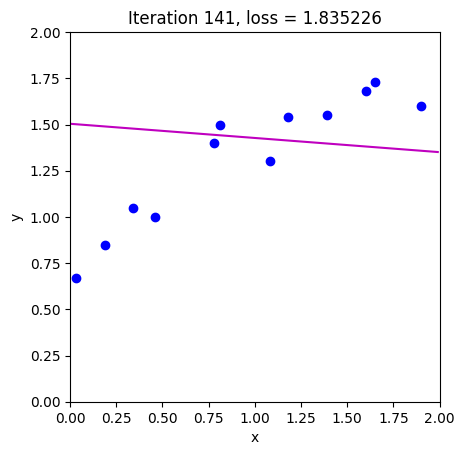

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.835226, b34.150390, c131.780404, d300.682598
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.835226, b5.349742, c16.121463, d34.150390
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.835226, b2.200375, c3.371880, d5.349742
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.835226, b1.867347, c1.989063, d2.200375
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.835226, b1.835978, c1.846685, d1.867347
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.835226, b1.834370, c1.834621, d1.835978
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.835226, b1.834533, c1.834331, d1.834621
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.834533, b1.834344, c1.834373, d1.834621
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.834533, b1.834382, c1.834329, d1.834373
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.834382, b1.834336, c1.834333, d1.834373
alfa 0.000184
before slope phi0:1.504076, phi1: -0.076842
after slope phi0:1.503595, phi1: -0.076379


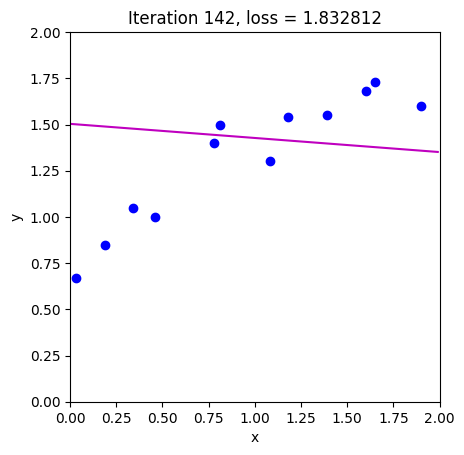

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.832812, b34.149896, c131.781830, d300.686001
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.832812, b5.347968, c16.120330, d34.149896
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.832812, b2.198175, c3.369893, d5.347968
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.832812, b1.865005, c1.986792, d2.198175
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.832812, b1.833588, c1.844319, d1.865005
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.832812, b1.831965, c1.832224, d1.833588
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.832812, b1.832125, c1.831928, d1.832224
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.832125, b1.831939, c1.831972, d1.832224
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.832125, b1.831977, c1.831926, d1.831972
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.831977, b1.831932, c1.831930, d1.831972
alfa 0.000184
before slope phi0:1.503595, phi1: -0.076379
after slope phi0:1.503115, phi1: -0.075916


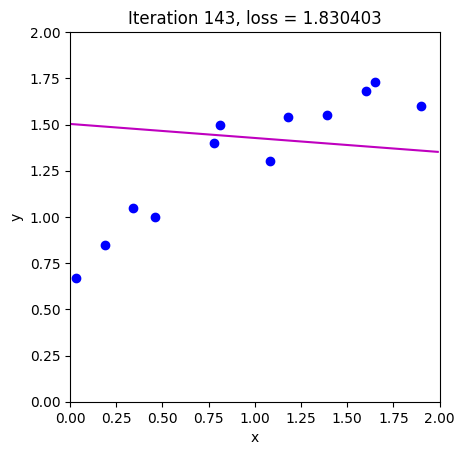

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.830403, b34.149389, c131.783225, d300.689357
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.830403, b5.346193, c16.119188, d34.149389
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.830403, b2.195977, c3.367907, d5.346193
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.830403, b1.862666, c1.984524, d2.195977
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.830403, b1.831202, c1.841956, d1.862666
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.830403, b1.829563, c1.829829, d1.831202
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.830403, b1.829720, c1.829529, d1.829829
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.829720, b1.829538, c1.829575, d1.829829
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.829720, b1.829574, c1.829526, d1.829575
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.829574, b1.829531, c1.829531, d1.829575
alfa 0.000158
before slope phi0:1.503115, phi1: -0.075916
after slope phi0:1.502705, phi1: -0.075521


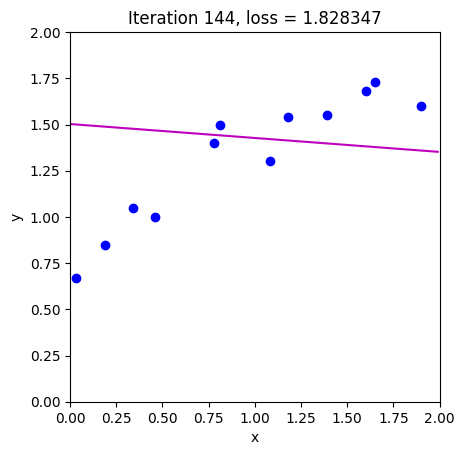

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.828347, b34.148945, c131.784393, d300.692185
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.828347, b5.344674, c16.118207, d34.148945
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.828347, b2.194099, c3.366209, d5.344674
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.828347, b1.860669, c1.982587, d2.194099
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.828347, b1.829166, c1.839940, d1.860669
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.828347, b1.827513, c1.827787, d1.829166
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.828347, b1.827668, c1.827482, d1.827787
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.827668, b1.827489, c1.827529, d1.827787
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.827668, b1.827525, c1.827478, d1.827529
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.827525, b1.827483, c1.827484, d1.827529
alfa 0.000158
before slope phi0:1.502705, phi1: -0.075521
after slope phi0:1.502295, phi1: -0.075127


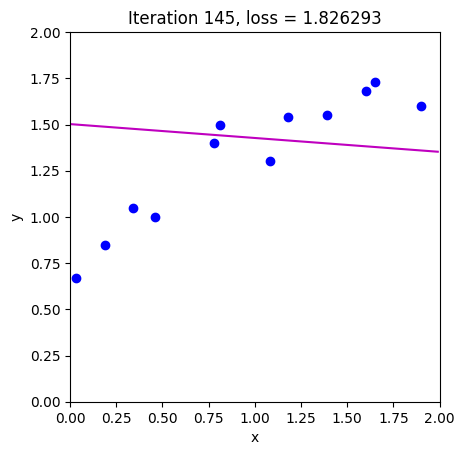

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.826293, b34.148491, c131.785539, d300.694979
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.826293, b5.343153, c16.117220, d34.148491
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.826293, b2.192224, c3.364510, d5.343153
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.826293, b1.858675, c1.980652, d2.192224
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.826293, b1.827132, c1.837926, d1.858675
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.826293, b1.825466, c1.825746, d1.827132
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.826293, b1.825619, c1.825437, d1.825746
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.825619, b1.825443, c1.825485, d1.825746
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.825619, b1.825477, c1.825433, d1.825485
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.825477, b1.825437, c1.825439, d1.825485
alfa 0.000158
before slope phi0:1.502295, phi1: -0.075127
after slope phi0:1.501885, phi1: -0.074733


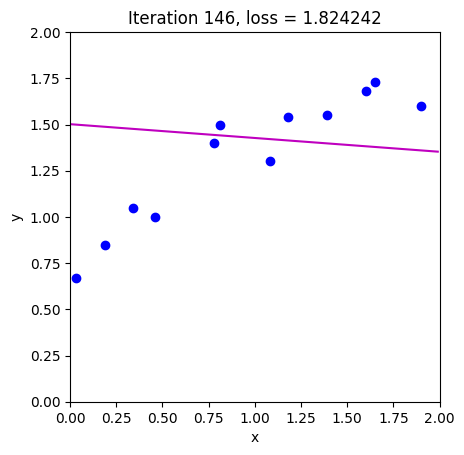

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.824242, b34.148028, c131.786663, d300.697740
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.824242, b5.341632, c16.116227, d34.148028
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.824242, b2.190349, c3.362812, d5.341632
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.824242, b1.856683, c1.978718, d2.190349
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.824242, b1.825101, c1.835914, d1.856683
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.824242, b1.823422, c1.823708, d1.825101
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.824242, b1.823572, c1.823395, d1.823708
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.823572, b1.823399, c1.823445, d1.823708
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.823572, b1.823433, c1.823390, d1.823445
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.823433, b1.823393, c1.823397, d1.823445
alfa 0.000158
before slope phi0:1.501885, phi1: -0.074733
after slope phi0:1.501476, phi1: -0.074339


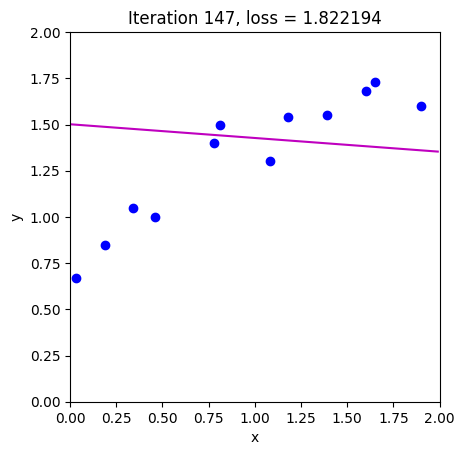

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.822194, b34.147556, c131.787767, d300.700467
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.822194, b5.340109, c16.115229, d34.147556
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.822194, b2.188476, c3.361114, d5.340109
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.822194, b1.854693, c1.976787, d2.188476
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.822194, b1.823072, c1.833905, d1.854693
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.822194, b1.821380, c1.821673, d1.823072
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.822194, b1.821529, c1.821355, d1.821673
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.821529, b1.821358, c1.821406, d1.821673
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.821529, b1.821391, c1.821350, d1.821406
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.821391, b1.821353, c1.821358, d1.821406
alfa 0.000158
before slope phi0:1.501476, phi1: -0.074339
after slope phi0:1.501066, phi1: -0.073946


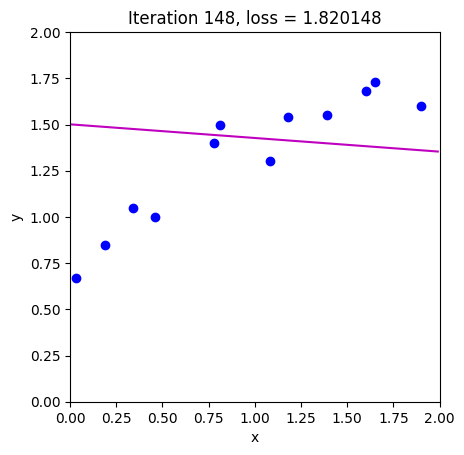

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.820148, b34.147074, c131.788849, d300.703161
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.820148, b5.338585, c16.114227, d34.147074
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.820148, b2.186604, c3.359416, d5.338585
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.820148, b1.852705, c1.974857, d2.186604
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.820148, b1.821045, c1.831898, d1.852705
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.820148, b1.819341, c1.819640, d1.821045
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.820148, b1.819487, c1.819318, d1.819640
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.819487, b1.819320, c1.819371, d1.819640
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.819487, b1.819351, c1.819312, d1.819371
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.819351, b1.819315, c1.819321, d1.819371
alfa 0.000158
before slope phi0:1.501066, phi1: -0.073946
after slope phi0:1.500657, phi1: -0.073553


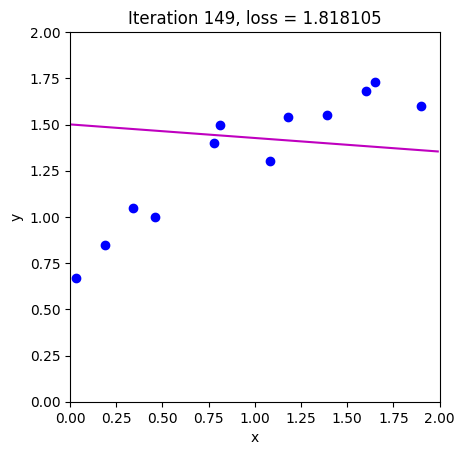

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.818105, b34.146584, c131.789911, d300.705823
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.818105, b5.337059, c16.113219, d34.146584
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.818105, b2.184734, c3.357718, d5.337059
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.818105, b1.850719, c1.972929, d2.184734
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.818105, b1.819022, c1.829893, d1.850719
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.818105, b1.817304, c1.817610, d1.819022
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.818105, b1.817448, c1.817283, d1.817610
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.817448, b1.817284, c1.817338, d1.817610
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.817448, b1.817314, c1.817277, d1.817338
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.817314, b1.817279, c1.817287, d1.817338
alfa 0.000158
before slope phi0:1.500657, phi1: -0.073553
after slope phi0:1.500247, phi1: -0.073160


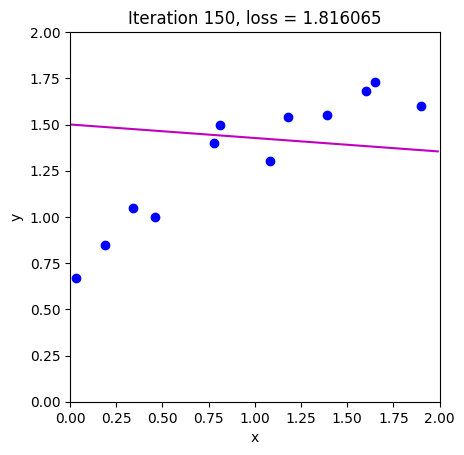

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.816065, b34.146084, c131.790953, d300.708452
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.816065, b5.335532, c16.112205, d34.146084
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.816065, b2.182864, c3.356020, d5.335532
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.816065, b1.848736, c1.971003, d2.182864
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.816065, b1.817000, c1.827891, d1.848736
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.816065, b1.815270, c1.815582, d1.817000
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.816065, b1.815412, c1.815251, d1.815582
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.815412, b1.815250, c1.815307, d1.815582
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.815412, b1.815280, c1.815245, d1.815307
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.815280, b1.815246, c1.815255, d1.815307
alfa 0.000158
before slope phi0:1.500247, phi1: -0.073160
after slope phi0:1.499838, phi1: -0.072768


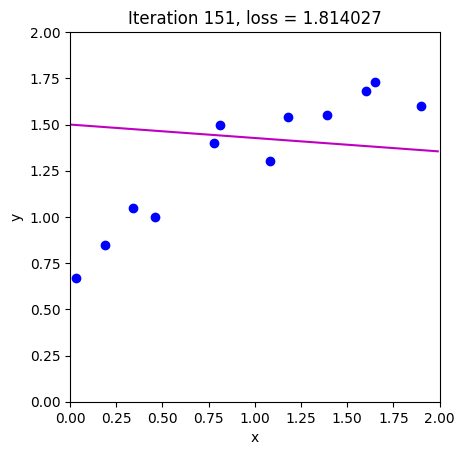

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.814027, b34.145576, c131.791974, d300.711048
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.814027, b5.334004, c16.111187, d34.145576
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.814027, b2.180997, c3.354322, d5.334004
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.814027, b1.846755, c1.969078, d2.180997
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.814027, b1.814981, c1.825891, d1.846755
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.814027, b1.813239, c1.813557, d1.814981
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.814027, b1.813379, c1.813222, d1.813557
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.813379, b1.813220, c1.813279, d1.813557
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.813379, b1.813248, c1.813215, d1.813279
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.813248, b1.813216, c1.813226, d1.813279
alfa 0.000158
before slope phi0:1.499838, phi1: -0.072768
after slope phi0:1.499429, phi1: -0.072376


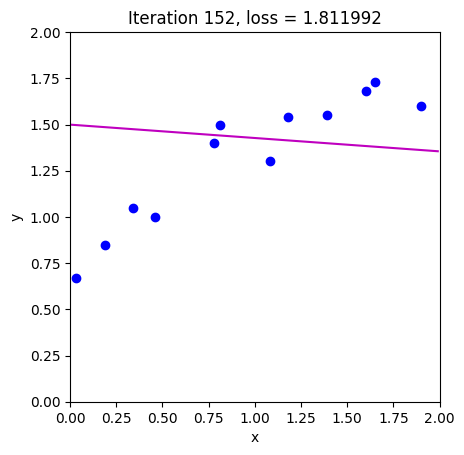

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.811992, b34.145059, c131.792975, d300.713613
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.811992, b5.332475, c16.110164, d34.145059
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.811992, b2.179130, c3.352625, d5.332475
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.811992, b1.844776, c1.967156, d2.179130
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.811992, b1.812965, c1.823893, d1.844776
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.811992, b1.811210, c1.811534, d1.812965
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.811992, b1.811348, c1.811195, d1.811534
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.811348, b1.811192, c1.811254, d1.811534
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.811348, b1.811219, c1.811188, d1.811254
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.811219, b1.811188, c1.811199, d1.811254
alfa 0.000158
before slope phi0:1.499429, phi1: -0.072376
after slope phi0:1.499020, phi1: -0.071985


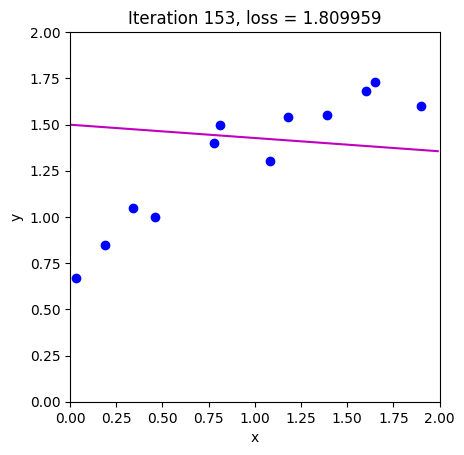

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.809959, b34.144533, c131.793956, d300.716147
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.809959, b5.330945, c16.109136, d34.144533
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.809959, b2.177265, c3.350927, d5.330945
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.809959, b1.842799, c1.965235, d2.177265
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.809959, b1.810951, c1.821898, d1.842799
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.809959, b1.809184, c1.809514, d1.810951
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.809959, b1.809319, c1.809171, d1.809514
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.809319, b1.809166, c1.809231, d1.809514
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.809319, b1.809193, c1.809163, d1.809231
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.809193, b1.809162, c1.809175, d1.809231
alfa 0.000158
before slope phi0:1.499020, phi1: -0.071985
after slope phi0:1.498611, phi1: -0.071594


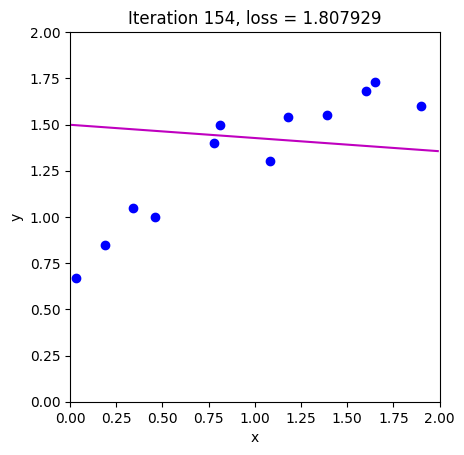

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.807929, b34.143998, c131.794917, d300.718649
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.807929, b5.329414, c16.108103, d34.143998
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.807929, b2.175401, c3.349229, d5.329414
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.807929, b1.840825, c1.963316, d2.175401
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.807929, b1.808940, c1.819905, d1.840825
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.807929, b1.807160, c1.807497, d1.808940
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.807929, b1.807294, c1.807149, d1.807497
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.807294, b1.807143, c1.807211, d1.807497
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.807294, b1.807169, c1.807141, d1.807211
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.807169, b1.807140, c1.807154, d1.807211
alfa 0.000158
before slope phi0:1.498611, phi1: -0.071594
after slope phi0:1.498203, phi1: -0.071203


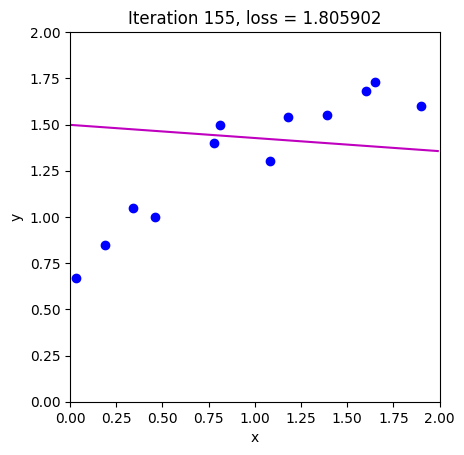

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.805902, b34.143456, c131.795858, d300.721119
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.805902, b5.327881, c16.107066, d34.143456
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.805902, b2.173539, c3.347532, d5.327881
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.805902, b1.838853, c1.961398, d2.173539
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.805902, b1.806931, c1.817914, d1.838853
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.805902, b1.805139, c1.805482, d1.806931
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.805902, b1.805270, c1.805130, d1.805482
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.805270, b1.805122, c1.805193, d1.805482
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.805270, b1.805147, c1.805122, d1.805193
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.805147, b1.805119, c1.805135, d1.805193
alfa 0.000158
before slope phi0:1.498203, phi1: -0.071203
after slope phi0:1.497794, phi1: -0.070813


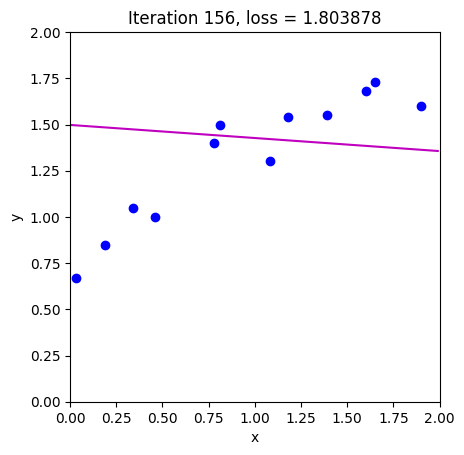

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.803878, b34.142904, c131.796780, d300.723559
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.803878, b5.326348, c16.106023, d34.142904
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.803878, b2.171678, c3.345835, d5.326348
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.803878, b1.836883, c1.959483, d2.171678
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.803878, b1.804924, c1.815926, d1.836883
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.803878, b1.803120, c1.803469, d1.804924
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.803878, b1.803250, c1.803114, d1.803469
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.803250, b1.803104, c1.803178, d1.803469
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.803250, b1.803129, c1.803105, d1.803178
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.803129, b1.803102, c1.803118, d1.803178
alfa 0.000158
before slope phi0:1.497794, phi1: -0.070813
after slope phi0:1.497386, phi1: -0.070423


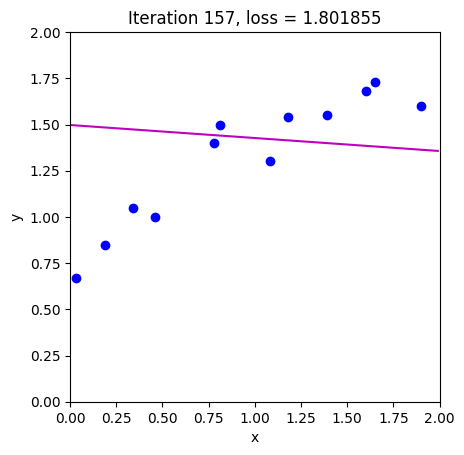

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.801855, b34.142344, c131.797683, d300.725969
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.801855, b5.324813, c16.104976, d34.142344
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.801855, b2.169818, c3.344138, d5.324813
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.801855, b1.834915, c1.957569, d2.169818
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.801855, b1.802920, c1.813940, d1.834915
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.801855, b1.801104, c1.801459, d1.802920
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.801855, b1.801232, c1.801100, d1.801459
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.801232, b1.801089, c1.801165, d1.801459
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.801232, b1.801112, c1.801090, d1.801165
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.801112, b1.801087, c1.801104, d1.801165
alfa 0.000158
before slope phi0:1.497386, phi1: -0.070423
after slope phi0:1.496978, phi1: -0.070033


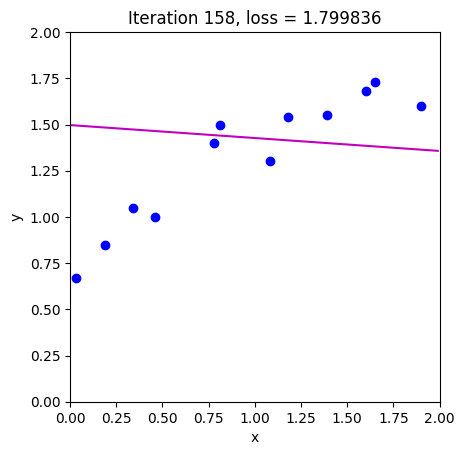

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.799836, b34.141776, c131.798566, d300.728348
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.799836, b5.323277, c16.103924, d34.141776
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.799836, b2.167960, c3.342441, d5.323277
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.799836, b1.832949, c1.955657, d2.167960
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.799836, b1.800919, c1.811956, d1.832949
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.799836, b1.799091, c1.799452, d1.800919
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.799836, b1.799216, c1.799088, d1.799452
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.799216, b1.799076, c1.799155, d1.799452
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.799216, b1.799099, c1.799078, d1.799155
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.799099, b1.799074, c1.799093, d1.799155
alfa 0.000158
before slope phi0:1.496978, phi1: -0.070033
after slope phi0:1.496570, phi1: -0.069644


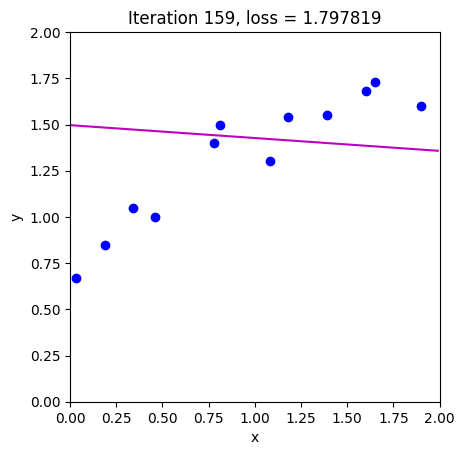

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.797819, b34.141200, c131.799431, d300.730697
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.797819, b5.321741, c16.102868, d34.141200
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.797819, b2.166103, c3.340744, d5.321741
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.797819, b1.830985, c1.953747, d2.166103
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.797819, b1.798920, c1.809975, d1.830985
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.797819, b1.797080, c1.797447, d1.798920
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.797819, b1.797203, c1.797079, d1.797447
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.797203, b1.797066, c1.797147, d1.797447
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.797203, b1.797087, c1.797069, d1.797147
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.797087, b1.797064, c1.797084, d1.797147
alfa 0.000158
before slope phi0:1.496570, phi1: -0.069644
after slope phi0:1.496162, phi1: -0.069255


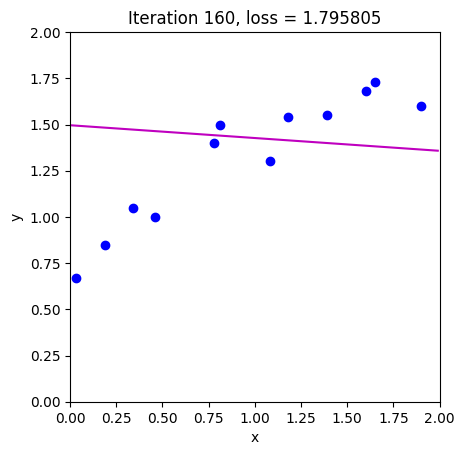

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.795805, b34.140616, c131.800277, d300.733016
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.795805, b5.320203, c16.101807, d34.140616
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.795805, b2.164248, c3.339047, d5.320203
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.795805, b1.829024, c1.951838, d2.164248
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.795805, b1.796923, c1.807996, d1.829024
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.795805, b1.795071, c1.795444, d1.796923
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.795805, b1.795193, c1.795073, d1.795444
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.795193, b1.795058, c1.795142, d1.795444
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.795193, b1.795079, c1.795062, d1.795142
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.795079, b1.795057, c1.795078, d1.795142
alfa 0.000158
before slope phi0:1.496162, phi1: -0.069255
after slope phi0:1.495754, phi1: -0.068867


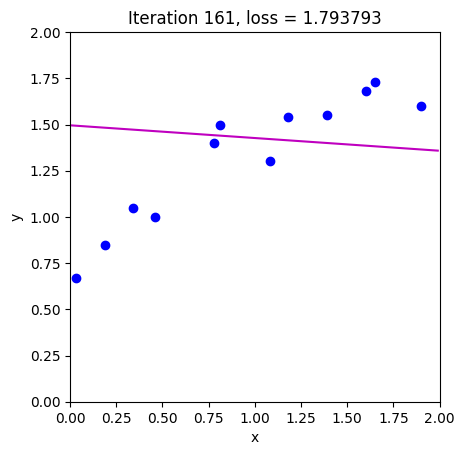

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.793793, b34.140024, c131.801104, d300.735305
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.793793, b5.318664, c16.100741, d34.140024
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.793793, b2.162394, c3.337351, d5.318664
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.793793, b1.827065, c1.949932, d2.162394
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.793793, b1.794929, c1.806019, d1.827065
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.793793, b1.793066, c1.793444, d1.794929
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.793793, b1.793185, c1.793069, d1.793444
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.793185, b1.793053, c1.793139, d1.793444
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.793185, b1.793073, c1.793057, d1.793139
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.793073, b1.793052, c1.793074, d1.793139
alfa 0.000158
before slope phi0:1.495754, phi1: -0.068867
after slope phi0:1.495346, phi1: -0.068479


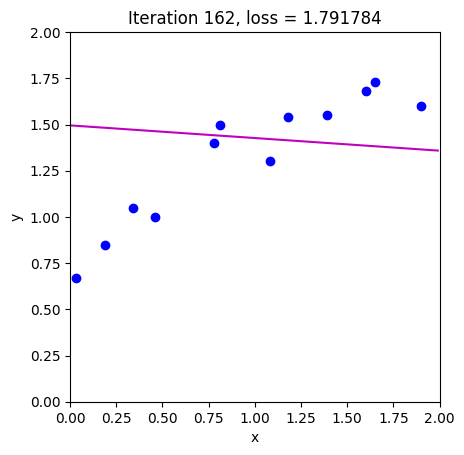

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.791784, b34.139423, c131.801912, d300.737565
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.791784, b5.317125, c16.099671, d34.139423
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.791784, b2.160541, c3.335655, d5.317125
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.791784, b1.825108, c1.948027, d2.160541
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.791784, b1.792937, c1.804045, d1.825108
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.791784, b1.791062, c1.791447, d1.792937
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.791784, b1.791180, c1.791067, d1.791447
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.791180, b1.791050, c1.791139, d1.791447
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.791180, b1.791069, c1.791056, d1.791139
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.791069, b1.791049, c1.791073, d1.791139
alfa 0.000158
before slope phi0:1.495346, phi1: -0.068479
after slope phi0:1.494939, phi1: -0.068091


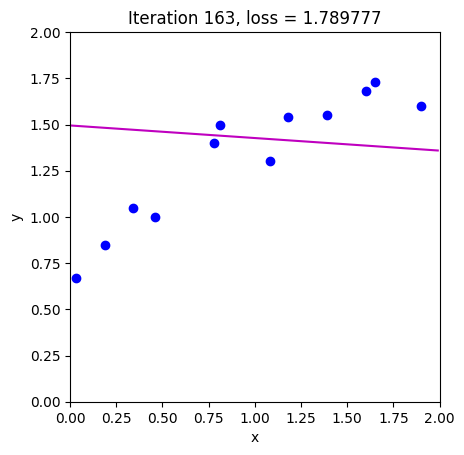

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.789777, b34.138815, c131.802703, d300.739796
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.789777, b5.315585, c16.098597, d34.138815
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.789777, b2.158690, c3.333959, d5.315585
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.789777, b1.823153, c1.946124, d2.158690
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.789777, b1.790948, c1.802073, d1.823153
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.789777, b1.789061, c1.789451, d1.790948
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.789777, b1.789177, c1.789069, d1.789451
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.789177, b1.789050, c1.789142, d1.789451
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.789177, b1.789068, c1.789056, d1.789142
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.789068, b1.789049, c1.789074, d1.789142
alfa 0.000158
before slope phi0:1.494939, phi1: -0.068091
after slope phi0:1.494531, phi1: -0.067704


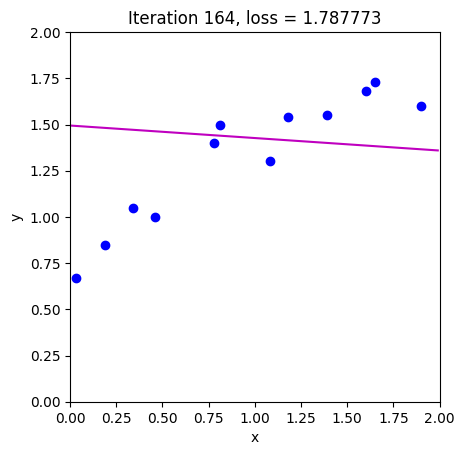

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.787773, b34.138199, c131.803475, d300.741999
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.787773, b5.314043, c16.097519, d34.138199
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.787773, b2.156841, c3.332264, d5.314043
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.787773, b1.821201, c1.944223, d2.156841
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.787773, b1.788961, c1.800103, d1.821201
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.787773, b1.787063, c1.787459, d1.788961
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.787773, b1.787177, c1.787072, d1.787459
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.787177, b1.787052, c1.787146, d1.787459
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.787177, b1.787070, c1.787060, d1.787146
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.787070, b1.787052, c1.787078, d1.787146
alfa 0.000158
before slope phi0:1.494531, phi1: -0.067704
after slope phi0:1.494124, phi1: -0.067317


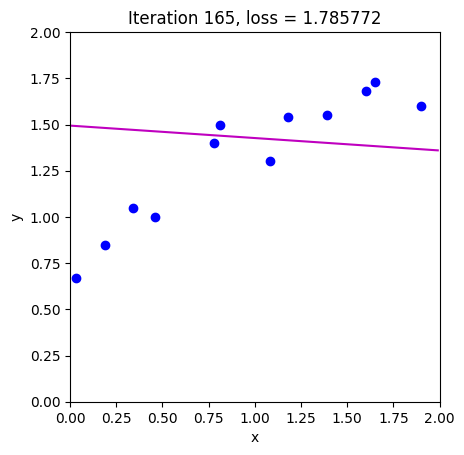

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.785772, b34.137576, c131.804229, d300.744172
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.785772, b5.312501, c16.096436, d34.137576
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.785772, b2.154992, c3.330569, d5.312501
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.785772, b1.819250, c1.942324, d2.154992
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.785772, b1.786976, c1.798136, d1.819250
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.785772, b1.785067, c1.785469, d1.786976
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.785772, b1.785179, c1.785078, d1.785469
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.785179, b1.785057, c1.785154, d1.785469
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.785179, b1.785074, c1.785065, d1.785154
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.785074, b1.785057, c1.785084, d1.785154
alfa 0.000158
before slope phi0:1.494124, phi1: -0.067317
after slope phi0:1.493717, phi1: -0.066931


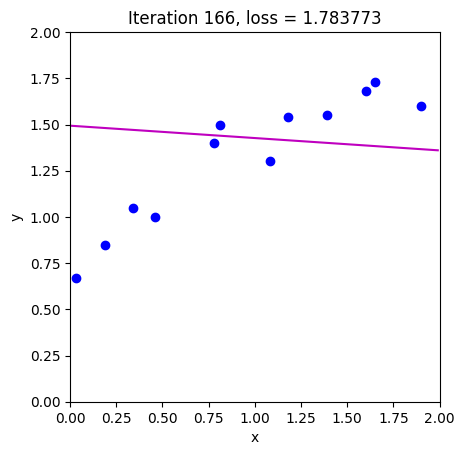

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.783773, b34.136944, c131.804965, d300.746317
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.783773, b5.310958, c16.095349, d34.136944
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.783773, b2.153145, c3.328874, d5.310958
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.783773, b1.817302, c1.940426, d2.153145
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.783773, b1.784994, c1.796171, d1.817302
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.783773, b1.783074, c1.783481, d1.784994
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.783773, b1.783184, c1.783087, d1.783481
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.783184, b1.783065, c1.783164, d1.783481
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.783184, b1.783080, c1.783073, d1.783164
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.783080, b1.783065, c1.783093, d1.783164
alfa 0.000158
before slope phi0:1.493717, phi1: -0.066931
after slope phi0:1.493310, phi1: -0.066544


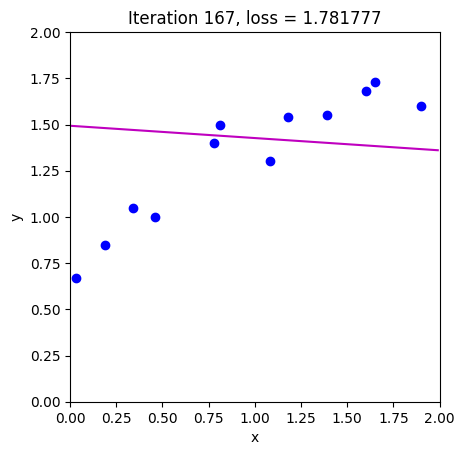

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.781777, b34.136306, c131.805684, d300.748435
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.781777, b5.309414, c16.094257, d34.136306
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.781777, b2.151300, c3.327179, d5.309414
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.781777, b1.815356, c1.938530, d2.151300
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.781777, b1.783015, c1.794208, d1.815356
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.781777, b1.781083, c1.781496, d1.783015
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.781777, b1.781192, c1.781098, d1.781496
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.781192, b1.781075, c1.781176, d1.781496
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.781192, b1.781089, c1.781084, d1.781176
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.781089, b1.781075, c1.781104, d1.781176
alfa 0.000158
before slope phi0:1.493310, phi1: -0.066544
after slope phi0:1.492904, phi1: -0.066159


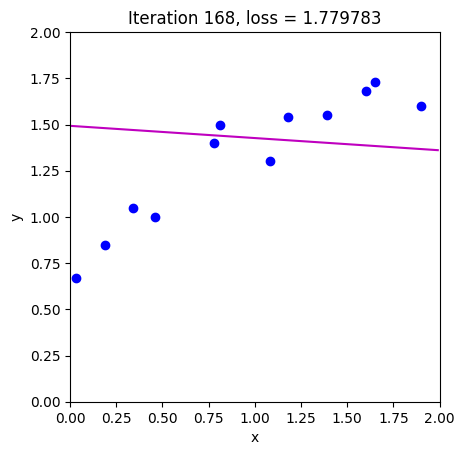

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.779783, b34.135659, c131.806385, d300.750524
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.779783, b5.307870, c16.093162, d34.135659
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.779783, b2.149456, c3.325485, d5.307870
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.779783, b1.813412, c1.936636, d2.149456
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.779783, b1.781038, c1.792248, d1.813412
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.779783, b1.779095, c1.779514, d1.781038
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.779783, b1.779202, c1.779112, d1.779514
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.779202, b1.779087, c1.779191, d1.779514
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.779202, b1.779101, c1.779098, d1.779191
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.779101, b1.779088, c1.779118, d1.779191
alfa 0.000158
before slope phi0:1.492904, phi1: -0.066159
after slope phi0:1.492497, phi1: -0.065773


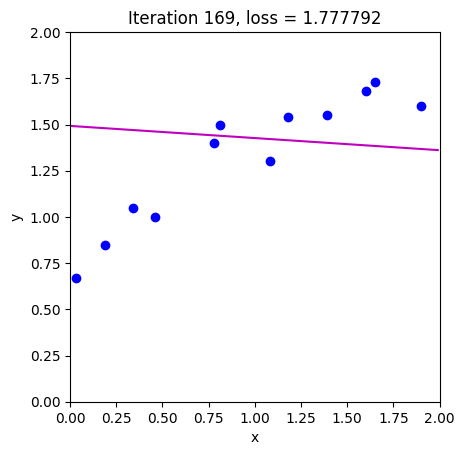

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.777792, b34.135005, c131.807068, d300.752585
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.777792, b5.306324, c16.092062, d34.135005
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.777792, b2.147613, c3.323791, d5.306324
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.777792, b1.811471, c1.934744, d2.147613
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.777792, b1.779063, c1.790289, d1.811471
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.777792, b1.777110, c1.777533, d1.779063
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.777792, b1.777214, c1.777128, d1.777533
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.777214, b1.777102, c1.777208, d1.777533
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.777214, b1.777115, c1.777113, d1.777208
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.777115, b1.777103, c1.777134, d1.777208
alfa 0.000158
before slope phi0:1.492497, phi1: -0.065773
after slope phi0:1.492090, phi1: -0.065388


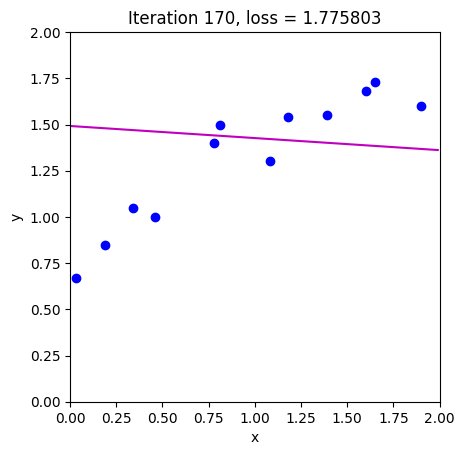

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.775803, b34.134344, c131.807735, d300.754619
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.775803, b5.304778, c16.090959, d34.134344
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.775803, b2.145772, c3.322097, d5.304778
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.775803, b1.809531, c1.932854, d2.145772
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.775803, b1.777091, c1.788334, d1.809531
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.775803, b1.775126, c1.775556, d1.777091
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.775803, b1.775229, c1.775147, d1.775556
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.775229, b1.775120, c1.775228, d1.775556
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.775229, b1.775132, c1.775132, d1.775228
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.775132, b1.775121, c1.775153, d1.775228
alfa 0.000158
before slope phi0:1.492090, phi1: -0.065388
after slope phi0:1.491684, phi1: -0.065003


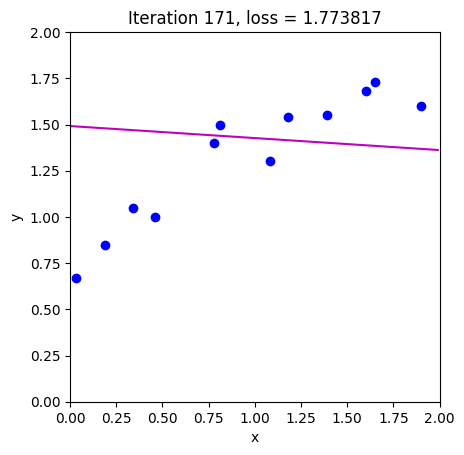

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.773817, b34.133676, c131.808384, d300.756626
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.773817, b5.303231, c16.089851, d34.133676
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.773817, b2.143932, c3.320404, d5.303231
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.773817, b1.807594, c1.930966, d2.143932
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.773817, b1.775121, c1.786380, d1.807594
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.773817, b1.773146, c1.773580, d1.775121
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.773817, b1.773247, c1.773168, d1.773580
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.773247, b1.773139, c1.773251, d1.773580
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.773247, b1.773151, c1.773152, d1.773251
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.773247, b1.773172, c1.773141, d1.773152
alfa 0.000144
before slope phi0:1.491684, phi1: -0.065003
after slope phi0:1.491313, phi1: -0.064652


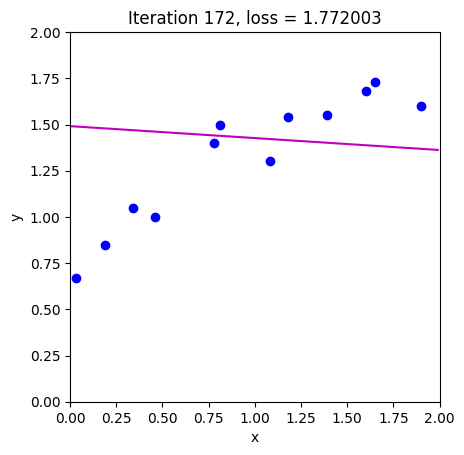

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.772003, b34.133058, c131.808963, d300.758438
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.772003, b5.301815, c16.088834, d34.133058
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.772003, b2.142251, c3.318855, d5.301815
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.772003, b1.805823, c1.929240, d2.142251
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.772003, b1.773321, c1.784595, d1.805823
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.772003, b1.771336, c1.771776, d1.773321
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.772003, b1.771435, c1.771360, d1.771776
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.771435, b1.771330, c1.771444, d1.771776
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.771435, b1.771341, c1.771344, d1.771444
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.771435, b1.771362, c1.771331, d1.771344
alfa 0.000144
before slope phi0:1.491313, phi1: -0.064652
after slope phi0:1.490941, phi1: -0.064300


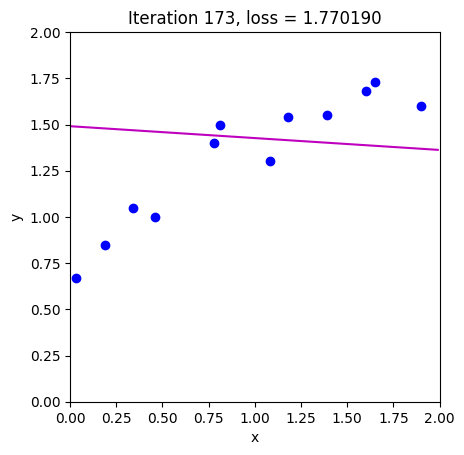

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.770190, b34.132434, c131.809527, d300.760227
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.770190, b5.300399, c16.087814, d34.132434
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.770190, b2.140570, c3.317306, d5.300399
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.770190, b1.804055, c1.927515, d2.140570
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.770190, b1.771523, c1.782811, d1.804055
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.770190, b1.769528, c1.769973, d1.771523
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.770190, b1.769626, c1.769553, d1.769973
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.769626, b1.769523, c1.769639, d1.769973
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.769626, b1.769533, c1.769537, d1.769639
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.769626, b1.769553, c1.769524, d1.769537
alfa 0.000144
before slope phi0:1.490941, phi1: -0.064300
after slope phi0:1.490570, phi1: -0.063949


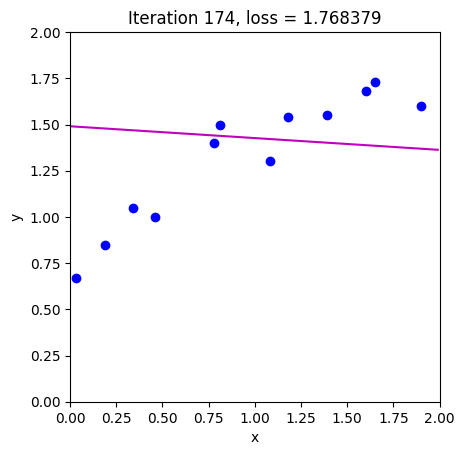

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.768379, b34.131804, c131.810078, d300.761994
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.768379, b5.298982, c16.086790, d34.131804
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.768379, b2.138891, c3.315758, d5.298982
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.768379, b1.802288, c1.925792, d2.138891
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.768379, b1.769727, c1.781030, d1.802288
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.768379, b1.767723, c1.768172, d1.769727
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.768379, b1.767819, c1.767749, d1.768172
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.767819, b1.767718, c1.767836, d1.768172
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.767819, b1.767727, c1.767733, d1.767836
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.767819, b1.767747, c1.767718, d1.767733
alfa 0.000144
before slope phi0:1.490570, phi1: -0.063949
after slope phi0:1.490199, phi1: -0.063598


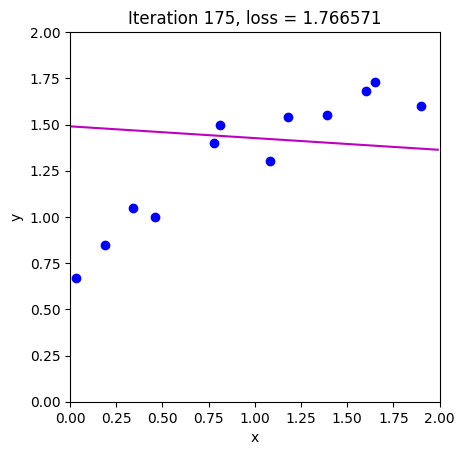

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.766571, b34.131168, c131.810614, d300.763739
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.766571, b5.297564, c16.085763, d34.131168
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.766571, b2.137213, c3.314210, d5.297564
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.766571, b1.800523, c1.924070, d2.137213
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.766571, b1.767933, c1.779251, d1.800523
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.766571, b1.765919, c1.766373, d1.767933
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.766571, b1.766013, c1.765947, d1.766373
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.766013, b1.765915, c1.766035, d1.766373
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.766013, b1.765923, c1.765930, d1.766035
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.766013, b1.765943, c1.765915, d1.765930
alfa 0.000144
before slope phi0:1.490199, phi1: -0.063598
after slope phi0:1.489828, phi1: -0.063248


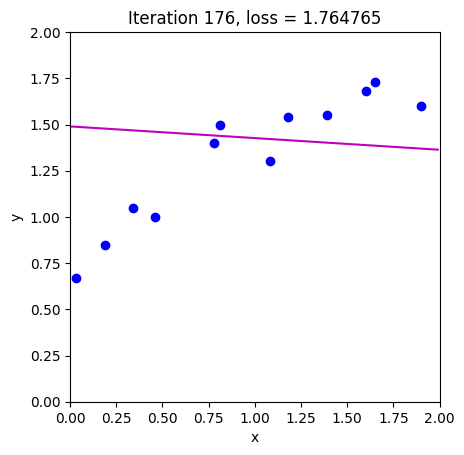

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.764765, b34.130526, c131.811137, d300.765462
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.764765, b5.296146, c16.084734, d34.130526
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.764765, b2.135536, c3.312663, d5.296146
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.764765, b1.798760, c1.922350, d2.135536
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.764765, b1.766141, c1.777473, d1.798760
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.764765, b1.764117, c1.764576, d1.766141
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.764765, b1.764210, c1.764148, d1.764576
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.764210, b1.764114, c1.764236, d1.764576
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.764210, b1.764122, c1.764130, d1.764236
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.764210, b1.764140, c1.764114, d1.764130
alfa 0.000144
before slope phi0:1.489828, phi1: -0.063248
after slope phi0:1.489457, phi1: -0.062898


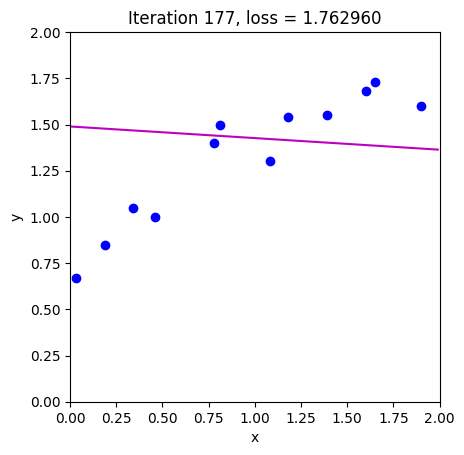

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.762960, b34.129879, c131.811647, d300.767163
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.762960, b5.294728, c16.083701, d34.129879
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.762960, b2.133860, c3.311116, d5.294728
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.762960, b1.796999, c1.920632, d2.133860
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.762960, b1.764351, c1.775698, d1.796999
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.762960, b1.762318, c1.762782, d1.764351
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.762960, b1.762409, c1.762350, d1.762782
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.762409, b1.762315, c1.762439, d1.762782
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.762409, b1.762322, c1.762332, d1.762439
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.762409, b1.762340, c1.762315, d1.762332
alfa 0.000144
before slope phi0:1.489457, phi1: -0.062898
after slope phi0:1.489086, phi1: -0.062548


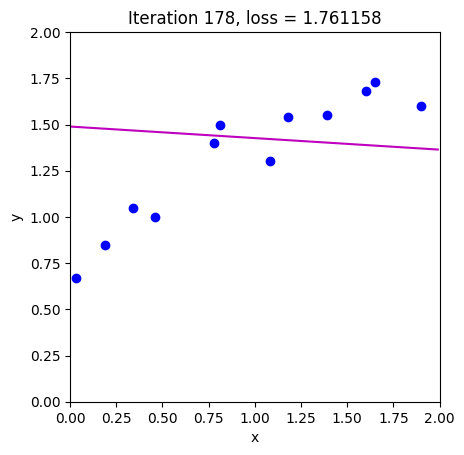

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.761158, b34.129226, c131.812143, d300.768843
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.761158, b5.293309, c16.082665, d34.129226
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.761158, b2.132186, c3.309569, d5.293309
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.761158, b1.795239, c1.918915, d2.132186
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.761158, b1.762564, c1.773924, d1.795239
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.761158, b1.760521, c1.760989, d1.762564
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.761158, b1.760610, c1.760554, d1.760989
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.760610, b1.760518, c1.760644, d1.760989
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.760610, b1.760525, c1.760536, d1.760644
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.760610, b1.760542, c1.760518, d1.760536
alfa 0.000144
before slope phi0:1.489086, phi1: -0.062548
after slope phi0:1.488715, phi1: -0.062198


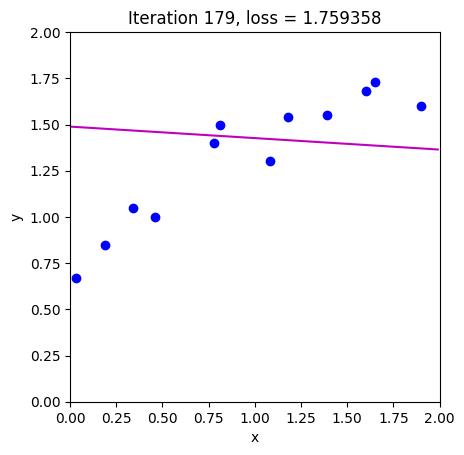

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.759358, b34.128567, c131.812625, d300.770501
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.759358, b5.291889, c16.081625, d34.128567
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.759358, b2.130513, c3.308023, d5.291889
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.759358, b1.793481, c1.917199, d2.130513
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.759358, b1.760778, c1.772152, d1.793481
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.759358, b1.758725, c1.759199, d1.760778
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.759358, b1.758814, c1.758760, d1.759199
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.758814, b1.758723, c1.758852, d1.759199
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.758814, b1.758729, c1.758742, d1.758852
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.758814, b1.758746, c1.758723, d1.758742
alfa 0.000144
before slope phi0:1.488715, phi1: -0.062198
after slope phi0:1.488345, phi1: -0.061849


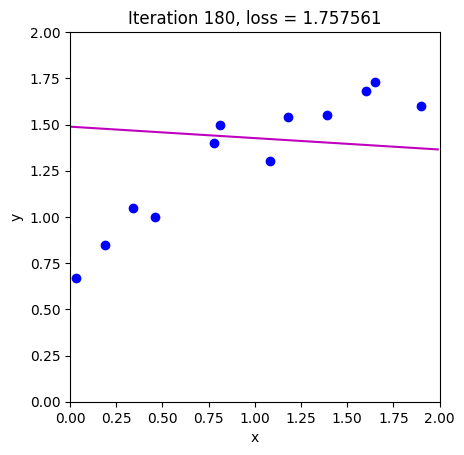

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.757561, b34.127903, c131.813095, d300.772138
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.757561, b5.290469, c16.080583, d34.127903
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.757561, b2.128841, c3.306477, d5.290469
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.757561, b1.791725, c1.915485, d2.128841
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.757561, b1.758994, c1.770382, d1.791725
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.757561, b1.756932, c1.757410, d1.758994
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.757561, b1.757019, c1.756969, d1.757410
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.757019, b1.756931, c1.757061, d1.757410
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.757019, b1.756936, c1.756950, d1.757061
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.757019, b1.756953, c1.756930, d1.756950
alfa 0.000144
before slope phi0:1.488345, phi1: -0.061849
after slope phi0:1.487974, phi1: -0.061500


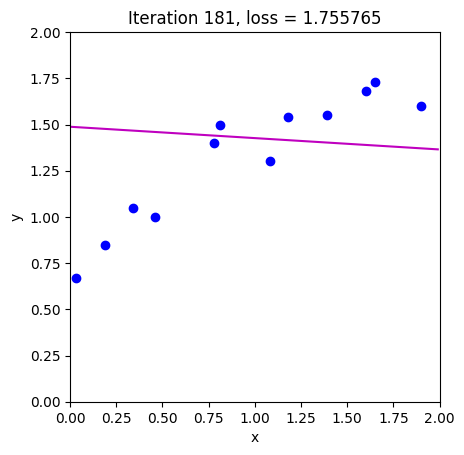

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.755765, b34.127233, c131.813551, d300.773754
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.755765, b5.289049, c16.079538, d34.127233
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.755765, b2.127170, c3.304931, d5.289049
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.755765, b1.789971, c1.913773, d2.127170
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.755765, b1.757212, c1.768614, d1.789971
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.755765, b1.755141, c1.755624, d1.757212
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.755765, b1.755226, c1.755179, d1.755624
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.755226, b1.755140, c1.755273, d1.755624
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.755226, b1.755144, c1.755160, d1.755273
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.755226, b1.755161, c1.755139, d1.755160
alfa 0.000144
before slope phi0:1.487974, phi1: -0.061500
after slope phi0:1.487604, phi1: -0.061151


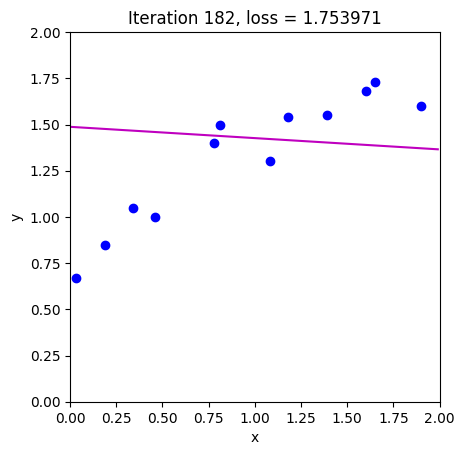

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.753971, b34.126558, c131.813994, d300.775350
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.753971, b5.287628, c16.078490, d34.126558
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.753971, b2.125501, c3.303386, d5.287628
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.753971, b1.788219, c1.912062, d2.125501
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.753971, b1.755432, c1.766848, d1.788219
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.753971, b1.753352, c1.753839, d1.755432
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.753971, b1.753436, c1.753391, d1.753839
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.753436, b1.753352, c1.753486, d1.753839
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.753436, b1.753355, c1.753372, d1.753486
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.753436, b1.753371, c1.753350, d1.753372
alfa 0.000144
before slope phi0:1.487604, phi1: -0.061151
after slope phi0:1.487234, phi1: -0.060803


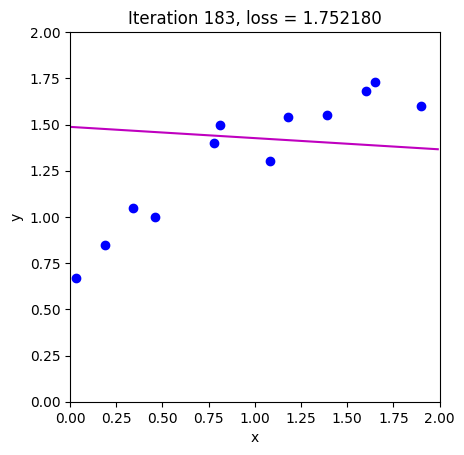

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.752180, b34.125877, c131.814424, d300.776924
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.752180, b5.286207, c16.077439, d34.125877
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.752180, b2.123832, c3.301841, d5.286207
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.752180, b1.786469, c1.910353, d2.123832
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.752180, b1.753654, c1.765084, d1.786469
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.752180, b1.751565, c1.752057, d1.753654
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.752180, b1.751647, c1.751606, d1.752057
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.751647, b1.751565, c1.751702, d1.752057
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.751647, b1.751568, c1.751586, d1.751702
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.751647, b1.751584, c1.751563, d1.751586
alfa 0.000144
before slope phi0:1.487234, phi1: -0.060803
after slope phi0:1.486864, phi1: -0.060455


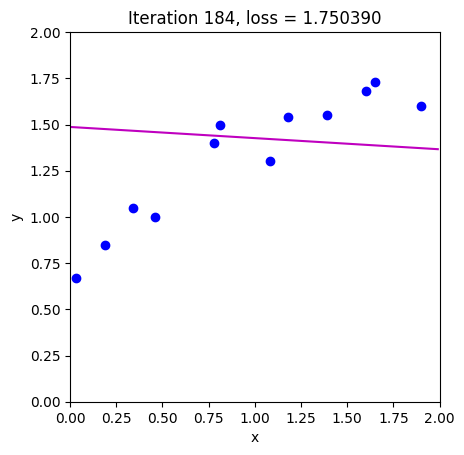

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.750390, b34.125191, c131.814841, d300.778478
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.750390, b5.284785, c16.076385, d34.125191
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.750390, b2.122166, c3.300297, d5.284785
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.750390, b1.784720, c1.908645, d2.122166
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.750390, b1.751878, c1.763322, d1.784720
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.750390, b1.749780, c1.750276, d1.751878
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.750390, b1.749861, c1.749823, d1.750276
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.749861, b1.749781, c1.749919, d1.750276
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.749861, b1.749783, c1.749803, d1.749919
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.749861, b1.749798, c1.749779, d1.749803
alfa 0.000144
before slope phi0:1.486864, phi1: -0.060455
after slope phi0:1.486494, phi1: -0.060107


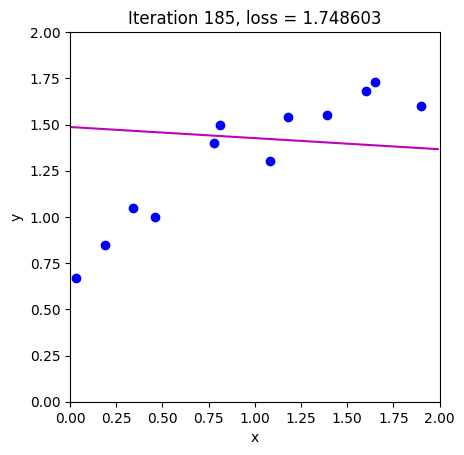

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.748603, b34.124499, c131.815246, d300.780012
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.748603, b5.283363, c16.075328, d34.124499
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.748603, b2.120500, c3.298753, d5.283363
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.748603, b1.782973, c1.906939, d2.120500
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.748603, b1.750105, c1.761561, d1.782973
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.748603, b1.747997, c1.748498, d1.750105
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.748603, b1.748076, c1.748041, d1.748498
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.748076, b1.747998, c1.748139, d1.748498
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.748076, b1.748000, c1.748021, d1.748139
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.748076, b1.748015, c1.747996, d1.748021
alfa 0.000144
before slope phi0:1.486494, phi1: -0.060107
after slope phi0:1.486124, phi1: -0.059759


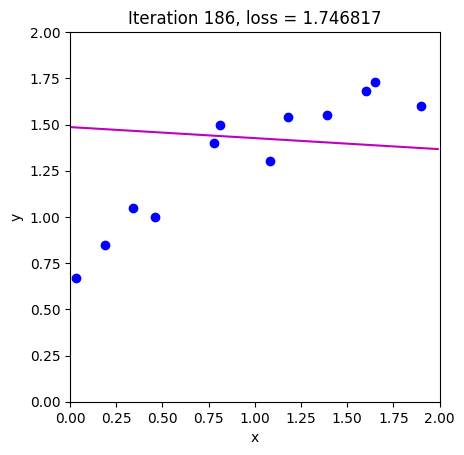

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.746817, b34.123803, c131.815637, d300.781525
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.746817, b5.281940, c16.074269, d34.123803
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.746817, b2.118836, c3.297210, d5.281940
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.746817, b1.781228, c1.905234, d2.118836
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.746817, b1.748333, c1.759803, d1.781228
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.746817, b1.746216, c1.746722, d1.748333
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.746817, b1.746294, c1.746262, d1.746722
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.746294, b1.746218, c1.746360, d1.746722
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.746294, b1.746219, c1.746241, d1.746360
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.746294, b1.746233, c1.746216, d1.746241
alfa 0.000144
before slope phi0:1.486124, phi1: -0.059759
after slope phi0:1.485755, phi1: -0.059412


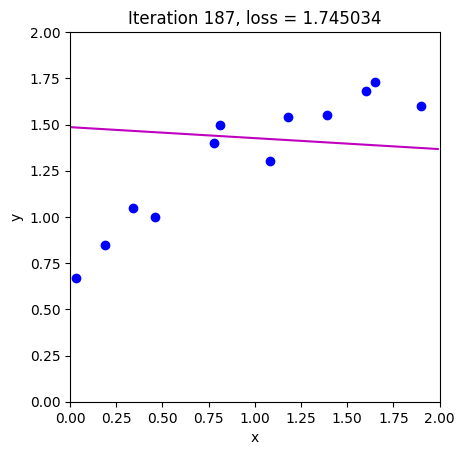

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.745034, b34.123101, c131.816017, d300.783019
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.745034, b5.280518, c16.073206, d34.123101
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.745034, b2.117173, c3.295667, d5.280518
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.745034, b1.779485, c1.903531, d2.117173
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.745034, b1.746563, c1.758047, d1.779485
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.745034, b1.744438, c1.744947, d1.746563
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.745034, b1.744514, c1.744485, d1.744947
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.744514, b1.744440, c1.744584, d1.744947
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.744514, b1.744440, c1.744464, d1.744584
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.744514, b1.744454, c1.744437, d1.744464
alfa 0.000144
before slope phi0:1.485755, phi1: -0.059412
after slope phi0:1.485385, phi1: -0.059065


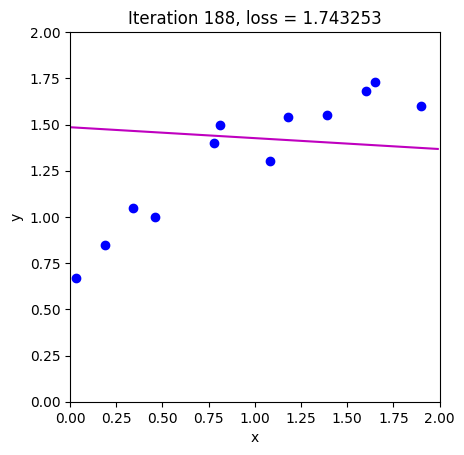

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.743253, b34.122394, c131.816384, d300.784492
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.743253, b5.279094, c16.072141, d34.122394
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.743253, b2.115511, c3.294125, d5.279094
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.743253, b1.777744, c1.901830, d2.115511
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.743253, b1.744795, c1.756292, d1.777744
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.743253, b1.742661, c1.743175, d1.744795
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.743253, b1.742735, c1.742709, d1.743175
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.742735, b1.742663, c1.742810, d1.743175
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.742735, b1.742663, c1.742688, d1.742810
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.742735, b1.742676, c1.742661, d1.742688
alfa 0.000144
before slope phi0:1.485385, phi1: -0.059065
after slope phi0:1.485016, phi1: -0.058718


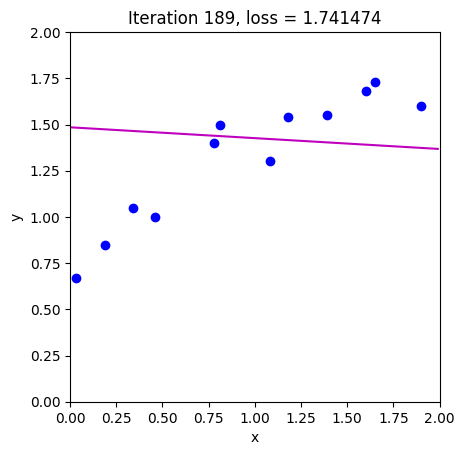

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.741474, b34.121681, c131.816738, d300.785946
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.741474, b5.277671, c16.071074, d34.121681
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.741474, b2.113850, c3.292583, d5.277671
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.741474, b1.776004, c1.900130, d2.113850
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.741474, b1.743029, c1.754539, d1.776004
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.741474, b1.740886, c1.741405, d1.743029
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.741474, b1.740959, c1.740936, d1.741405
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.740959, b1.740889, c1.741038, d1.741405
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.740959, b1.740888, c1.740914, d1.741038
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.740959, b1.740901, c1.740886, d1.740914
alfa 0.000144
before slope phi0:1.485016, phi1: -0.058718
after slope phi0:1.484647, phi1: -0.058372


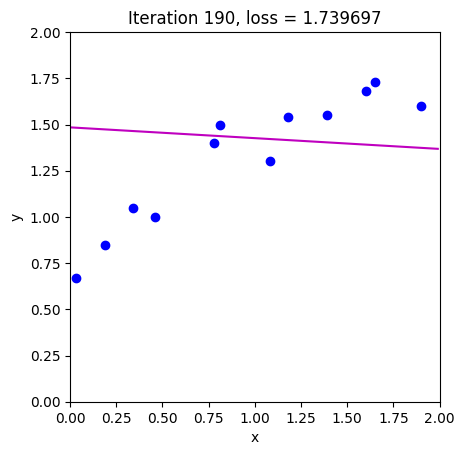

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.739697, b34.120964, c131.817081, d300.787380
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.739697, b5.276247, c16.070003, d34.120964
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.739697, b2.112191, c3.291041, d5.276247
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.739697, b1.774267, c1.898431, d2.112191
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.739697, b1.741265, c1.752788, d1.774267
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.739697, b1.739114, c1.739636, d1.741265
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.739697, b1.739185, c1.739165, d1.739636
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.739185, b1.739117, c1.739268, d1.739636
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.739185, b1.739116, c1.739143, d1.739268
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.739185, b1.739128, c1.739114, d1.739143
alfa 0.000144
before slope phi0:1.484647, phi1: -0.058372
after slope phi0:1.484278, phi1: -0.058026


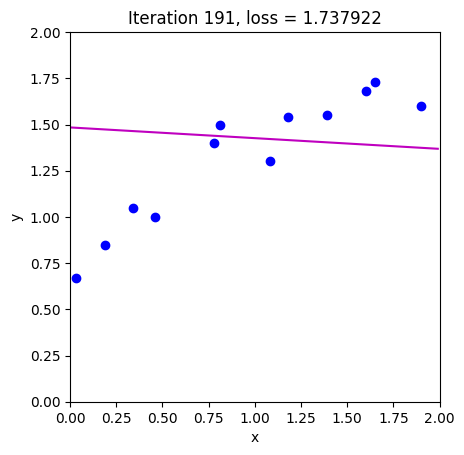

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.737922, b34.120242, c131.817411, d300.788795
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.737922, b5.274823, c16.068930, d34.120242
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.737922, b2.110533, c3.289500, d5.274823
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.737922, b1.772531, c1.896734, d2.110533
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.737922, b1.739503, c1.751039, d1.772531
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.737922, b1.737343, c1.737870, d1.739503
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.737922, b1.737413, c1.737396, d1.737870
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.737413, b1.737347, c1.737499, d1.737870
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.737413, b1.737345, c1.737374, d1.737499
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.737413, b1.737357, c1.737344, d1.737374
alfa 0.000144
before slope phi0:1.484278, phi1: -0.058026
after slope phi0:1.483909, phi1: -0.057680


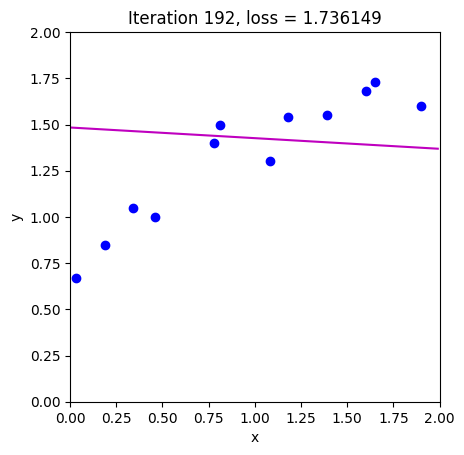

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.736149, b34.119514, c131.817729, d300.790190
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.736149, b5.273399, c16.067854, d34.119514
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.736149, b2.108876, c3.287960, d5.273399
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.736149, b1.770797, c1.895039, d2.108876
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.736149, b1.737743, c1.749292, d1.770797
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.736149, b1.735575, c1.736106, d1.737743
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.736149, b1.735643, c1.735629, d1.736106
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.735643, b1.735579, c1.735733, d1.736106
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.735643, b1.735576, c1.735606, d1.735733
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.735643, b1.735588, c1.735575, d1.735606
alfa 0.000144
before slope phi0:1.483909, phi1: -0.057680
after slope phi0:1.483540, phi1: -0.057334


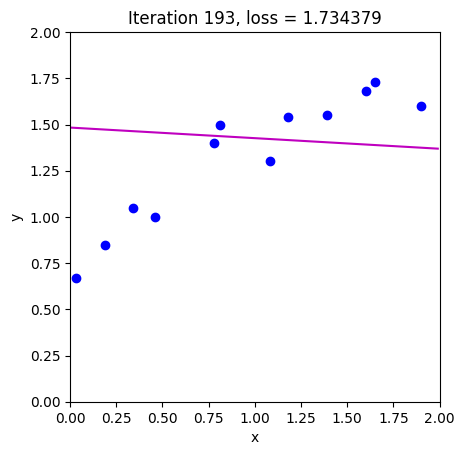

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.734379, b34.118782, c131.818035, d300.791566
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.734379, b5.271974, c16.066776, d34.118782
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.734379, b2.107221, c3.286420, d5.271974
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.734379, b1.769064, c1.893345, d2.107221
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.734379, b1.735985, c1.747547, d1.769064
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.734379, b1.733808, c1.734344, d1.735985
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.734379, b1.733875, c1.733864, d1.734344
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.733875, b1.733813, c1.733969, d1.734344
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.733875, b1.733810, c1.733841, d1.733969
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.733875, b1.733821, c1.733809, d1.733841
alfa 0.000144
before slope phi0:1.483540, phi1: -0.057334
after slope phi0:1.483172, phi1: -0.056989


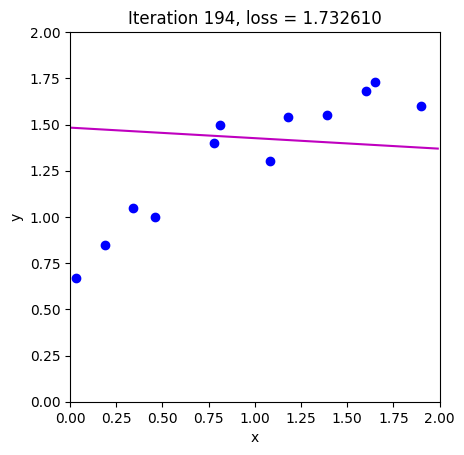

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.732610, b34.118045, c131.818330, d300.792924
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.732610, b5.270549, c16.065695, d34.118045
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.732610, b2.105567, c3.284880, d5.270549
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.732610, b1.767334, c1.891653, d2.105567
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.732610, b1.734229, c1.745804, d1.767334
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.732610, b1.732044, c1.732584, d1.734229
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.732610, b1.732109, c1.732101, d1.732584
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.732109, b1.732049, c1.732207, d1.732584
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.732109, b1.732045, c1.732077, d1.732207
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.732109, b1.732056, c1.732045, d1.732077
alfa 0.000144
before slope phi0:1.483172, phi1: -0.056989
after slope phi0:1.482803, phi1: -0.056644


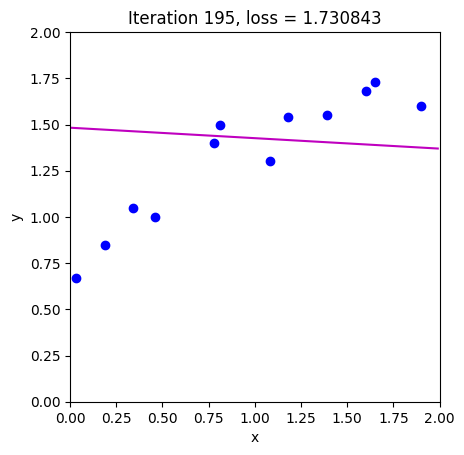

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.730843, b34.117303, c131.818612, d300.794262
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.730843, b5.269124, c16.064611, d34.117303
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.730843, b2.103914, c3.283341, d5.269124
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.730843, b1.765605, c1.889962, d2.103914
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.730843, b1.732476, c1.744063, d1.765605
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.730843, b1.730281, c1.730825, d1.732476
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.730843, b1.730346, c1.730340, d1.730825
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.730346, b1.730287, c1.730447, d1.730825
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.730346, b1.730282, c1.730316, d1.730447
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.730346, b1.730293, c1.730283, d1.730316
alfa 0.000144
before slope phi0:1.482803, phi1: -0.056644
after slope phi0:1.482435, phi1: -0.056299


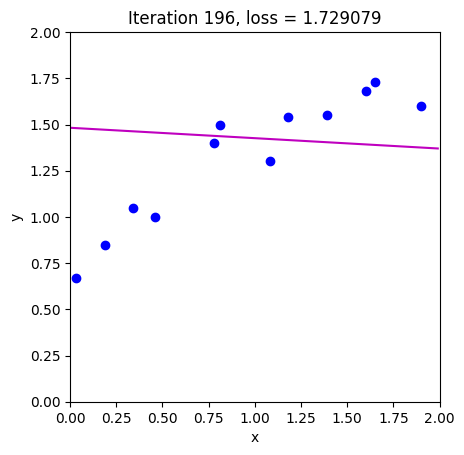

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.729079, b34.116556, c131.818883, d300.795582
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.729079, b5.267699, c16.063525, d34.116556
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.729079, b2.102263, c3.281803, d5.267699
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.729079, b1.763878, c1.888273, d2.102263
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.729079, b1.730723, c1.742323, d1.763878
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.729079, b1.728521, c1.729069, d1.730723
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.729079, b1.728584, c1.728581, d1.729069
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.728584, b1.728527, c1.728689, d1.729069
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.728584, b1.728522, c1.728557, d1.728689
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.728584, b1.728532, c1.728523, d1.728557
alfa 0.000144
before slope phi0:1.482435, phi1: -0.056299
after slope phi0:1.482066, phi1: -0.055955


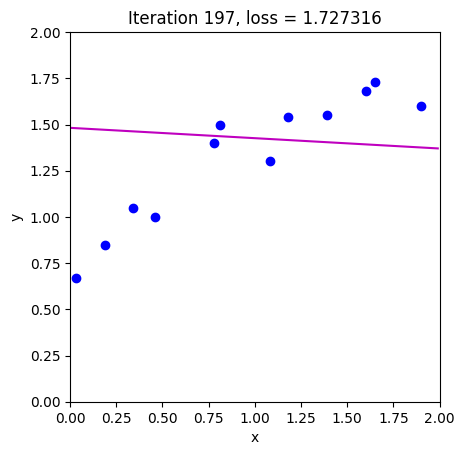

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.727316, b34.115805, c131.819143, d300.796883
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.727316, b5.266274, c16.062436, d34.115805
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.727316, b2.100612, c3.280265, d5.266274
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.727316, b1.762153, c1.886585, d2.100612
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.727316, b1.728973, c1.740586, d1.762153
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.727316, b1.726762, c1.727315, d1.728973
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.727316, b1.726824, c1.726824, d1.727315
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.726824, b1.726769, c1.726933, d1.727315
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.726824, b1.726763, c1.726799, d1.726933
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.726824, b1.726773, c1.726765, d1.726799
alfa 0.000144
before slope phi0:1.482066, phi1: -0.055955
after slope phi0:1.481698, phi1: -0.055611


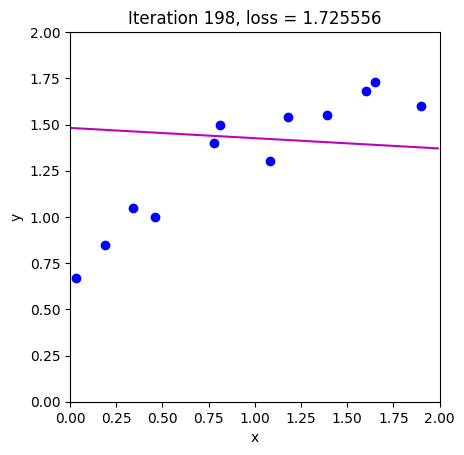

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.725556, b34.115049, c131.819391, d300.798166
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.725556, b5.264848, c16.061345, d34.115049
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.725556, b2.098964, c3.278728, d5.264848
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.725556, b1.760430, c1.884899, d2.098964
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.725556, b1.727225, c1.738850, d1.760430
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.725556, b1.725006, c1.725563, d1.727225
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.725556, b1.725066, c1.725069, d1.725563
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.725556, b1.725175, c1.725013, d1.725069
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.725175, b1.725042, c1.725007, d1.725069
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.725042, b1.725008, c1.725017, d1.725069
alfa 0.000127
before slope phi0:1.481698, phi1: -0.055611
after slope phi0:1.481373, phi1: -0.055307


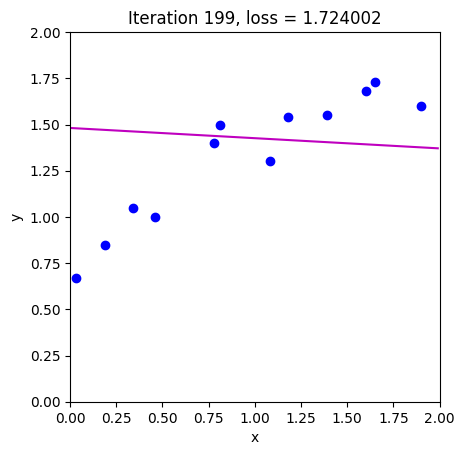

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.724002, b34.114376, c131.819600, d300.799283
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.724002, b5.263588, c16.060379, d34.114376
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.724002, b2.097508, c3.277369, d5.263588
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.724002, b1.758908, c1.883410, d2.097508
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.724002, b1.725682, c1.737318, d1.758908
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.724002, b1.723456, c1.724016, d1.725682
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.724002, b1.723515, c1.723520, d1.724016
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.724002, b1.723622, c1.723462, d1.723520
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.723622, b1.723491, c1.723457, d1.723520
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.723491, b1.723457, c1.723467, d1.723520
alfa 0.000127
before slope phi0:1.481373, phi1: -0.055307
after slope phi0:1.481048, phi1: -0.055003


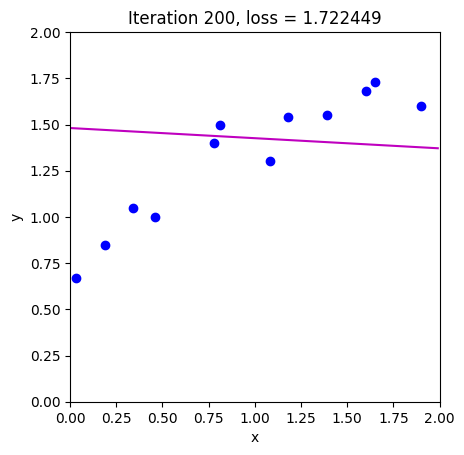

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.722449, b34.113700, c131.819800, d300.800386
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.722449, b5.262327, c16.059411, d34.113700
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.722449, b2.096052, c3.276012, d5.262327
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.722449, b1.757389, c1.881923, d2.096052
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.722449, b1.724141, c1.735787, d1.757389
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.722449, b1.721907, c1.722471, d1.724141
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.722449, b1.721965, c1.721972, d1.722471
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.722449, b1.722072, c1.721913, d1.721972
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.722072, b1.721941, c1.721908, d1.721972
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.721941, b1.721908, c1.721919, d1.721972
alfa 0.000127
before slope phi0:1.481048, phi1: -0.055003
after slope phi0:1.480723, phi1: -0.054700


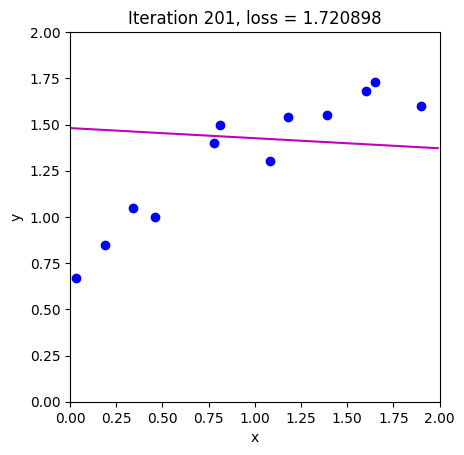

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.720898, b34.113020, c131.819992, d300.801475
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.720898, b5.261067, c16.058441, d34.113020
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.720898, b2.094598, c3.274655, d5.261067
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.720898, b1.755870, c1.880437, d2.094598
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.720898, b1.722601, c1.734258, d1.755870
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.720898, b1.720360, c1.720927, d1.722601
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.720898, b1.720416, c1.720426, d1.720927
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.720898, b1.720522, c1.720365, d1.720426
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.720522, b1.720393, c1.720361, d1.720426
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.720393, b1.720361, c1.720372, d1.720426
alfa 0.000127
before slope phi0:1.480723, phi1: -0.054700
after slope phi0:1.480399, phi1: -0.054397


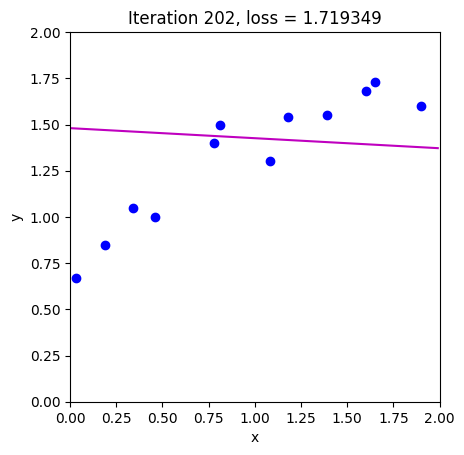

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.719349, b34.112337, c131.820175, d300.802550
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.719349, b5.259806, c16.057469, d34.112337
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.719349, b2.093145, c3.273298, d5.259806
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.719349, b1.754353, c1.878952, d2.093145
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.719349, b1.721062, c1.732730, d1.754353
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.719349, b1.718814, c1.719385, d1.721062
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.719349, b1.718870, c1.718882, d1.719385
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.719349, b1.718975, c1.718819, d1.718882
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.718975, b1.718847, c1.718816, d1.718882
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.718847, b1.718815, c1.718827, d1.718882
alfa 0.000127
before slope phi0:1.480399, phi1: -0.054397
after slope phi0:1.480074, phi1: -0.054094


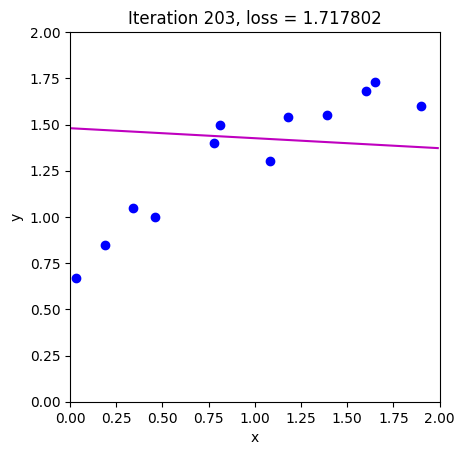

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.717802, b34.111651, c131.820349, d300.803612
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.717802, b5.258546, c16.056495, d34.111651
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.717802, b2.091694, c3.271942, d5.258546
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.717802, b1.752837, c1.877468, d2.091694
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.717802, b1.719525, c1.731204, d1.752837
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.717802, b1.717270, c1.717845, d1.719525
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.717802, b1.717324, c1.717339, d1.717845
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.717802, b1.717429, c1.717274, d1.717339
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.717429, b1.717302, c1.717272, d1.717339
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.717302, b1.717271, c1.717283, d1.717339
alfa 0.000127
before slope phi0:1.480074, phi1: -0.054094
after slope phi0:1.479749, phi1: -0.053791


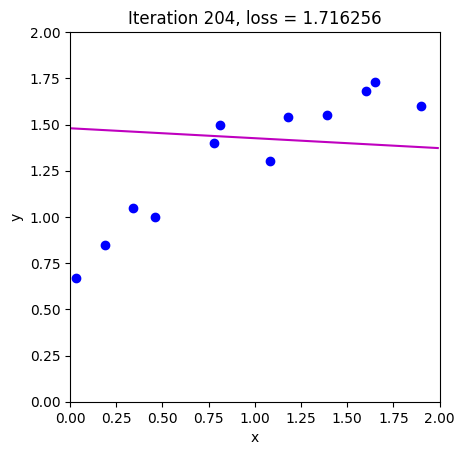

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.716256, b34.110960, c131.820515, d300.804659
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.716256, b5.257285, c16.055520, d34.110960
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.716256, b2.090243, c3.270586, d5.257285
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.716256, b1.751323, c1.875985, d2.090243
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.716256, b1.717990, c1.729679, d1.751323
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.716256, b1.715728, c1.716306, d1.717990
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.716256, b1.715781, c1.715797, d1.716306
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.716256, b1.715884, c1.715732, d1.715797
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.715884, b1.715758, c1.715729, d1.715797
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.715758, b1.715728, c1.715741, d1.715797
alfa 0.000127
before slope phi0:1.479749, phi1: -0.053791
after slope phi0:1.479425, phi1: -0.053488


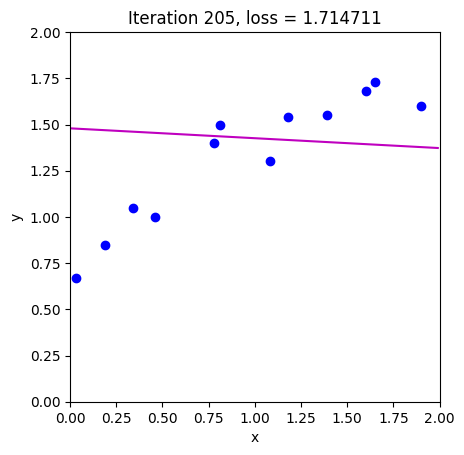

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.714711, b34.110267, c131.820672, d300.805693
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.714711, b5.256024, c16.054543, d34.110267
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.714711, b2.088793, c3.269230, d5.256024
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.714711, b1.749810, c1.874504, d2.088793
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.714711, b1.716456, c1.728155, d1.749810
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.714711, b1.714187, c1.714768, d1.716456
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.714711, b1.714239, c1.714258, d1.714768
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.714711, b1.714341, c1.714190, d1.714258
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.714341, b1.714216, c1.714188, d1.714258
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.714216, b1.714187, c1.714201, d1.714258
alfa 0.000127
before slope phi0:1.479425, phi1: -0.053488
after slope phi0:1.479100, phi1: -0.053186


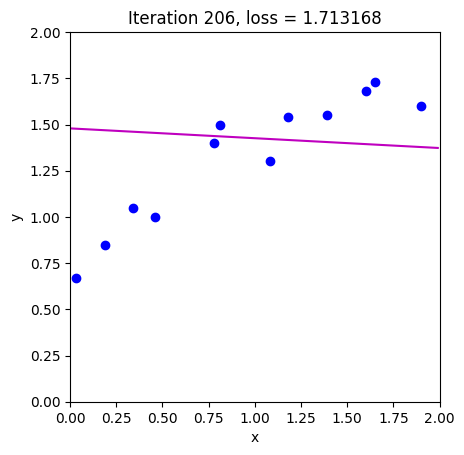

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.713168, b34.109570, c131.820821, d300.806713
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.713168, b5.254763, c16.053564, d34.109570
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.713168, b2.087344, c3.267876, d5.254763
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.713168, b1.748298, c1.873024, d2.087344
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.713168, b1.714923, c1.726633, d1.748298
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.713168, b1.712647, c1.713232, d1.714923
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.713168, b1.712698, c1.712719, d1.713232
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.713168, b1.712800, c1.712650, d1.712719
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.712800, b1.712676, c1.712649, d1.712719
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.712676, b1.712647, c1.712662, d1.712719
alfa 0.000127
before slope phi0:1.479100, phi1: -0.053186
after slope phi0:1.478776, phi1: -0.052884


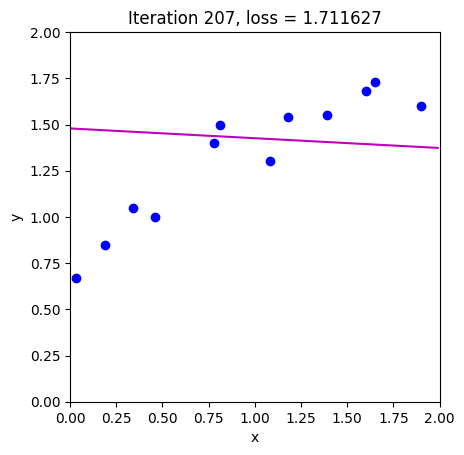

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.711627, b34.108869, c131.820961, d300.807720
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.711627, b5.253502, c16.052583, d34.108869
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.711627, b2.085896, c3.266521, d5.253502
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.711627, b1.746788, c1.871545, d2.085896
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.711627, b1.713392, c1.725113, d1.746788
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.711627, b1.711109, c1.711698, d1.713392
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.711627, b1.711159, c1.711183, d1.711698
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.711627, b1.711260, c1.711112, d1.711183
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.711260, b1.711137, c1.711111, d1.711183
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.711137, b1.711109, c1.711124, d1.711183
alfa 0.000127
before slope phi0:1.478776, phi1: -0.052884
after slope phi0:1.478452, phi1: -0.052582


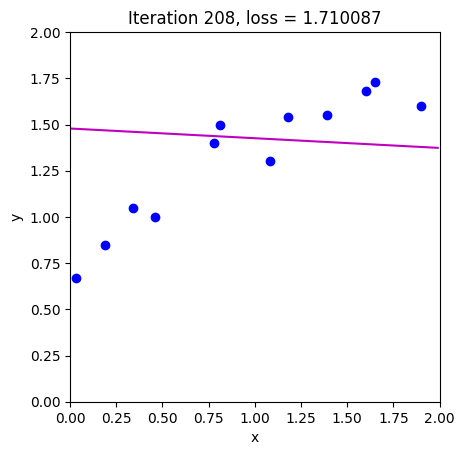

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.710087, b34.108166, c131.821093, d300.808714
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.710087, b5.252241, c16.051601, d34.108166
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.710087, b2.084449, c3.265167, d5.252241
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.710087, b1.745280, c1.870067, d2.084449
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.710087, b1.711863, c1.723594, d1.745280
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.710087, b1.709573, c1.710165, d1.711863
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.710087, b1.709622, c1.709648, d1.710165
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.710087, b1.709722, c1.709576, d1.709648
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.709722, b1.709600, c1.709575, d1.709648
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.709600, b1.709573, c1.709589, d1.709648
alfa 0.000127
before slope phi0:1.478452, phi1: -0.052582
after slope phi0:1.478128, phi1: -0.052280


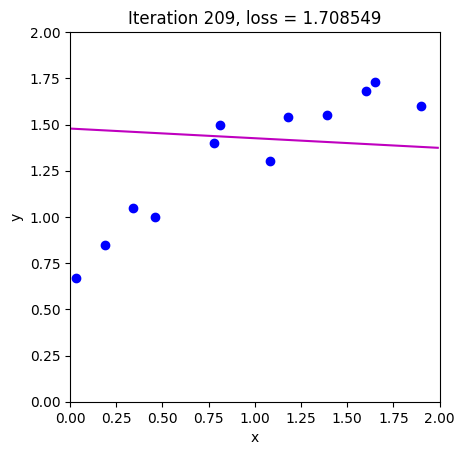

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.708549, b34.107459, c131.821217, d300.809694
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.708549, b5.250980, c16.050617, d34.107459
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.708549, b2.083003, c3.263814, d5.250980
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.708549, b1.743772, c1.868590, d2.083003
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.708549, b1.710335, c1.722076, d1.743772
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.708549, b1.708039, c1.708634, d1.710335
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.708549, b1.708086, c1.708114, d1.708634
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.708549, b1.708186, c1.708041, d1.708114
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.708186, b1.708065, c1.708041, d1.708114
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.708065, b1.708038, c1.708054, d1.708114
alfa 0.000127
before slope phi0:1.478128, phi1: -0.052280
after slope phi0:1.477804, phi1: -0.051978


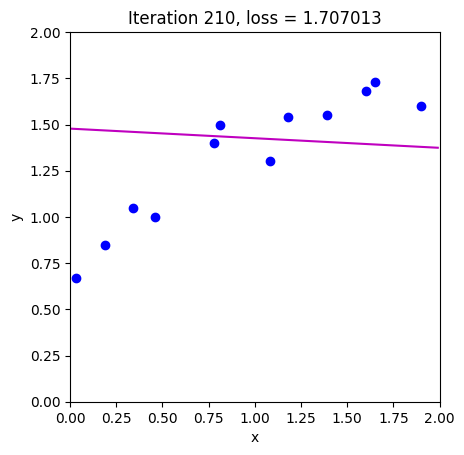

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.707013, b34.106748, c131.821333, d300.810661
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.707013, b5.249719, c16.049631, d34.106748
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.707013, b2.081559, c3.262461, d5.249719
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.707013, b1.742266, c1.867115, d2.081559
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.707013, b1.708809, c1.720560, d1.742266
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.707013, b1.706505, c1.707104, d1.708809
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.707013, b1.706552, c1.706582, d1.707104
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.707013, b1.706651, c1.706507, d1.706582
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.706651, b1.706531, c1.706508, d1.706582
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.706531, b1.706505, c1.706522, d1.706582
alfa 0.000127
before slope phi0:1.477804, phi1: -0.051978
after slope phi0:1.477480, phi1: -0.051677


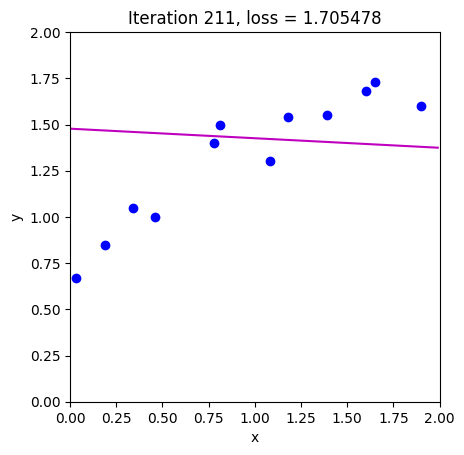

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.705478, b34.106035, c131.821441, d300.811615
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.705478, b5.248458, c16.048644, d34.106035
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.705478, b2.080115, c3.261108, d5.248458
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.705478, b1.740762, c1.865641, d2.080115
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.705478, b1.707284, c1.719045, d1.740762
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.705478, b1.704974, c1.705576, d1.707284
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.705478, b1.705019, c1.705052, d1.705576
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.705478, b1.705117, c1.704975, d1.705052
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.705117, b1.704998, c1.704976, d1.705052
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.704998, b1.704973, c1.704991, d1.705052
alfa 0.000127
before slope phi0:1.477480, phi1: -0.051677
after slope phi0:1.477157, phi1: -0.051376


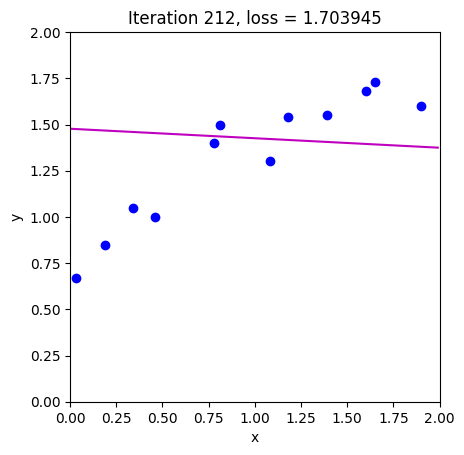

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.703945, b34.105318, c131.821540, d300.812555
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.703945, b5.247197, c16.047655, d34.105318
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.703945, b2.078672, c3.259757, d5.247197
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.703945, b1.739259, c1.864168, d2.078672
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.703945, b1.705761, c1.717532, d1.739259
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.703945, b1.703444, c1.704049, d1.705761
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.703945, b1.703488, c1.703523, d1.704049
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.703945, b1.703585, c1.703445, d1.703523
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.703585, b1.703467, c1.703447, d1.703523
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.703467, b1.703443, c1.703461, d1.703523
alfa 0.000127
before slope phi0:1.477157, phi1: -0.051376
after slope phi0:1.476833, phi1: -0.051075


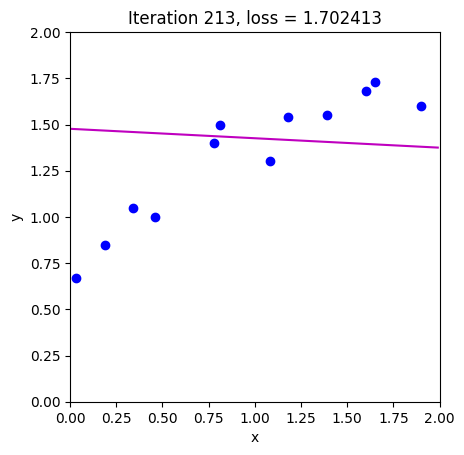

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.702413, b34.104598, c131.821632, d300.813483
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.702413, b5.245936, c16.046664, d34.104598
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.702413, b2.077231, c3.258405, d5.245936
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.702413, b1.737757, c1.862696, d2.077231
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.702413, b1.704239, c1.716021, d1.737757
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.702413, b1.701915, c1.702524, d1.704239
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.702413, b1.701958, c1.701995, d1.702524
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.702413, b1.702055, c1.701916, d1.701995
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.702055, b1.701938, c1.701918, d1.701995
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.701938, b1.701914, c1.701933, d1.701995
alfa 0.000127
before slope phi0:1.476833, phi1: -0.051075
after slope phi0:1.476510, phi1: -0.050774


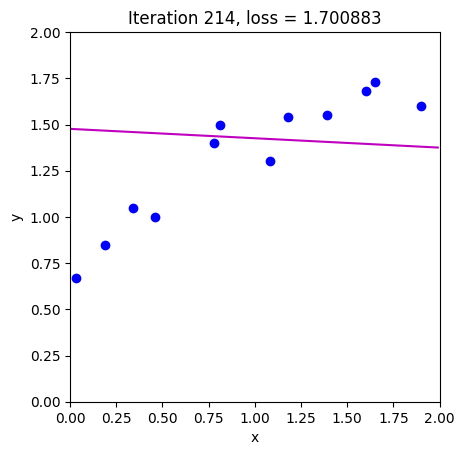

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.700883, b34.103874, c131.821716, d300.814398
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.700883, b5.244674, c16.045672, d34.103874
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.700883, b2.075790, c3.257054, d5.244674
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.700883, b1.736257, c1.861226, d2.075790
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.700883, b1.702719, c1.714510, d1.736257
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.700883, b1.700389, c1.701001, d1.702719
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.700883, b1.700430, c1.700470, d1.701001
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.700883, b1.700526, c1.700389, d1.700470
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.700526, b1.700410, c1.700391, d1.700470
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.700410, b1.700387, c1.700407, d1.700470
alfa 0.000127
before slope phi0:1.476510, phi1: -0.050774
after slope phi0:1.476186, phi1: -0.050474


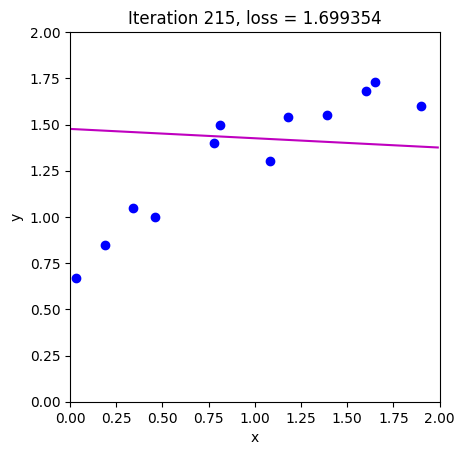

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.699354, b34.103148, c131.821791, d300.815301
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.699354, b5.243413, c16.044678, d34.103148
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.699354, b2.074351, c3.255704, d5.243413
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.699354, b1.734758, c1.859757, d2.074351
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.699354, b1.701200, c1.713001, d1.734758
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.699354, b1.698863, c1.699479, d1.701200
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.699354, b1.698904, c1.698945, d1.699479
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.699354, b1.698999, c1.698863, d1.698945
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.698999, b1.698884, c1.698866, d1.698945
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.698884, b1.698861, c1.698882, d1.698945
alfa 0.000127
before slope phi0:1.476186, phi1: -0.050474
after slope phi0:1.475863, phi1: -0.050174


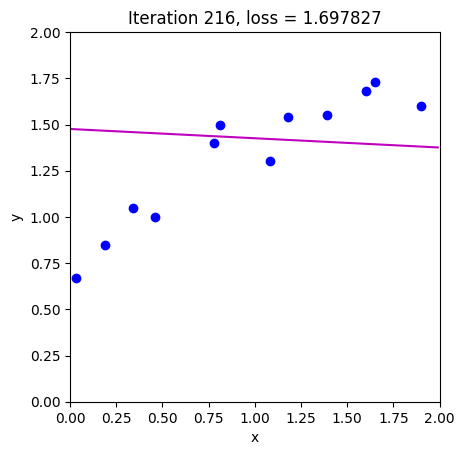

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.697827, b34.102418, c131.821859, d300.816190
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.697827, b5.242152, c16.043682, d34.102418
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.697827, b2.072912, c3.254354, d5.242152
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.697827, b1.733260, c1.858289, d2.072912
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.697827, b1.699683, c1.711494, d1.733260
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.697827, b1.697339, c1.697958, d1.699683
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.697827, b1.697379, c1.697423, d1.697958
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.697827, b1.697474, c1.697339, d1.697423
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.697474, b1.697360, c1.697343, d1.697423
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.697360, b1.697338, c1.697359, d1.697423
alfa 0.000127
before slope phi0:1.475863, phi1: -0.050174
after slope phi0:1.475540, phi1: -0.049874


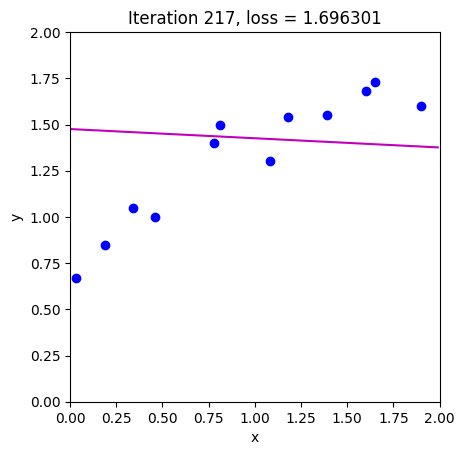

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.696301, b34.101686, c131.821920, d300.817067
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.696301, b5.240891, c16.042685, d34.101686
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.696301, b2.071475, c3.253005, d5.240891
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.696301, b1.731764, c1.856822, d2.071475
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.696301, b1.698167, c1.709988, d1.731764
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.696301, b1.695817, c1.696439, d1.698167
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.696301, b1.695856, c1.695902, d1.696439
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.696301, b1.695950, c1.695816, d1.695902
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.695950, b1.695837, c1.695821, d1.695902
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.695837, b1.695815, c1.695837, d1.695902
alfa 0.000127
before slope phi0:1.475540, phi1: -0.049874
after slope phi0:1.475217, phi1: -0.049574


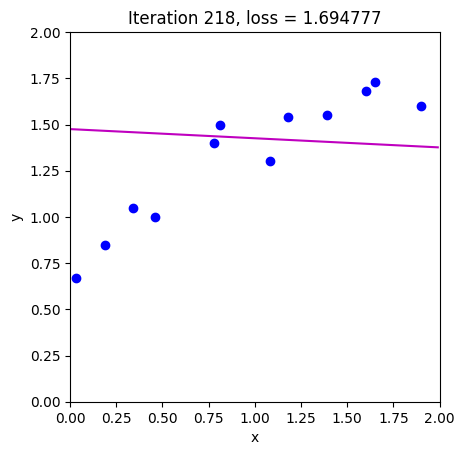

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.694777, b34.100950, c131.821972, d300.817932
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.694777, b5.239629, c16.041687, d34.100950
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.694777, b2.070039, c3.251656, d5.239629
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.694777, b1.730269, c1.855356, d2.070039
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.694777, b1.696653, c1.708484, d1.730269
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.694777, b1.694297, c1.694922, d1.696653
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.694777, b1.694334, c1.694382, d1.694922
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.694777, b1.694427, c1.694295, d1.694382
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.694427, b1.694315, c1.694300, d1.694382
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.694315, b1.694294, c1.694317, d1.694382
alfa 0.000127
before slope phi0:1.475217, phi1: -0.049574
after slope phi0:1.474894, phi1: -0.049274


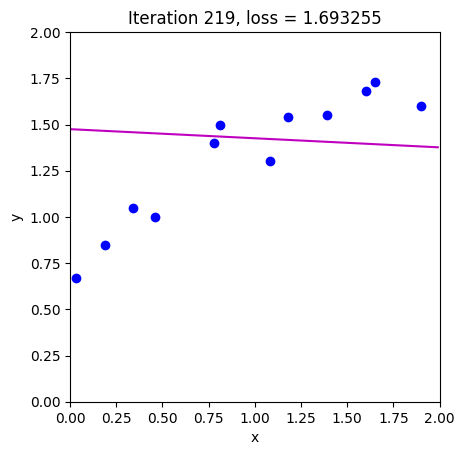

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.693255, b34.100211, c131.822017, d300.818784
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.693255, b5.238368, c16.040687, d34.100211
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.693255, b2.068603, c3.250308, d5.238368
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.693255, b1.728776, c1.853892, d2.068603
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.693255, b1.695140, c1.706981, d1.728776
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.693255, b1.692777, c1.693406, d1.695140
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.693255, b1.692814, c1.692864, d1.693406
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.693255, b1.692906, c1.692776, d1.692864
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.692906, b1.692795, c1.692781, d1.692864
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.692795, b1.692775, c1.692798, d1.692864
alfa 0.000127
before slope phi0:1.474894, phi1: -0.049274
after slope phi0:1.474571, phi1: -0.048975


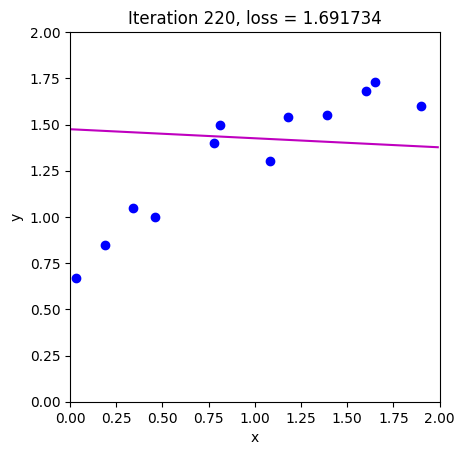

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.691734, b34.099469, c131.822054, d300.819624
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.691734, b5.237107, c16.039686, d34.099469
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.691734, b2.067169, c3.248960, d5.237107
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.691734, b1.727284, c1.852429, d2.067169
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.691734, b1.693629, c1.705479, d1.727284
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.691734, b1.691260, c1.691891, d1.693629
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.691734, b1.691295, c1.691347, d1.691891
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.691734, b1.691387, c1.691258, d1.691347
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.691387, b1.691277, c1.691263, d1.691347
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.691277, b1.691257, c1.691281, d1.691347
alfa 0.000127
before slope phi0:1.474571, phi1: -0.048975
after slope phi0:1.474249, phi1: -0.048676


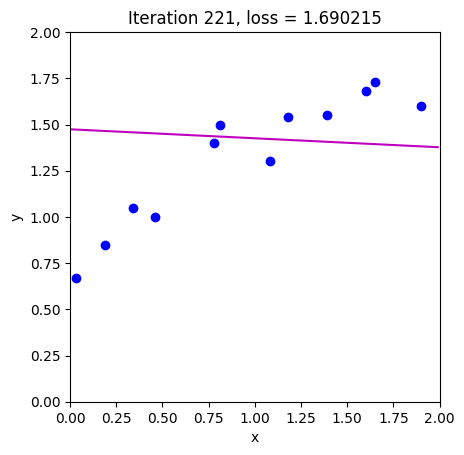

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.690215, b34.098725, c131.822084, d300.820451
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.690215, b5.235846, c16.038683, d34.098725
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.690215, b2.065736, c3.247613, d5.235846
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.690215, b1.725794, c1.850967, d2.065736
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.690215, b1.692120, c1.703979, d1.725794
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.690215, b1.689744, c1.690379, d1.692120
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.690215, b1.689778, c1.689832, d1.690379
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.690215, b1.689869, c1.689742, d1.689832
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.689869, b1.689760, c1.689748, d1.689832
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.689760, b1.689741, c1.689765, d1.689832
alfa 0.000127
before slope phi0:1.474249, phi1: -0.048676
after slope phi0:1.473926, phi1: -0.048377


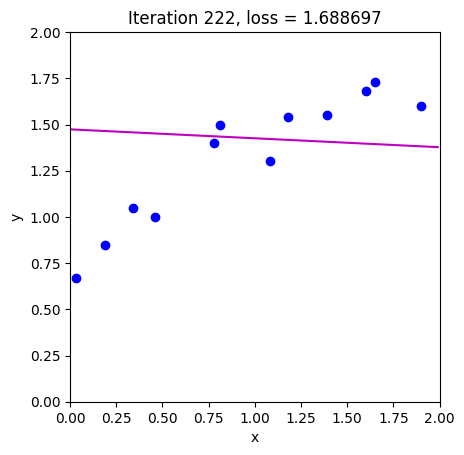

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.688697, b34.097977, c131.822106, d300.821267
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.688697, b5.234585, c16.037678, d34.097977
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.688697, b2.064304, c3.246266, d5.234585
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.688697, b1.724304, c1.849507, d2.064304
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.688697, b1.690611, c1.702480, d1.724304
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.688697, b1.688229, c1.688867, d1.690611
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.688697, b1.688262, c1.688319, d1.688867
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.688697, b1.688353, c1.688227, d1.688319
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.688353, b1.688244, c1.688233, d1.688319
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.688244, b1.688226, c1.688251, d1.688319
alfa 0.000127
before slope phi0:1.473926, phi1: -0.048377
after slope phi0:1.473604, phi1: -0.048078


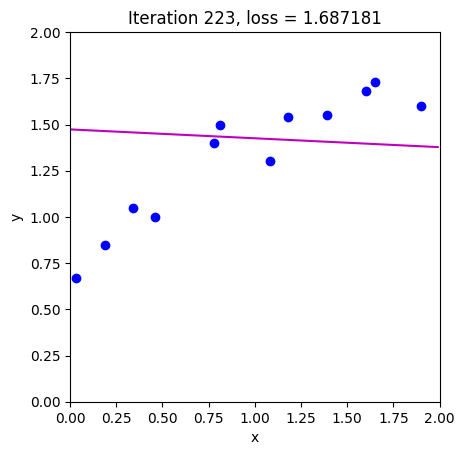

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.687181, b34.097226, c131.822121, d300.822070
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.687181, b5.233324, c16.036672, d34.097226
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.687181, b2.062873, c3.244920, d5.233324
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.687181, b1.722817, c1.848047, d2.062873
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.687181, b1.689105, c1.700983, d1.722817
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.687181, b1.686716, c1.687357, d1.689105
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.687181, b1.686748, c1.686807, d1.687357
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.687181, b1.686838, c1.686713, d1.686807
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.686838, b1.686731, c1.686720, d1.686807
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.686731, b1.686713, c1.686738, d1.686807
alfa 0.000127
before slope phi0:1.473604, phi1: -0.048078
after slope phi0:1.473281, phi1: -0.047779


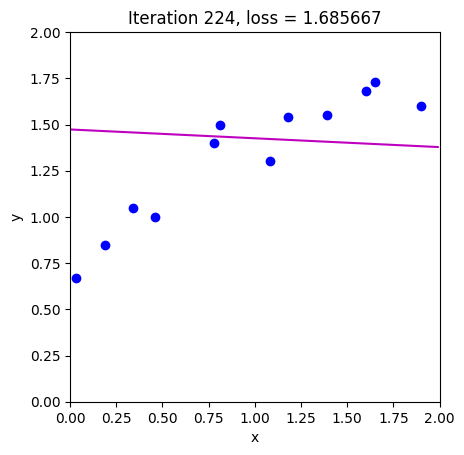

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.685667, b34.096473, c131.822128, d300.822862
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.685667, b5.232063, c16.035665, d34.096473
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.685667, b2.061443, c3.243575, d5.232063
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.685667, b1.721330, c1.846589, d2.061443
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.685667, b1.687600, c1.699487, d1.721330
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.685667, b1.685205, c1.685849, d1.687600
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.685667, b1.685236, c1.685297, d1.685849
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.685667, b1.685325, c1.685202, d1.685297
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.685325, b1.685218, c1.685209, d1.685297
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.685218, b1.685201, c1.685227, d1.685297
alfa 0.000127
before slope phi0:1.473281, phi1: -0.047779
after slope phi0:1.472959, phi1: -0.047481


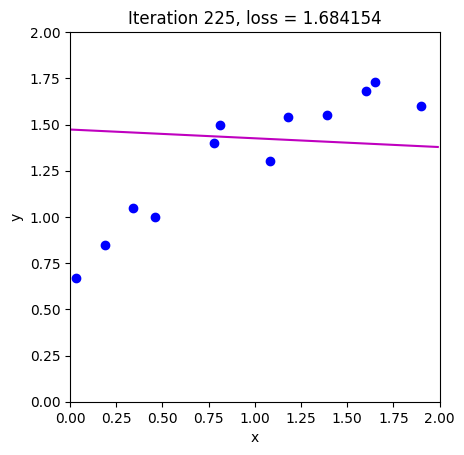

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.684154, b34.095716, c131.822128, d300.823641
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.684154, b5.230802, c16.034657, d34.095716
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.684154, b2.060014, c3.242230, d5.230802
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.684154, b1.719845, c1.845132, d2.060014
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.684154, b1.686096, c1.697993, d1.719845
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.684154, b1.683695, c1.684342, d1.686096
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.684154, b1.683725, c1.683788, d1.684342
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.684154, b1.683813, c1.683691, d1.683788
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.683813, b1.683708, c1.683699, d1.683788
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.683708, b1.683691, c1.683718, d1.683788
alfa 0.000127
before slope phi0:1.472959, phi1: -0.047481
after slope phi0:1.472637, phi1: -0.047183


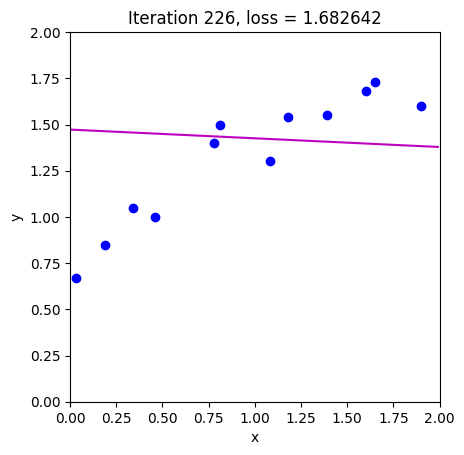

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.682642, b34.094957, c131.822121, d300.824409
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.682642, b5.229542, c16.033647, d34.094957
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.682642, b2.058586, c3.240886, d5.229542
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.682642, b1.718362, c1.843676, d2.058586
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.682642, b1.684594, c1.696500, d1.718362
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.682642, b1.682187, c1.682837, d1.684594
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.682642, b1.682216, c1.682281, d1.682837
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.682642, b1.682303, c1.682183, d1.682281
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.682303, b1.682199, c1.682191, d1.682281
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.682199, b1.682183, c1.682210, d1.682281
alfa 0.000127
before slope phi0:1.472637, phi1: -0.047183
after slope phi0:1.472315, phi1: -0.046885


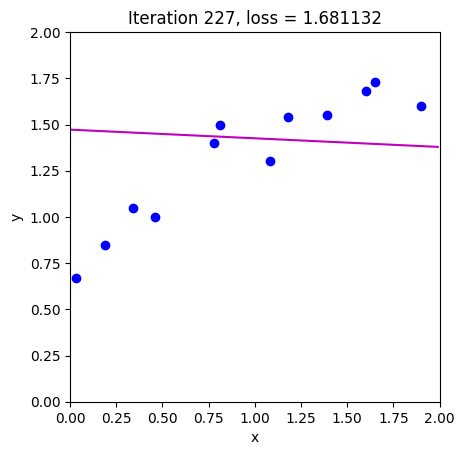

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.681132, b34.094195, c131.822107, d300.825165
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.681132, b5.228281, c16.032635, d34.094195
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.681132, b2.057159, c3.239542, d5.228281
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.681132, b1.716879, c1.842222, d2.057159
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.681132, b1.683093, c1.695009, d1.716879
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.681132, b1.680680, c1.681333, d1.683093
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.681132, b1.680708, c1.680775, d1.681333
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.681132, b1.680795, c1.680675, d1.680775
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.680795, b1.680691, c1.680684, d1.680775
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.680691, b1.680676, c1.680704, d1.680775
alfa 0.000127
before slope phi0:1.472315, phi1: -0.046885
after slope phi0:1.471994, phi1: -0.046587


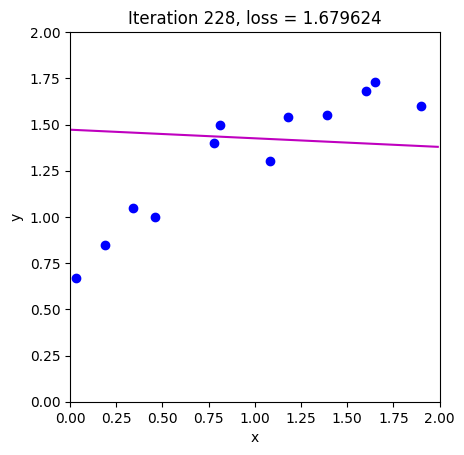

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.679624, b34.093430, c131.822085, d300.825909
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.679624, b5.227020, c16.031622, d34.093430
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.679624, b2.055733, c3.238199, d5.227020
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.679624, b1.715399, c1.840768, d2.055733
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.679624, b1.681594, c1.693519, d1.715399
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.679624, b1.679175, c1.679831, d1.681594
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.679624, b1.679201, c1.679270, d1.679831
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.679624, b1.679288, c1.679170, d1.679270
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.679288, b1.679185, c1.679179, d1.679270
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.679185, b1.679170, c1.679199, d1.679270
alfa 0.000127
before slope phi0:1.471994, phi1: -0.046587
after slope phi0:1.471672, phi1: -0.046289


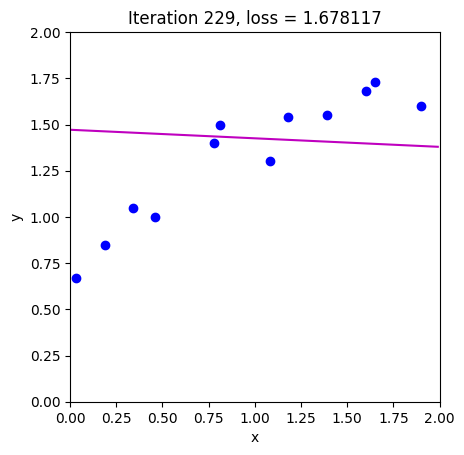

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.678117, b34.092662, c131.822056, d300.826642
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.678117, b5.225760, c16.030608, d34.092662
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.678117, b2.054309, c3.236856, d5.225760
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.678117, b1.713919, c1.839316, d2.054309
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.678117, b1.680096, c1.692030, d1.713919
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.678117, b1.677671, c1.678330, d1.680096
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.678117, b1.677697, c1.677768, d1.678330
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.678117, b1.677782, c1.677666, d1.677768
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.677782, b1.677680, c1.677675, d1.677768
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.677680, b1.677666, c1.677695, d1.677768
alfa 0.000127
before slope phi0:1.471672, phi1: -0.046289
after slope phi0:1.471350, phi1: -0.045992


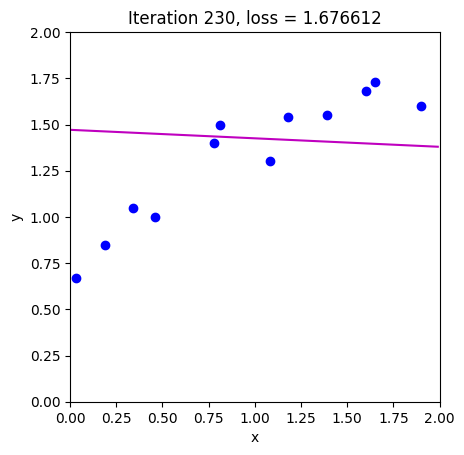

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.676612, b34.091892, c131.822021, d300.827364
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.676612, b5.224500, c16.029593, d34.091892
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.676612, b2.052885, c3.235514, d5.224500
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.676612, b1.712441, c1.837866, d2.052885
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.676612, b1.678600, c1.690543, d1.712441
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.676612, b1.676169, c1.676831, d1.678600
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.676612, b1.676193, c1.676267, d1.676831
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.676612, b1.676278, c1.676163, d1.676267
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.676278, b1.676177, c1.676173, d1.676267
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.676177, b1.676164, c1.676194, d1.676267
alfa 0.000127
before slope phi0:1.471350, phi1: -0.045992
after slope phi0:1.471029, phi1: -0.045695


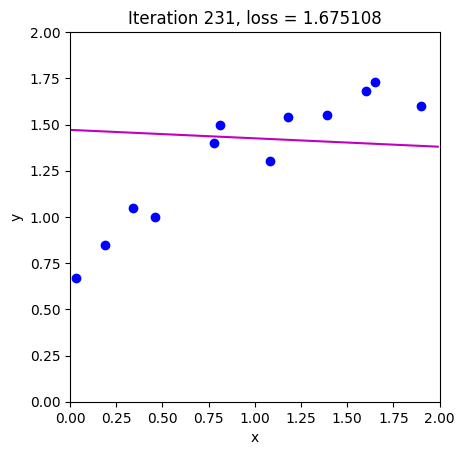

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.675108, b34.091118, c131.821978, d300.828074
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.675108, b5.223239, c16.028576, d34.091118
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.675108, b2.051462, c3.234173, d5.223239
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.675108, b1.710965, c1.836416, d2.051462
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.675108, b1.677105, c1.689057, d1.710965
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.675108, b1.674668, c1.675334, d1.677105
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.675108, b1.674692, c1.674767, d1.675334
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.675108, b1.674776, c1.674662, d1.674767
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.674776, b1.674676, c1.674673, d1.674767
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.674676, b1.674663, c1.674693, d1.674767
alfa 0.000127
before slope phi0:1.471029, phi1: -0.045695
after slope phi0:1.470707, phi1: -0.045398


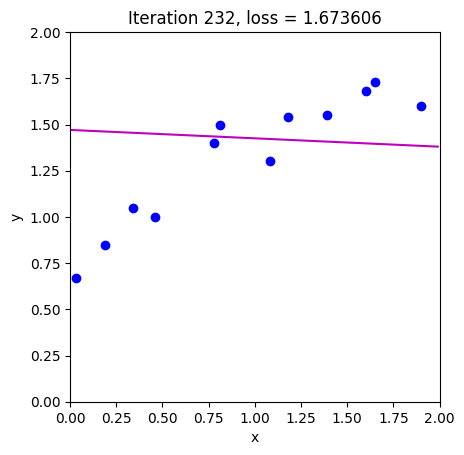

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.673606, b34.090343, c131.821928, d300.828772
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.673606, b5.221979, c16.027558, d34.090343
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.673606, b2.050041, c3.232832, d5.221979
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.673606, b1.709489, c1.834968, d2.050041
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.673606, b1.675612, c1.687573, d1.709489
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.673606, b1.673169, c1.673837, d1.675612
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.673606, b1.673192, c1.673269, d1.673837
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.673606, b1.673275, c1.673163, d1.673269
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.673275, b1.673176, c1.673174, d1.673269
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.673176, b1.673164, c1.673195, d1.673269
alfa 0.000127
before slope phi0:1.470707, phi1: -0.045398
after slope phi0:1.470386, phi1: -0.045101


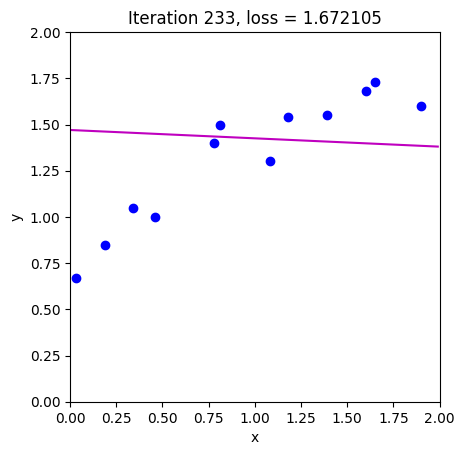

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.672105, b34.089564, c131.821872, d300.829460
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.672105, b5.220719, c16.026539, d34.089564
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.672105, b2.048621, c3.231492, d5.220719
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.672105, b1.708015, c1.833520, d2.048621
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.672105, b1.674120, c1.686090, d1.708015
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.672105, b1.671671, c1.672343, d1.674120
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.672105, b1.671693, c1.671772, d1.672343
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.672105, b1.671776, c1.671665, d1.671772
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.671776, b1.671677, c1.671676, d1.671772
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.671677, b1.671666, c1.671697, d1.671772
alfa 0.000127
before slope phi0:1.470386, phi1: -0.045101
after slope phi0:1.470065, phi1: -0.044804


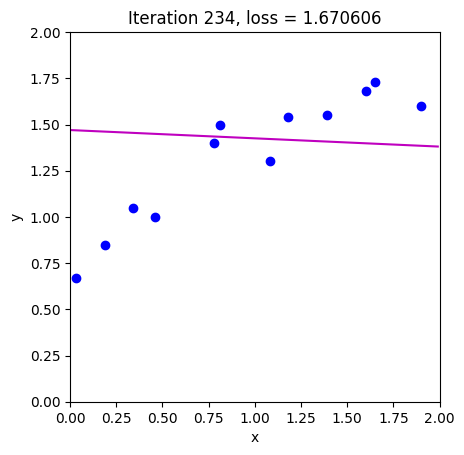

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.670606, b34.088783, c131.821809, d300.830136
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.670606, b5.219460, c16.025518, d34.088783
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.670606, b2.047201, c3.230152, d5.219460
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.670606, b1.706543, c1.832075, d2.047201
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.670606, b1.672630, c1.684609, d1.706543
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.670606, b1.670175, c1.670849, d1.672630
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.670606, b1.670196, c1.670277, d1.670849
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.670606, b1.670278, c1.670168, d1.670277
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.670278, b1.670180, c1.670180, d1.670277
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.670180, b1.670169, c1.670202, d1.670277
alfa 0.000127
before slope phi0:1.470065, phi1: -0.044804
after slope phi0:1.469744, phi1: -0.044508


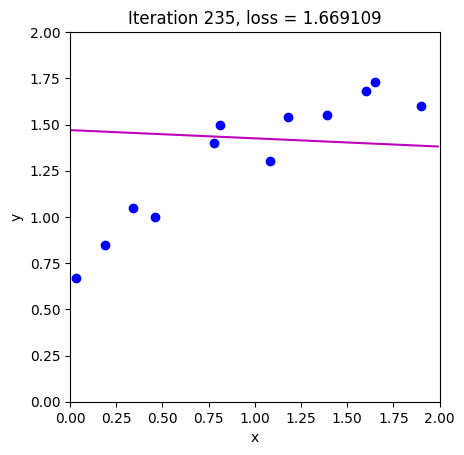

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.669109, b34.087999, c131.821738, d300.830801
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.669109, b5.218200, c16.024497, d34.087999
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.669109, b2.045783, c3.228813, d5.218200
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.669109, b1.705072, c1.830630, d2.045783
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.669109, b1.671141, c1.683129, d1.705072
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.669109, b1.668680, c1.669358, d1.671141
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.669109, b1.668700, c1.668783, d1.669358
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.669109, b1.668782, c1.668673, d1.668783
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.668782, b1.668685, c1.668686, d1.668783
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.668782, b1.668707, c1.668674, d1.668686
alfa 0.000114
before slope phi0:1.469744, phi1: -0.044508
after slope phi0:1.469457, phi1: -0.044243


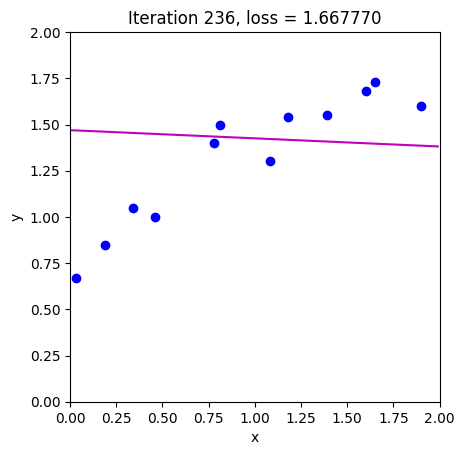

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.667770, b34.087295, c131.821670, d300.831386
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.667770, b5.217073, c16.023581, d34.087295
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.667770, b2.044515, c3.227616, d5.217073
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.667770, b1.703757, c1.829338, d2.044515
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.667770, b1.669811, c1.681806, d1.703757
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.667770, b1.667344, c1.668024, d1.669811
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.667770, b1.667363, c1.667448, d1.668024
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.667770, b1.667444, c1.667337, d1.667448
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.667444, b1.667348, c1.667350, d1.667448
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.667444, b1.667370, c1.667338, d1.667350
alfa 0.000114
before slope phi0:1.469457, phi1: -0.044243
after slope phi0:1.469170, phi1: -0.043978


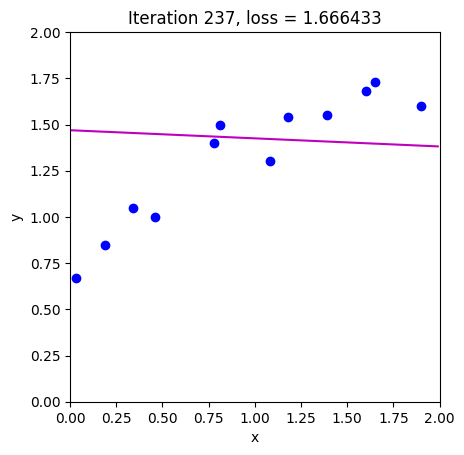

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.666433, b34.086589, c131.821595, d300.831963
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.666433, b5.215946, c16.022665, d34.086589
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.666433, b2.043248, c3.226419, d5.215946
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.666433, b1.702443, c1.828048, d2.043248
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.666433, b1.668481, c1.680484, d1.702443
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.666433, b1.666010, c1.666692, d1.668481
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.666433, b1.666028, c1.666114, d1.666692
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.666433, b1.666108, c1.666002, d1.666114
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.666108, b1.666013, c1.666015, d1.666114
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.666108, b1.666034, c1.666003, d1.666015
alfa 0.000114
before slope phi0:1.469170, phi1: -0.043978
after slope phi0:1.468883, phi1: -0.043713


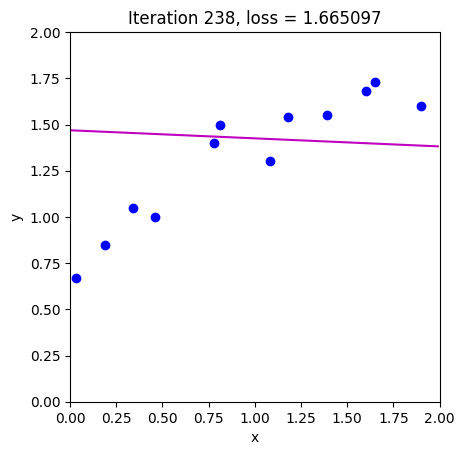

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.665097, b34.085882, c131.821516, d300.832531
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.665097, b5.214820, c16.021748, d34.085882
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.665097, b2.041982, c3.225222, d5.214820
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.665097, b1.701130, c1.826758, d2.041982
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.665097, b1.667153, c1.679164, d1.701130
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.665097, b1.664676, c1.665361, d1.667153
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.665097, b1.664693, c1.664782, d1.665361
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.665097, b1.664773, c1.664668, d1.664782
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.664773, b1.664679, c1.664682, d1.664782
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.664773, b1.664699, c1.664669, d1.664682
alfa 0.000114
before slope phi0:1.468883, phi1: -0.043713
after slope phi0:1.468596, phi1: -0.043449


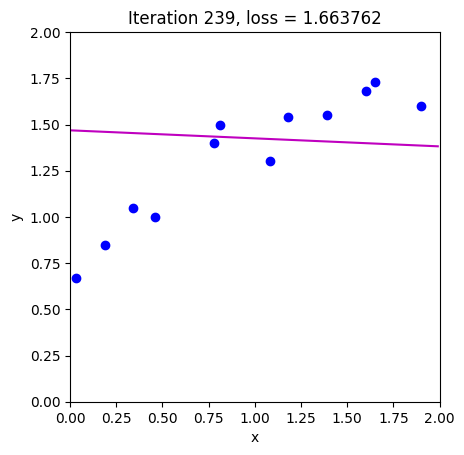

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.663762, b34.085172, c131.821431, d300.833090
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.663762, b5.213693, c16.020830, d34.085172
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.663762, b2.040716, c3.224026, d5.213693
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.663762, b1.699818, c1.825470, d2.040716
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.663762, b1.665826, c1.677844, d1.699818
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.663762, b1.663344, c1.664032, d1.665826
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.663762, b1.663360, c1.663450, d1.664032
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.663762, b1.663439, c1.663335, d1.663450
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.663439, b1.663346, c1.663349, d1.663450
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.663439, b1.663366, c1.663336, d1.663349
alfa 0.000114
before slope phi0:1.468596, phi1: -0.043449
after slope phi0:1.468310, phi1: -0.043185


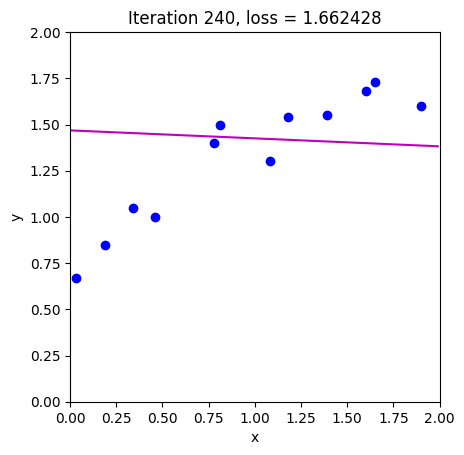

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.662428, b34.084460, c131.821341, d300.833641
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.662428, b5.212567, c16.019911, d34.084460
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.662428, b2.039451, c3.222831, d5.212567
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.662428, b1.698507, c1.824182, d2.039451
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.662428, b1.664500, c1.676526, d1.698507
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.662428, b1.662013, c1.662703, d1.664500
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.662428, b1.662028, c1.662120, d1.662703
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.662428, b1.662107, c1.662004, d1.662120
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.662107, b1.662014, c1.662018, d1.662120
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.662107, b1.662034, c1.662005, d1.662018
alfa 0.000114
before slope phi0:1.468310, phi1: -0.043185
after slope phi0:1.468023, phi1: -0.042920


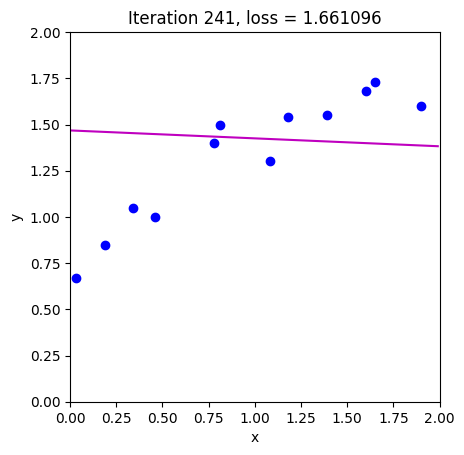

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.661096, b34.083746, c131.821246, d300.834183
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.661096, b5.211440, c16.018990, d34.083746
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.661096, b2.038188, c3.221636, d5.211440
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.661096, b1.697198, c1.822895, d2.038188
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.661096, b1.663175, c1.675209, d1.697198
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.661096, b1.660683, c1.661376, d1.663175
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.661096, b1.660697, c1.660791, d1.661376
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.661096, b1.660776, c1.660674, d1.660791
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.660776, b1.660684, c1.660689, d1.660791
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.660776, b1.660703, c1.660674, d1.660689
alfa 0.000114
before slope phi0:1.468023, phi1: -0.042920
after slope phi0:1.467736, phi1: -0.042656


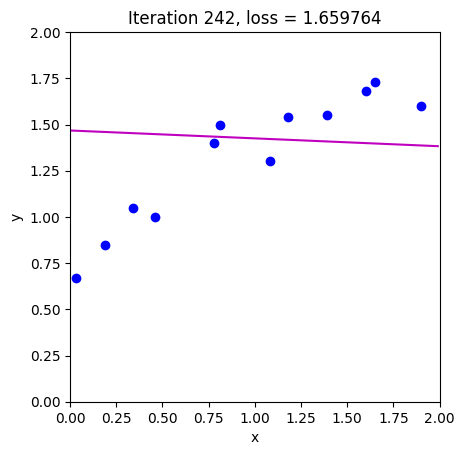

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.659764, b34.083030, c131.821145, d300.834716
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.659764, b5.210314, c16.018070, d34.083030
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.659764, b2.036925, c3.220441, d5.210314
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.659764, b1.695889, c1.821610, d2.036925
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.659764, b1.661851, c1.673893, d1.695889
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.659764, b1.659354, c1.660049, d1.661851
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.659764, b1.659368, c1.659463, d1.660049
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.659764, b1.659445, c1.659345, d1.659463
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.659445, b1.659354, c1.659360, d1.659463
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.659445, b1.659374, c1.659345, d1.659360
alfa 0.000114
before slope phi0:1.467736, phi1: -0.042656
after slope phi0:1.467450, phi1: -0.042392


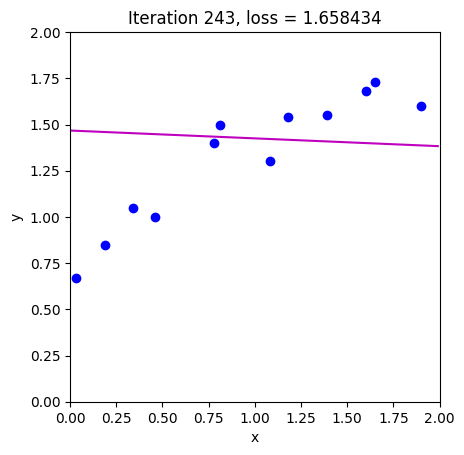

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.658434, b34.082312, c131.821040, d300.835242
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.658434, b5.209188, c16.017148, d34.082312
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.658434, b2.035663, c3.219248, d5.209188
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.658434, b1.694582, c1.820325, d2.035663
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.658434, b1.660529, c1.672578, d1.694582
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.658434, b1.658026, c1.658725, d1.660529
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.658434, b1.658040, c1.658136, d1.658725
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.658434, b1.658117, c1.658017, d1.658136
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.658117, b1.658026, c1.658033, d1.658136
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.658117, b1.658045, c1.658017, d1.658033
alfa 0.000114
before slope phi0:1.467450, phi1: -0.042392
after slope phi0:1.467164, phi1: -0.042129


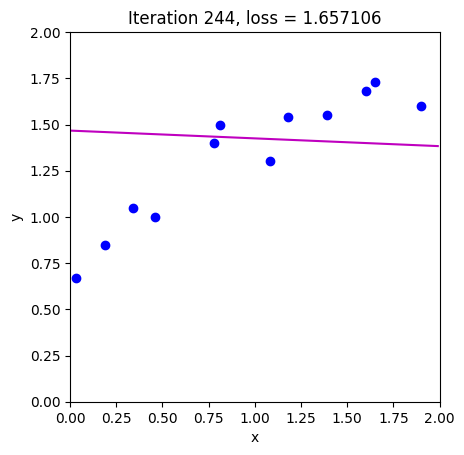

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.657106, b34.081593, c131.820929, d300.835759
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.657106, b5.208063, c16.016225, d34.081593
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.657106, b2.034402, c3.218054, d5.208063
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.657106, b1.693276, c1.819041, d2.034402
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.657106, b1.659207, c1.671264, d1.693276
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.657106, b1.656700, c1.657401, d1.659207
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.657106, b1.656712, c1.656811, d1.657401
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.657106, b1.656789, c1.656691, d1.656811
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.656789, b1.656699, c1.656706, d1.656811
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.656789, b1.656718, c1.656691, d1.656706
alfa 0.000114
before slope phi0:1.467164, phi1: -0.042129
after slope phi0:1.466878, phi1: -0.041865


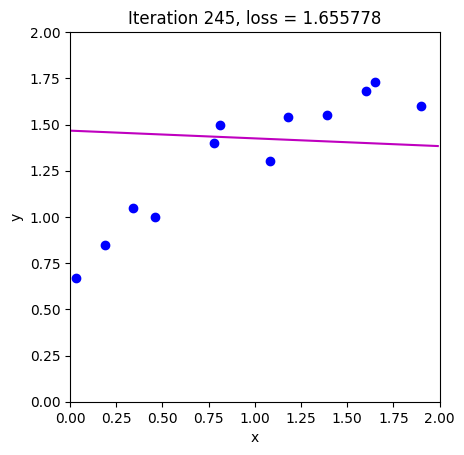

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.655778, b34.080871, c131.820814, d300.836267
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.655778, b5.206937, c16.015301, d34.080871
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.655778, b2.033142, c3.216861, d5.206937
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.655778, b1.691971, c1.817759, d2.033142
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.655778, b1.657887, c1.669952, d1.691971
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.655778, b1.655375, c1.656078, d1.657887
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.655778, b1.655387, c1.655487, d1.656078
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.655778, b1.655462, c1.655365, d1.655487
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.655462, b1.655373, c1.655381, d1.655487
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.655462, b1.655392, c1.655365, d1.655381
alfa 0.000114
before slope phi0:1.466878, phi1: -0.041865
after slope phi0:1.466591, phi1: -0.041602


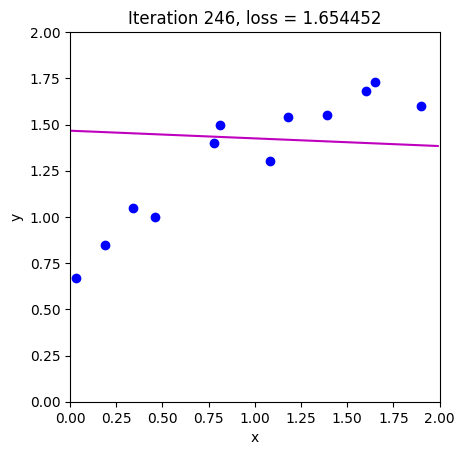

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.654452, b34.080148, c131.820693, d300.836767
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.654452, b5.205812, c16.014377, d34.080148
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.654452, b2.031882, c3.215669, d5.205812
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.654452, b1.690667, c1.816477, d2.031882
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.654452, b1.656568, c1.668640, d1.690667
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.654452, b1.654051, c1.654757, d1.656568
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.654452, b1.654062, c1.654163, d1.654757
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.654452, b1.654137, c1.654041, d1.654163
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.654137, b1.654049, c1.654058, d1.654163
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.654137, b1.654067, c1.654041, d1.654058
alfa 0.000114
before slope phi0:1.466591, phi1: -0.041602
after slope phi0:1.466305, phi1: -0.041339


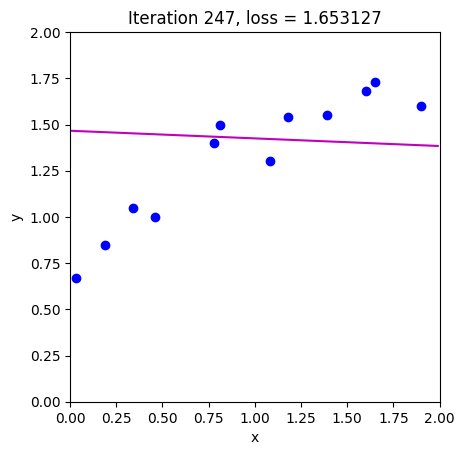

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.653127, b34.079422, c131.820567, d300.837259
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.653127, b5.204686, c16.013451, d34.079422
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.653127, b2.030624, c3.214477, d5.204686
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.653127, b1.689364, c1.815196, d2.030624
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.653127, b1.655251, c1.667330, d1.689364
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.653127, b1.652729, c1.653437, d1.655251
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.653127, b1.652738, c1.652842, d1.653437
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.653127, b1.652813, c1.652718, d1.652842
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.652813, b1.652726, c1.652735, d1.652842
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.652813, b1.652744, c1.652718, d1.652735
alfa 0.000114
before slope phi0:1.466305, phi1: -0.041339
after slope phi0:1.466019, phi1: -0.041075


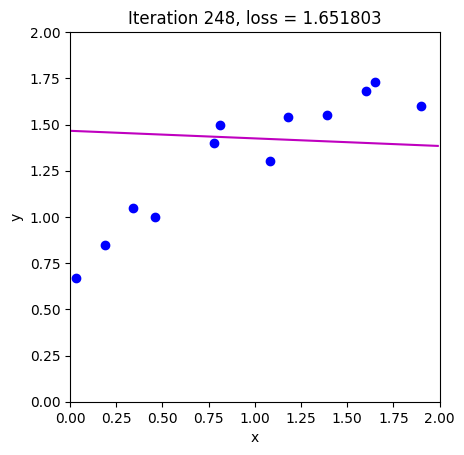

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.651803, b34.078695, c131.820436, d300.837743
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.651803, b5.203561, c16.012525, d34.078695
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.651803, b2.029366, c3.213286, d5.203561
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.651803, b1.688062, c1.813916, d2.029366
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.651803, b1.653934, c1.666021, d1.688062
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.651803, b1.651407, c1.652118, d1.653934
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.651803, b1.651416, c1.651521, d1.652118
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.651803, b1.651490, c1.651396, d1.651521
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.651490, b1.651403, c1.651414, d1.651521
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.651490, b1.651422, c1.651396, d1.651414
alfa 0.000114
before slope phi0:1.466019, phi1: -0.041075
after slope phi0:1.465734, phi1: -0.040812


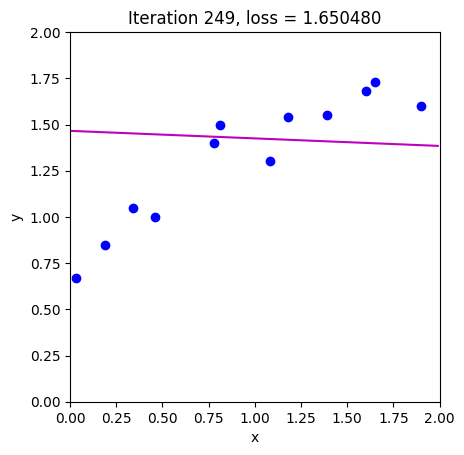

Iter 1, a=0.000, b=0.033, c=0.066, d=0.100
a 1.650480, b34.077966, c131.820301, d300.838219
Iter 2, a=0.000, b=0.011, c=0.022, d=0.033
a 1.650480, b5.202436, c16.011598, d34.077966
Iter 3, a=0.000, b=0.004, c=0.007, d=0.011
a 1.650480, b2.028109, c3.212095, d5.202436
Iter 4, a=0.000, b=0.001, c=0.002, d=0.004
a 1.650480, b1.686761, c1.812638, d2.028109
Iter 5, a=0.000, b=0.000, c=0.001, d=0.001
a 1.650480, b1.652619, c1.664713, d1.686761
Iter 6, a=0.000, b=0.000, c=0.000, d=0.000
a 1.650480, b1.650087, c1.650800, d1.652619
Iter 7, a=0.000, b=0.000, c=0.000, d=0.000
a 1.650480, b1.650095, c1.650202, d1.650800
Iter 8, a=0.000, b=0.000, c=0.000, d=0.000
a 1.650480, b1.650169, c1.650076, d1.650202
Iter 9, a=0.000, b=0.000, c=0.000, d=0.000
a 1.650169, b1.650083, c1.650093, d1.650202
Iter 10, a=0.000, b=0.000, c=0.000, d=0.000
a 1.650169, b1.650100, c1.650075, d1.650093
alfa 0.000114
before slope phi0:1.465734, phi1: -0.040812
after slope phi0:1.465448, phi1: -0.040550


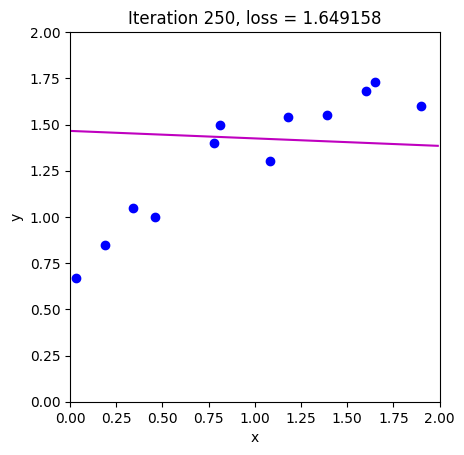

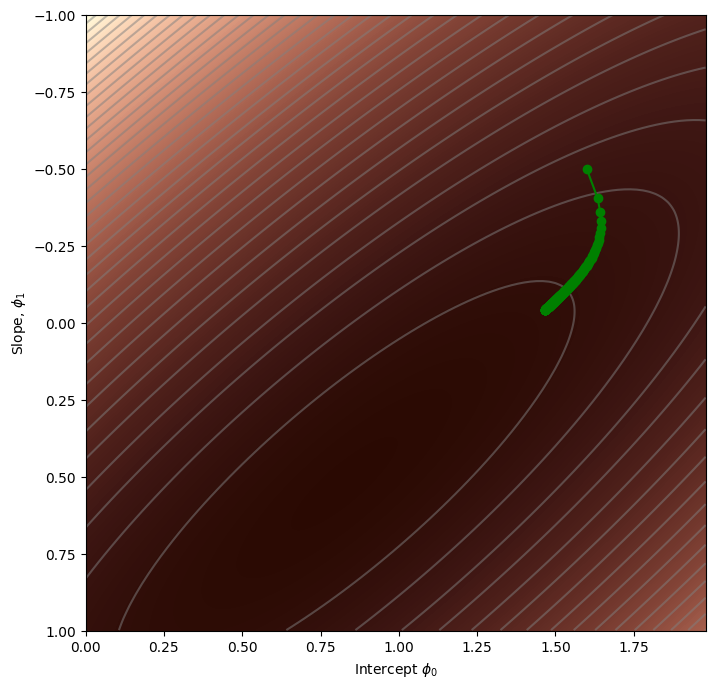

In [71]:
# Initialize the parameters and draw the model
n_steps = 250
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Repeatedly take gradient descent steps
for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model,gradient)
  # print(phi_all[:,c_step+1:c_step+2])
  # Measure loss and draw model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model,phi_all)
